In [2]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 1.2 MB/s eta 0:00:01


In [190]:
import pandas as pd # data manipulation\n",
pd.options.mode.chained_assignment = None  # default='warn'\n",
import numpy as np #  mathematical support for large, multi-dimensional arrays and matrices\n",
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import re
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

import collections
from matplotlib.patches import Arc
import math
import xgboost
import dtreeviz

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [5]:
os.listdir()

['Player_Aggs_live70',
 '.DS_Store',
 'Player_Aggs_live40',
 'Player_Aggs.csv',
 'Player_Aggs_live30',
 'Player_Aggs_live90',
 'Player_Aggs_live20',
 'Player_Aggs_live80',
 'Player_Aggs_live10',
 'Player_Aggs_live50',
 'Player_Aggs_live60',
 'Archive.zip']

In [6]:

## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

# allDone()


### Set Directory

In [4]:
try:
    os.chdir('/kaggle/input/football-event-data')
except:
    pass

In [5]:
try:
    os.chdir('/group/interns202010/jmakins/Data')
except:
    pass

In [220]:
try:
    os.chdir('/Users/jordanmakins/Desktop/Data/Players')
except:
    pass

In [6]:

## When USING KAGGLE

os.chdir('/kaggle/input/football-event-data')

#Teams = pd.read_json('teams.json')
#Competitions = pd.read_json('competitions.json')
Players = pd.read_json('players.json')
#Coaches = pd.read_json('coaches.json') # Managers

England = pd.read_json('matches_England.json')
France = pd.read_json('matches_France.json')
Italy = pd.read_json('matches_Italy.json')
Spain = pd.read_json('matches_Spain.json')
Germany = pd.read_json('matches_Germany.json')

England['Country'] = 'England'
France['Country'] = 'France'
Italy['Country'] = 'Italy'
Spain['Country'] = 'Spain'
Germany['Country'] = "Germany"

In [227]:
try:
    os.chdir('/Users/jordanmakins/Desktop/Data')
except:
    pass


Teams = pd.read_json('teams.json')
#Competitions = pd.read_json('competitions.json')
Players = pd.read_json('players.json')
#Coaches = pd.read_json('coaches.json') # Managers

In [24]:
try:
    os.chdir('/Users/jordanmakins/Desktop/Data/matches')
except:
    pass
os.listdir()

['matches_World_Cup.json',
 'matches_Italy.json',
 'matches_Germany.json',
 'matches_England.json',
 'matches_France.json',
 'matches_Spain.json',
 'matches_European_Championship.json']

In [25]:
try:
    os.chdir('/group/interns202010/jmakins/Data/matches')
except:
    pass

try:
    os.chdir('/Users/jordanmakins/Desktop/Data/matches')
except:
    pass

England = pd.read_json('matches_England.json')
France = pd.read_json('matches_France.json')
Italy = pd.read_json('matches_Italy.json')
Spain = pd.read_json('matches_Spain.json')
Germany = pd.read_json('matches_Germany.json')
#World_Cup = pd.read_json('matches_World_Cup.json')
#Euro_Champs = pd.read_json('matches_European_Championship.json')

In [26]:
# Adding country labels to match observations
England['Country'] = 'England'
France['Country'] = 'France'
Italy['Country'] = 'Italy'
Spain['Country'] = 'Spain'
Germany['Country'] = "Germany"
#World_Cup['Country'] = 'World Cup'
#Euro_Champs['Country'] = 'European Champs'

In [219]:
try:
    os.chdir('/group/interns202010/jmakins/Data/events')
except:
    pass
try:
    os.chdir('/Users/jordanmakins/Desktop/Data/events')
except:
    pass


In [135]:
Events_France = pd.read_json('events_France.json')
Events_Spain = pd.read_json('events_Spain.json')
Events_Germany = pd.read_json('events_Germany.json')
#Events_EuroChamps = pd.read_json('events_European_Championship.json')
#Events_World_Cup = pd.read_json('events_World_Cup.json')
Events_Italy = pd.read_json('events_Italy.json')
Events_England = pd.read_json('events_England.json')

### Data Cleaning

In [27]:
Matches = pd.concat([England, France, Italy, Spain, Germany], ignore_index=True)

In [28]:
Matches.drop(['duration'], inplace=True, axis =1) # removing groupName variable from World Cups

In [228]:
Players.drop(["passportArea"], inplace = True, axis = 1)

In [229]:
Players = Players.rename(columns ={'wyId': 'playerId'}) # rename for convenience

In [230]:
Teams = Teams.rename(columns = {'wyId': 'teamId'})
Players = Players.rename(columns = {'currentTeamId': 'teamId'})
Players = pd.merge(Players,Teams[['teamId', 'officialName']], on = 'teamId').rename(columns = {'officialName': 'clubName'})

In [231]:
Players['Position'] = Players.role.apply(pd.Series)['code3'].values

In [232]:
Players['birthCountry'] = Players.birthArea.apply(pd.Series)['name'].values

In [233]:
Players.drop(["birthArea", 'role'], inplace = True, axis = 1)

### Manipulate Match Data

In [29]:
teams = [list(x.keys()) for x in Matches.teamsData] # create two columns for identifying teams in match

In [30]:
teams = [list(x.keys()) for x in Matches.teamsData] # create two columns for identifying teams in match
homeTeam, awayTeam = [],[]
for x in teams:
    homeTeam.append(x[0])
    awayTeam.append(x[1])

In [31]:
# add columns for additional match statistics
Matches["homeManagerId"] = None
for name in ["Score", "ScoreHT", "ScoreET", "ScoreP"]:
    colname = "home" + name
    colname2 = "away" + name
    Matches[colname] = None
    Matches[colname2] = None

In [32]:
# parse Home and Away teams as features from nest dictionary
teams = [list(x.keys()) for x in Matches.teamsData] # create two columns for identifying teams in match
homeTeam, awayTeam = [],[]
for game, team in enumerate(teams):
    if Matches.teamsData[game:game+1][game][team[0]]['side'] == 'home':
        homeTeam.append(team[0])
        awayTeam.append(team[1])
    else:
        awayTeam.append(team[0])
        homeTeam.append(team[1])

In [33]:
def get_team_stats(df, team): # function to parse team match stats from dictionary embedded in column teamsData from the Matches dataframe
    
    Bench, Starters, Manager, Score, ScoreHT, ScoreET, ScoreP, teamId = [],[],[],[],[],[],[],[]
    
    for game in range(0, len(df)):

        Bench.append(list(pd.DataFrame.from_dict(df.teamsData[game][team[game]]['formation']['bench'])['playerId']))
        Starters.append(list(pd.DataFrame.from_dict(df.teamsData[game][team[game]]['formation']['lineup'])['playerId']))
        Manager.append(df.teamsData[game][team[game]]['coachId'])
        Score.append(df.teamsData[game][team[game]]['score'])
        ScoreHT.append(df.teamsData[game][team[game]]['scoreHT'])
        ScoreET.append(df.teamsData[game][team[game]]['scoreET'])
        ScoreP.append(df.teamsData[game][team[game]]['scoreP'])
        teamId.append(df.teamsData[game][team[game]]['teamId'])
    
    return Bench, Starters, Manager, Score, ScoreHT, ScoreET, ScoreP, teamId

homeBench, homeStarters, homeManager, homeScore, homeScoreHT, homeScoreET, homeScoreP, homeTeamId = get_team_stats(Matches, homeTeam)
awayBench, awayStarters, awayManager, awayScore, awayScoreHT, awayScoreET, awayScoreP, awayTeamId = get_team_stats(Matches, awayTeam)


In [34]:
# Automating Bench Line Up Column Generation

homeColNames = []
for num in range(1,14): # add columns for home bench playerId
     homeColNames.append("homeBenchPlayer" + str(num))
        
awayColNames = []
for num in range(1,14): # add columns for away bench playerId
    awayColNames.append("awayBenchPlayer" + str(num))
    


In [35]:
# Inspecting bench counts as during errror handling reveals some matches had bench sizes of between 8 and 13 for certain fixtures
import collections
collections.Counter(list(map(lambda x: len(x), homeBench)))

Counter({5: 1, 6: 18, 7: 1425, 8: 5, 9: 21, 10: 49, 11: 101, 12: 205, 13: 1})

In [36]:
# Adding Bench Line Ups to DataFrame

homeBench2 = pd.DataFrame(homeBench,
     columns=homeColNames)
awayBench2 = pd.DataFrame(awayBench,
     columns=awayColNames)


In [37]:
# Automating Starting Line Up Column Generation

homeColNames =[]
for num in range(1,12): # add columns for starting playerId
     homeColNames.append("homePlayer" + str(num))
        
awayColNames = []
for num in range(1,12): # add columns for starting playerId
    awayColNames.append("awayPlayer" + str(num))


In [38]:
# Joining starting line ups, benches to matches dataframe

homeStarters2 = pd.DataFrame(homeStarters,
     columns=homeColNames)
awayStarters2 = pd.DataFrame(awayStarters,
     columns=awayColNames)

Matches = Matches.join([homeStarters2, awayStarters2, homeBench2, awayBench2])


In [39]:
# add individual columns of match data
Matches['homeManager'] = homeManager
Matches['homeScore'] = homeScore
Matches['homeScoreHT'] = homeScoreHT
Matches['homeScoreET'] = homeScoreET
Matches['homeScoreP'] = homeScoreP
Matches['homeTeamId'] = homeTeamId
Matches['awayManager'] = awayManager
Matches['awayScore'] = awayScore
Matches['awayScoreHT'] = awayScoreHT
Matches['awayScoreET'] = awayScoreET
Matches['awayScoreP'] = awayScoreP
Matches['awayTeamId'] = awayTeamId

In [40]:
Matches.drop(["teamsData"], inplace = True, axis = 1)

In [41]:
# Classify Match Result as W, L or D for teams
conditions = [
    (Matches['winner'] == 0),
    (Matches['winner'] == Matches['awayTeamId']),
    (Matches['winner'] == Matches['homeTeamId'])
    ]

# create a list of the values we want to assign for each condition
values = [0, -1, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
Matches['Result'] = np.select(conditions, values)

In [42]:
Matches["date"] = pd.to_datetime(Matches['dateutc']).dt.date # create a date column for Matches dataframe

In [43]:
Matches["time"] = pd.to_datetime(Matches['dateutc']).dt.time # create a time column for Matches dataframe

In [44]:
# Prelim Dimensionality Reduction
cols2Drop = ['status', 'roundId', 'gameweek', 'dateutc', 'label', 'referees', 'homeManagerId', 'seasonId']
Matches.drop(cols2Drop, inplace=True, axis =1)
Matches.drop(['winner', 'date', 'time'], inplace = True, axis =1)

In [45]:
Matches.rename(columns={'wyId':'matchId'}, inplace=True)

In [46]:
Matches = Matches.fillna(0) # fill bench7players with Ids = 0 in order to prevent program crashing

### Events Manipulation for Match/Player Stats and then combine with existing Match(test) dataframe from aboves

In [136]:
# Decroos Github
tags = [
    (101, "goal"),
    (102, "own_goal"),
    (301, "assist"),
    (302, "key_pass"),
    (1901, "counter_attack"),
    (401, "left_foot"),
    (402, "right_foot"),
    (403, "head/body"),
    (1101, "direct"),
    (1102, "indirect"),
    (2001, "dangerous_ball_lost"),
    (2101, "blocked"),
    (801, "high"),
    (802, "low"),
    (1401, "interception"),
    (1501, "clearance"),
    (201, "opportunity"),
    (1301, "feint"),
    (1302, "missed_ball"),
    (501, "free_space_right"),
    (502, "free_space_left"),
    (503, "take_on_left"),
    (504, "take_on_right"),
    (1601, "sliding_tackle"),
    (601, "anticipated"),
    (602, "anticipation"),
    (1701, "red_card"),
    (1702, "yellow_card"),
    (1703, "second_yellow_card"),
    (1201, "position_goal_low_center"),
    (1202, "position_goal_low_right"),
    (1203, "position_goal_mid_center"),
    (1204, "position_goal_mid_left"),
    (1205, "position_goal_low_left"),
    (1206, "position_goal_mid_right"),
    (1207, "position_goal_high_center"),
    (1208, "position_goal_high_left"),
    (1209, "position_goal_high_right"),
    (1210, "position_out_low_right"),
    (1211, "position_out_mid_left"),
    (1212, "position_out_low_left"),
    (1213, "position_out_mid_right"),
    (1214, "position_out_high_center"),
    (1215, "position_out_high_left"),
    (1216, "position_out_high_right"),
    (1217, "position_post_low_right"),
    (1218, "position_post_mid_left"),
    (1219, "position_post_low_left"),
    (1220, "position_post_mid_right"),
    (1221, "position_post_high_center"),
    (1222, "position_post_high_left"),
    (1223, "position_post_high_right"),
    (901, "through"),
    (1001, "fairplay"),
    (701, "lost"),
    (702, "neutral"),
    (703, "won"),
    (1801, "accurate"),
    (1802, "not_accurate"),
]

In [137]:
tags = dict(tags)

In [138]:
# ## I have kept this cell encase we need to impute integers for ML algorithms as oppose to strings
# event_tag_ids = []
# for ids in  list(trial[0:10]['tags']):
#     event_tag_ids.append(list(map(lambda y: y['id'], ids)))
# trial['event_tag_ids'] = event_tag_ids

In [139]:
# Store event type tags ids in new column
def event_tags(event_df):
    event_tags = []
    for ids in list(event_df['tags']):
        event_tags.append(list(map(lambda y: tags[y['id']], ids)))

    event_df['event_tags'] = event_tags
    return event_df

In [140]:
def RunningTime(event_df):
    # Solution to convert second half time into 
    secs_to_add = list(event_df[event_df['matchPeriod']=="1H"].groupby('matchId').tail(1)['eventSec'])
    match_ids = list(event_df["matchId"].unique())

    for idx in range(0, len(match_ids)):
        event_df['eventSec'] = list(np.where(
           (event_df['matchId'] == match_ids[idx]) & (event_df['matchPeriod'] == "2H") , event_df['eventSec'] + secs_to_add[idx], event_df['eventSec']
           ))
    return event_df


In [141]:
# Clean the result of the action
def Result(event_df):
    result = []
    for tag in event_df["event_tags"]:
        if "accurate" in tag:
            result.append("Accurate")
        elif "not_accurate" in tag:
            result.append("Inaccurate")
        else:
            result.append("")
    event_df["Result"] = result 
    return event_df

In [142]:
# Separating description from success/failure of an action (event)
def event_description(event_df):
    subEventDescr = []
    for tag in event_df["event_tags"]:
        descr = " ".join(tag[:-1])
        if descr != "":
            subEventDescr.append(descr)
        else:
            subEventDescr.append("generic play")
    event_df["subEventDescription"] = subEventDescr
    event_df = event_df[(event_df["event_tags"].str.len() != 0) & (event_df.subEventName != 'Ball out of the field')  & (event_df.subEventName != 'Goal kick')  ]
    event_df = event_df[event_df["subEventName"] != "Throw in"] # remove throw-ins as a relevant feature among successful teams for simpler analysis, unless its Rory Delap!
    return event_df

In [143]:
# # Separating description from success/failure of an action (event)
# def event_description(event_df):
#     subEventDescr = []
#     for tag in event_df["event_tags"]:
#         descr = " ".join(tag[:-1])
#         if descr != "":
#             subEventDescr.append(descr)
#         else:
#             subEventDescr.append("generic play")
#     event_df["subEventDescription"] = subEventDescr
#     event_df = event_df[(event_df["event_tags"].str.len() != 0) & (event_df.subEventName != 'Ball out of the field')  & (event_df.subEventName != 'Goal kick') & (event_df.subEventName != 'Touch')   ]
#     event_df = event_df[event_df["subEventName"] != "Throw in"] # remove throw-ins as a relevant feature among successful teams for simpler analysis, unless its Rory Delap!
#     return event_df

In [144]:

def Locations(event_df):

    xStart,xEnd,yStart,yEnd = [], [], [], []
    for pos in event_df["positions"]:
        if len(pos) == 2:
            xStart.append(pos[0]['x'])
            xEnd.append(pos[1]['x'])
            yStart.append(pos[0]['y'])
            yEnd.append(pos[1]['y'])
        else:
            xStart.append(pos[0]['x'])
            xEnd.append(pos[0]['x'])
            yStart.append(pos[0]['y'])
            yEnd.append(pos[0]['y'])


    event_df['xStart'], event_df['xEnd'], event_df['yStart'], event_df['yEnd'] = xStart, xEnd, yStart, yEnd
    return event_df

In [145]:
# function to transform an event data frame
def event_df_transform(event_df):
    event_df = event_tags(event_df)
    event_df = Result(event_df)
    event_df = event_description(event_df)
    event_df = Locations(event_df)
    event_df.drop(['positions', "event_tags", "tags", "eventName"], inplace = True, axis = 1) #'id'
    event_df = event_df[event_df.subEventName != ""]
    event_df = event_df[event_df['playerId']!= 0]
    event_df = RunningTime(event_df)
    event_df['attackMetres'] = event_df['xEnd'] - event_df['xStart']
    return event_df

# stopped remove eventId
    

In [146]:
# Transform event_dfs

Events_France = event_df_transform(Events_France)
Events_Spain = event_df_transform(Events_Spain)
Events_Germany = event_df_transform(Events_Germany)
Events_Italy = event_df_transform(Events_Italy)
Events_England = event_df_transform(Events_England)


KeyboardInterrupt: 

In [ ]:
def zones(event_df, start_or_end):

    conditions = [
            (((event_df['x'+ start_or_end] < 16.5)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] >= 0)& (event_df['y'+ start_or_end] <= 25))),
            (((event_df['x'+ start_or_end] < 16.5)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] > 25)& (event_df['y'+ start_or_end] <= 36))),
            (((event_df['x'+ start_or_end] < 16.5)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] > 36)& (event_df['y'+ start_or_end] <= 64))),
            (((event_df['x'+ start_or_end] < 16.5)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] > 64)& (event_df['y'+ start_or_end] <= 75))),
            (((event_df['x'+ start_or_end] < 16.5)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] > 75)& (event_df['y'+ start_or_end] <= 100))),
        
            (((event_df['x'+ start_or_end] <= 33)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] >= 0)& (event_df['y'+ start_or_end] <=  25))),
            (((event_df['x'+ start_or_end] <= 33)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] > 25)& (event_df['y'+ start_or_end] <=  50))),
            (((event_df['x'+ start_or_end] <= 33)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] > 50)& (event_df['y'+ start_or_end] <=  75))),
            (((event_df['x'+ start_or_end] <= 33)& (event_df['x'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] > 75)& (event_df['y'+ start_or_end] <=  100))),
            (((event_df['x'+ start_or_end] <= 50)& (event_df['x'+ start_or_end] > 33) & (event_df['y'+ start_or_end] >= 0))& (event_df['y'+ start_or_end] <=  25)),
            (((event_df['x'+ start_or_end] <= 50)& (event_df['x'+ start_or_end] > 33) & (event_df['y'+ start_or_end] > 25)& (event_df['y'+ start_or_end] <=  50))),
            (((event_df['x'+ start_or_end] <= 50)& (event_df['x'+ start_or_end] > 33) & (event_df['y'+ start_or_end] > 50)& (event_df['y'+ start_or_end] <=  75))),
            (((event_df['x'+ start_or_end] <= 50)& (event_df['x'+ start_or_end] > 33) & (event_df['y'+ start_or_end] > 75)& (event_df['y'+ start_or_end] <=  100))),
            (((event_df['x'+ start_or_end] <= 67)& (event_df['x'+ start_or_end] > 50) & (event_df['y'+ start_or_end] >= 0)& (event_df['y'+ start_or_end] <= 25))),
            (((event_df['x'+ start_or_end] <= 67)& (event_df['x'+ start_or_end] > 50) & (event_df['y'+ start_or_end] > 25)& (event_df['y'+ start_or_end] <=  50))),
            (((event_df['x'+ start_or_end] <= 67)& (event_df['x'+ start_or_end] > 50) & (event_df['y'+ start_or_end] > 50)& (event_df['y'+ start_or_end] <= 75))),
            (((event_df['x'+ start_or_end] <= 67)& (event_df['x'+ start_or_end] > 50) & (event_df['y'+ start_or_end] > 75)& (event_df['y'+ start_or_end] <= 100))),
            (((event_df['x'+ start_or_end] < 83.5)& (event_df['x'+ start_or_end] > 67) & (event_df['y'+ start_or_end] >= 0)& (event_df['y'+ start_or_end] <= 25))),
            (((event_df['x'+ start_or_end] < 83.5)& (event_df['x'+ start_or_end] > 67) & (event_df['y'+ start_or_end] > 25)& (event_df['y'+ start_or_end] <= 50))),
            (((event_df['x'+ start_or_end] < 83.5)& (event_df['x'+ start_or_end] > 67) & (event_df['y'+ start_or_end] > 50)& (event_df['y'+ start_or_end] <= 75))),
            (((event_df['x'+ start_or_end] < 83.5)& (event_df['x'+ start_or_end] > 67) & (event_df['y'+ start_or_end] > 75)& (event_df['y'+ start_or_end] <= 100))),
        
            (((event_df['x'+ start_or_end] <= 100) & (event_df['x'+ start_or_end] > 83.5) & (event_df['y'+ start_or_end] >= 0) & (event_df['y'+ start_or_end] <= 25))),
            (((event_df['x'+ start_or_end] <= 100) & (event_df['x'+ start_or_end] > 83.5) & (event_df['y'+ start_or_end] > 25) & (event_df['y'+ start_or_end] <=  36))),
            (((event_df['x'+ start_or_end] <= 100) & (event_df['x'+ start_or_end] > 83.5) & (event_df['y'+ start_or_end] > 36) & (event_df['y'+ start_or_end] <= 64))),
            (((event_df['x'+ start_or_end] <= 100) & (event_df['x'+ start_or_end] > 83.5) & (event_df['y'+ start_or_end] > 64) & (event_df['y'+ start_or_end] <= 75))),
            (((event_df['x'+ start_or_end] <= 100) & (event_df['x'+ start_or_end] > 83.5) & (event_df['y'+ start_or_end] > 75) & (event_df['y'+ start_or_end] <= 100)))
            ]

    # create a list of the values we want to assign for each condition
    values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

    # create a new column and us np.select to assign values to it using our lists as arguments
    event_df['Zone'+ start_or_end] = np.select(conditions, values)
    
    return event_df



        

In [ ]:
for event_df in [Events_England, Events_Italy, Events_Spain, Events_France, Events_Germany]:
    event_df = zones(event_df, "Start")
    event_df = zones(event_df, "End")

In [ ]:
### CHange German row with 101
Events_Germany.loc[Events_Germany.yEnd==101, ['yEnd']] = 99

In [ ]:
### remove events where playerId equals zero
## There are two instances where goals are scored so we will handle these first and assign to correct players as these are important events
# we can attempt to handle these into the real player sequences if we have time at the end of the project


In [ ]:
# function to determine average player coordinates on pitch across all possessions in a match
def playerPosition(event_df):
    df = event_df.groupby(['matchId','playerId']).agg({'xStart': ['mean'], 'yStart': ['mean']}).reset_index()
    df.columns = ["matchId", "playerId", "xStart", "yStart"]
    return df

In [ ]:

# find positions for all players for big 5 Euro leagues
a = playerPosition(Events_England)
b = playerPosition(Events_France)
c = playerPosition(Events_Italy)
d = playerPosition(Events_Spain)
e = playerPosition(Events_Germany)

position_df = pd.concat([a,b,c,d,e])


In [ ]:

# This dataframe is used relationally to fill correct team as events represent 2018 team, while player
a = Events_England[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
b = Events_France[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
c = Events_Italy[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
d = Events_Spain[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
e = Events_Germany[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
p_refs = pd.concat([a,b,c,d,e])


In [ ]:

# Create PA dataframe
Player_Aggs = Players[['shortName','Position', 'playerId','weight','height',  'foot' ]]

# add ave field locations to players
Player_Aggs = pd.merge(Player_Aggs, position_df, how = 'right', on= 'playerId').sort_values('matchId')
Player_Aggs = pd.merge(Player_Aggs, p_refs, on = ['matchId', 'playerId'])
Player_Aggs = pd.merge(Player_Aggs, Teams[['teamId', 'name']], on = 'teamId')
Player_Aggs = pd.merge(Player_Aggs, Matches[['matchId', 'homeTeamId', 'awayTeamId']], on = 'matchId')
Player_Aggs.loc[Player_Aggs.teamId == Player_Aggs.homeTeamId, 'homeAway'] = "home"
Player_Aggs.loc[Player_Aggs.teamId == Player_Aggs.awayTeamId, 'homeAway'] = "away"


In [ ]:
# # # # # #

# var = "Shot"
# varName = "ShotsOnTarget"

# # this exists
# df = Events_England.loc[(Events_England.Result == "Accurate" ) & (Events_England.subEventName== var )].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='ShotsOnTarget')#.groupby(["matchId",'playerId']).agg(list).reset_index()
# # [['playerId', 'matchId', "ZoneStart"]]
# # # # # # # 

def transform_zonal(df, varName):

    df = df.pivot_table(varName, ['playerId', 'matchId'], 'ZoneStart').fillna(0).reset_index()

    column_indices = []
    new_names = []
    check_cols = list(range(1,27))
    old_columns = list(df.columns[2:])

    for num, col in enumerate(old_columns):
        column_indices.append(num+2)
        new_names.append(varName+ "_ZoneS_" + str(col))

    # columns to be added 
    change_cols = np.setdiff1d(check_cols, old_columns) 

    old_names = df.columns[column_indices]
    df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

    for col in change_cols:
        df[varName + "_ZoneS_" + str(col)] = 0

    return df




In [ ]:
### unique entry dataframe for player gameTime at any point in a match by summarizing streams

def playerGameTime(event_df):
    df = event_df.groupby(['matchId','playerId'])['eventSec'].agg(['max', 'min']).reset_index()
    df['gameTime (min)'] = round((df['max'] - df['min'])/60) # game time to the nearest minute
    df.drop(['max', 'min'], inplace=True, axis=1)
    return df

# derive gameTime per player and store in summary table
a = playerGameTime(Events_England)
b = playerGameTime(Events_France)
c = playerGameTime(Events_Italy)
d = playerGameTime(Events_Spain)
e = playerGameTime(Events_Germany)

playingTime = pd.concat([a,b,c,d,e]).fillna(0)


In [ ]:
def find_goals(event_df):

    # Create a column to recognize when a goal is scored
    conditions = [
        (((event_df['subEventDescription'].str.match('goal ')) & (event_df['Result'] == "Accurate"))),
        (((event_df['subEventDescription'].str.match('goal ')) & (event_df['Result'] == "Inaccurate") & (event_df['subEventName'] == "Shot"))),
        (((event_df['subEventDescription'].str.match('goal ')) & (event_df['Result'] == "Inaccurate") & (event_df['subEventName'] != "Shot")))
        ]

    # create a list of the values we want to assign for each condition
    values = [1, 1, -1]

    # create a new column and use np.select to assign values to it using our lists as arguments
    event_df['Goal_Value'] = np.select(conditions, values, default = 0)
    #[['playerId', 'matchId', "ZoneStart"]].groupby(['playerId', 'matchId', "ZoneStart"])
    return event_df.groupby(['playerId', 'matchId', "ZoneStart"]).sum().reset_index()#[['playerId', 'matchId', 'Goal_Value']]

In [ ]:
for event in [Events_England, Events_Italy, Events_France, Events_Germany, Events_Spain]:
    event = find_goals(event)


In [ ]:
Player_Aggs = pd.merge(Player_Aggs, playingTime, how = 'left', on = ['playerId', 'matchId'])

In [64]:
# convenience function for event_df parsing
def parseEvent_df(func, new_feature):
    
    aa = func(Events_England)
    aa = transform_zonal(aa, new_feature)
#     aa = aa.rename_axis(None, axis=1)
    bb = func(Events_France)
    bb = transform_zonal(bb, new_feature)
#     bb = bb.rename_axis(None, axis=1)
    cc = func(Events_Italy)
    cc = transform_zonal(cc, new_feature)
#     cc = cc.rename_axis(None, axis=1)
    dd = func(Events_Spain)
    dd = transform_zonal(dd, new_feature)
#     dd = dd.rename_axis(None, axis=1)
    ee = func(Events_Germany)
    ee = transform_zonal(ee, new_feature)
#     ee = ee.rename_axis(None, axis=1)
    
    return pd.concat([aa,bb,cc,dd,ee])

In [65]:
# function for adding new feature column to Player_Aggs df
def alter_Player_Aggs(new_feature_function, new_feature, PA_df):
    
    if "Acc" in new_feature:
        df = parseEvent_df(new_feature_function, new_feature)
        #df = transform_zonal(df, new_feature)
        PA_df = pd.merge(PA_df, df, how= 'left', on =['playerId', 'matchId'])
#         new_cols = [col for col in df if col.startswith(new_feature)]
#         PA_df[new_cols] = PA_df[new_cols].fillna(0)
        
    elif 'acc' in new_feature:
        df = parseEvent_df(new_feature_function, new_feature)
        #df = transform_zonal(df, new_feature)
        PA_df = pd.merge(PA_df, df, how= 'left', on =['playerId', 'matchId'])
#         new_cols = [col for col in df if col.startswith(new_feature)]
#         PA_df[new_cols] = PA_df[new_cols].fillna(0)
        
    else:
        df = parseEvent_df(new_feature_function, new_feature)
        #df = transform_zonal(df, new_feature)
        PA_df = pd.merge(PA_df, df, how= 'left', on =['playerId', 'matchId'])
#         new_cols = [col for col in df if col.startswith(new_feature)]
#         PA_df[new_cols] = PA_df[new_cols].fillna(0)
        
#         PA_df[new_cols] = (PA_df[new_cols] / PA_df['gameTime (min)']) * 90 # get standardized stat index for 90mins
    PA_df.iloc[:,15:] = PA_df.iloc[:,15:].fillna(0)
    return PA_df


In [66]:
# import datetime
# while datetime.datetime.now().hour < 17:
#     x = 1+1

In [67]:
# calc angle to goal from any location in radians

def angleToGoal(event_df):
    
    event_df['C'] = 10 # length of goal
    event_df['A'] = ((100-event_df.xStart)**2+abs(45-event_df.yStart)**2)**.5
    event_df['B'] = ((100-event_df.xStart)**2+abs(55-event_df.yStart)**2)**.5
    event_df['angle_to_goal'] = (event_df['A'] * event_df['A'] + event_df['B'] * event_df['B'] - event_df['C'] * event_df['C'])/(2 * event_df['A'] * event_df['B'])
    event_df['angle_to_goal'] = event_df['angle_to_goal'].apply(lambda row: round(math.radians(math.degrees(math.acos(row))),4))
    # event_df['angle_to_goal'] = event_df['angle_to_goal'].apply(lambda row: round(math.degrees(row),2))
    event_df.drop(['A', "B", "C"], inplace = True, axis=1)
    return event_df
        
Events_England, Events_France = angleToGoal(Events_England), angleToGoal(Events_France)
Events_Germany, Events_Spain = angleToGoal(Events_Germany), angleToGoal(Events_Spain)
Events_Italy = angleToGoal(Events_Italy)


### Function to prepare dataframe for fdnn

In [68]:
# result is event_df

def player_goals(result):
    
    conditions = [
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Accurate"))),
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Inaccurate") & (result['subEventName'] == "Shot"))),
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Inaccurate") & (result['subEventName'] != "Shot")))
            ]

    # create a list of the values we want to assign for each condition
    values = [1, 1, -1]

    # create a new column and us np.select to assign values to it using our lists as arguments
    result['Goal_Value'] = np.select(conditions, values, default = 0)
    
    return result

    

In [69]:
def corner_assists(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.subEventDescription.str.match('assist'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='CornerAssists')

def corner_opportunity(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.subEventDescription.str.match('key_pass'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='CornerOpportunitiesCreated')

def corner_success(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='SuccessfulCorners')

def corner_fail(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.Result=="Inaccurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='FailedCorners')

def corner_assists(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.subEventDescription.str.match('assist'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='CornerAssists')


In [70]:
### Attack Metres stat (how many forward metres achieved through events)
def AccBackwardMetres(event_df):

    df = event_df.loc[(event_df.Result == "Accurate" ) & (event_df.attackMetres < 0 )].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccBackMetres"})
    df["AccBackMetres"] = df["AccBackMetres"].abs()
    return df

def InaccBackwardMetres(event_df):

    df = event_df.loc[(event_df.Result == "Inaccurate") & (event_df.attackMetres < 0 )].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "InaccBackMetres"})
    df["InaccBackMetres"] = df["InaccBackMetres"].abs()
    return df


### Attack Metres stat (how many forward metres achieved through events)
def AccForwardMetres(event_df):

    df = event_df.loc[(event_df.Result == "Accurate") & (event_df.attackMetres > 0 )].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccForwardMetres"})
    return df

def InaccForwardMetres(event_df):

    df = event_df.loc[(event_df.Result == "Inaccurate") & (event_df.attackMetres > 0 ) ].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "InaccForwardMetres"})
    return df


In [71]:

# adding in total meterage of accurate and inaccurate movements by players in the vertical plane towards the goal
# AccBackward = parseEvent_df(AccBackwardMetres)
# InaccBackward = parseEvent_df(InaccBackwardMetres)
# AccForward = parseEvent_df(AccForwardMetres)
# InaccForward= parseEvent_df(InaccForwardMetres)

# Player_Aggs = pd.merge(Player_Aggs, AccBackward, how= 'left', on =['playerId', 'matchId'])
# Player_Aggs = pd.merge(Player_Aggs, InaccBackward, how = 'left', on =['playerId', 'matchId'])
# Player_Aggs = pd.merge(Player_Aggs, AccForward, how= 'left', on =['playerId', 'matchId'])
# Player_Aggs = pd.merge(Player_Aggs, InaccForward, how = 'left', on =['playerId', 'matchId'])
# Player_Aggs.AccForwardMetres = Player_Aggs.AccForwardMetres.fillna(0)
# Player_Aggs.InaccForwardMetres = Player_Aggs.InaccForwardMetres.fillna(0)-
# Player_Aggs.AccBackMetres = Player_Aggs.AccBackMetres.fillna(0)
# Player_Aggs.InaccBackMetres = Player_Aggs.InaccBackMetres.fillna(0)


##### Explore Feature

In [72]:
Events_England.subEventName.unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Cross', 'Shot',
       'Reflexes', 'Touch', 'Clearance', 'Free Kick', 'Corner',
       'Hand pass', 'Acceleration', 'Save attempt', 'Free kick cross',
       'Foul', 'Free kick shot', 'Hand foul', 'Violent Foul', 'Protest',
       'Goalkeeper leaving line', 'Late card foul', 'Out of game foul',
       'Penalty', 'Time lost foul', 'Simulation'], dtype=object)

#### Miscellanous 

In [73]:
def SimulationFouls(event_df):
    df = event_df[(event_df.subEventName=="Simulation")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='SimulationFouls')
    return df

def Fouls(event_df):
    df= event_df[(event_df.subEventName.str.contains('foul'))| (event_df.subEventName.str.contains('Foul'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='FoulsCommited')

    return df

def Clearances(event_df):
    df =  event_df[(event_df.subEventName=="Clearance")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='Clearances')

    return df
    
def AccLaunchMetres(event_df):
    df =  event_df.loc[(event_df.Result == "Accurate") &(event_df.subEventName=="Launch")].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccLaunchMetres"})

    return df
    
def InaccLaunchMetres(event_df):
    df = event_df.loc[(event_df.Result == "Inaccurate") &(event_df.subEventName=="Launch")].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "InaccLaunchMetres"})

    return df

def FreeKickCrossKey(event_df):
    df = event_df[(event_df.subEventName == "Free kick cross")&(event_df.subEventDescription.str.contains("key"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='FKKeyCross')

    return df
        
def FreeKickCrossAssists(event_df):
    df = event_df[(event_df.subEventName == "Free kick cross")&(event_df.subEventDescription.str.contains("assist"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='FKCrossAssists')
    return df
    
def FreeKickCrossAccuracy(event_df):
    df1= event_df[(event_df.subEventName == "Free kick cross")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='FreeKickCrosses')
    df2 = event_df[(event_df.subEventName == "Free kick cross")& (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccFreeKickCrosses')

    return df2


In [74]:
#penaltiesConversion Statistic

def PenaltiesConverted(event_df):
    df1= event_df[(event_df.subEventName == "Penalty")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PenaltiesAttempted')

    df2 = event_df[(event_df.subEventName == "Penalty")& (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PenaltiesScored')

    df1 = pd.merge(df1,df2, how='left', on = ['matchId', 'playerId'])
    df1['PenaltiesScored'] = df1['PenaltiesScored'].fillna(0)
    df1['penaltiesConversion'] = df1['PenaltiesScored'] / df1['PenaltiesAttempted']
    df1.drop(['PenaltiesScored', 'PenaltiesAttempted' ], inplace=True, axis =1)


    return df1


In [75]:
# 'Ground loose ball duel', 'Ground defending duel'
def dangerousOpponentHalfRecoveries(event_df):
    df = event_df[((event_df.subEventDescription.str.contains("won")) | (event_df.subEventDescription.str.contains("interception") & (event_df.Result=="Accurate"))) & (event_df.subEventName!="Ground attacking duel") & (event_df.xEnd > 60)].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='dangerousOpponentHalfRecoveries')
    return df
    
def dangerousOwnHalfBallLost(event_df):
    df = event_df[(event_df.Result=="Inaccurate") & (event_df.xEnd<40) & ((event_df.subEventName.str.contains("pass")) | (event_df.subEventName.str.contains("Acceleration")) | (event_df.subEventName.str.contains("Clearance")) | ((event_df.subEventName.str.contains("duel")) &(event_df.subEventName!='Ground defending duel')) | (event_df.subEventName.str.contains("Launch")))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='dangerousOwnHalfBallLost')
    return df
    
    
def dangerousDefDuelsLost(event_df):
    df = event_df[(event_df.Result=="Inaccurate") & (event_df.xEnd<40) & (event_df.subEventName=="Ground defending duel")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='dangerousDefDuelsLost')
    return df


In [76]:
### Step one proportion of low left shots saved

possies = ['low_left', 'mid_left', 'high_left', 'low_center', 'mid_center', 'high_center', 'low_right', 'mid_right', 'high_right']

def GoalKeepingZoneEfficiency(event_df, pos):
    df1= event_df[((event_df.subEventName=="Save attempt") | (event_df.subEventName=="Reflexes")) &(event_df.subEventDescription.str.contains(pos))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='total_'+pos)

    df2 = event_df[((event_df.subEventName=="Save attempt") | (event_df.subEventName=="Reflexes")) &(event_df.subEventDescription.str.contains(pos)) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name=pos+'_saves')

    df1 = pd.merge(df1,df2, how='left', on = ['matchId', 'playerId'])
    df1[pos+'_saves'] = df1[pos+'_saves'].fillna(0)
    df1[pos+'_save_efficiency'] = df1[pos+'_saves'] / df1['total_'+pos]
    df1.drop([pos+'_saves', 'total_'+pos], inplace=True, axis =1)
#     df1 = transform_zonal(df1, desiredName)
    return df1


# for pos in possies:
#     a = GoalKeepingZoneEfficiency(Events_England, pos)
#     b = GoalKeepingZoneEfficiency(Events_France, pos)
#     c = GoalKeepingZoneEfficiency(Events_Italy, pos)
#     d = GoalKeepingZoneEfficiency(Events_Spain, pos)
#     e = GoalKeepingZoneEfficiency(Events_Germany, pos)
#     df = pd.concat([a,b,c,d,e])
#     Player_Aggs = pd.merge(Player_Aggs, df, how= 'left', on = ['playerId', 'matchId'])
#     Player_Aggs[ pos + '_save_efficiency'] = Player_Aggs[pos + '_save_efficiency'].fillna(0)
    

In [77]:
# Goals allowed
def goalsAllowed(event_df):
    df = event_df[((event_df.subEventName == "Reflexes")|(Events_England.subEventName == "Save attempt")) & (event_df.Result == "Inaccurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='goalsAllowed')
#     df = transform_zonal(df, desiredName)
    return df

# Successful save attempt
def Saves(event_df):
    df= event_df[((event_df.subEventName == "Save attempt")|(Events_England.subEventName == "Save attempt"))&(event_df.Result == "Accurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='GkSaves')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate Hand Pass
def SuccessHandPass(event_df):
    df= event_df[(event_df.subEventName == "Hand pass")&(event_df.Result == "Accurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccurateHandPass')
#     df = transform_zonal(df, desiredName)
    return df
# Inaccurate Hand Pass
def FailedHandPass(event_df):
    df = event_df[(event_df.subEventName == "Hand pass")&(event_df.Result == "Inaccurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccurateHandPass')
#     df = transform_zonal(df, desiredName)
    return df

# GoalKeeper Leaving Line 
def LeavingLine(event_df):
    df = event_df[(event_df.subEventName=="Goalkeeper leaving line")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='GKLeavingLineInstance')
#     df = transform_zonal(df, desiredName)
    return df


#### Crosses, Dribbles, Accelerations

In [78]:
# Number of succesful accelerations
def SuccessAccelerations(event_df):
    df = event_df[(event_df.subEventName == 'Acceleration') & (event_df.Result == 'Accurate')].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='SuccessfulAccels')
#     df = transform_zonal(df, desiredName)
    return df

# Number of failed accelerations
def FailedAccelerations(event_df):
    df = event_df[(event_df.subEventName == 'Acceleration') & (event_df.Result == 'Inaccurate')].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='FailedAccels')
#     df = transform_zonal(df, desiredName)
    return df

# Total acceleration metres
def AccelDistance(event_df):
    df = event_df.loc[(event_df.Result == "Accurate") & (event_df.subEventName=="Acceleration") ].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "CumAccelerationDist"})
#     df = transform_zonal(df, desiredName)
    return df

# Accelerations into final third
def AccelsIntoFinalThird(event_df):
    df= event_df.loc[(event_df.Result == "Accurate") & (event_df.subEventName=="Acceleration") & (event_df.xStart <= 66)  & (event_df.xEnd > 66)].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccelsDistIntoFinal3rd"})
#     df = transform_zonal(df, desiredName)
    return df

# Acceleration within final third
def AccelsWithinFinalThird(event_df):
    df = event_df.loc[(event_df.Result == "Accurate") & (event_df.subEventName=="Acceleration") & (event_df.xStart > 66) ].groupby(['playerId', 'matchId', "ZoneStart"])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccelsDistWithinFinal3rd"})
#     df = transform_zonal(df, desiredName)
    return df


##### Crossing

In [79]:
# cross assists
def crossAssists(event_df):
    df = event_df[(event_df.subEventName == 'Cross') & (event_df.subEventDescription.str.contains('assist'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='CrossAssists')
    df = transform_zonal(df, desiredName)
    return df

# right foot crosses
def RightFootCross(event_df):
    df = event_df[(event_df.subEventName == 'Cross') & (event_df.subEventDescription.str.contains('right_foot'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='RightFootCross')
#     df = transform_zonal(df, desiredName)
    return df

# left foot crosses
def LeftFootCross(event_df):
    df = event_df[(event_df.subEventName == 'Cross') & (event_df.subEventDescription.str.contains('left_foot'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='LeftFootCross')
#     df = transform_zonal(df, desiredName)
    return df

# cross key passes
def CrossKeyPasses(event_df):
    df = event_df[(event_df.subEventName == 'Cross') & (event_df.subEventDescription.str.contains('key_pass'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='CrossKeyPass')
#     df = transform_zonal(df, desiredName)
    return df

# accurate crosses
def AccurateCrosses(event_df):
    df = event_df[(event_df.subEventName == 'Cross') & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccCrosses')
#     df = transform_zonal(df, desiredName)
    return df

# inaccurate crosses
def InaccurateCrosses(event_df):
    df = event_df[(event_df.subEventName == 'Cross') & (event_df.Result=="Inaccurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccCrosses')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate crosses into penalty box
def AccCrossesBox(event_df):
    df = event_df[(event_df.subEventName == 'Cross') 
               & (event_df.Result=="Accurate") 
               & (event_df.xEnd > 82)
               & (event_df.yEnd < 80)
               & (event_df.yEnd > 20)].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccCrossesIntoBox')
#     df = transform_zonal(df, desiredName)
    return df

# Inaccurate crosses into penalty box
def InaccCrossesBox(event_df):
    df = event_df[(event_df.subEventName == 'Cross') 
               & (event_df.Result=="Inaccurate") 
               & (event_df.xEnd > 82)
               & (event_df.yEnd < 80)
               & (event_df.yEnd > 20)].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccCrossesIntoBox')
#     df = transform_zonal(df, desiredName)
    return df



#### Tackles & Ground Duels

In [80]:
# Sliding tackles won
def slidingTacklesWon(event_df):
    df = event_df[(event_df.subEventDescription.str.contains("sliding_tackle won"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='SlidingTacklesWon')
#     df = transform_zonal(df, desiredName)
    return df

# Sliding tackles lost
def slidingTacklesLost(event_df):
    df = event_df[(event_df.subEventDescription.str.contains("sliding_tackle lost"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='SlidingTacklesLost')
#     df = transform_zonal(df, desiredName)
    return df

# Ground Defending Duels Won
def GroundDuelsWon(event_df):
    df = event_df[(event_df.subEventName=="Ground defending duel") & event_df.subEventDescription.str.contains("won")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='GroundDefDuelsWon')
#     df = transform_zonal(df, desiredName)
    return df

# Ground Defending Duels Lost
def GroundDuelsLost(event_df):
    df = event_df[(event_df.subEventName=="Ground defending duel") & event_df.subEventDescription.str.contains("lost")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='GroundDefDuelsLost')
#     df = transform_zonal(df, desiredName)
    return df

# Ground Defensive Anticipations
def GroundDefAnticipations(event_df):
    df = event_df[(event_df.subEventName=="Ground defending duel") & event_df.subEventDescription.str.contains("anticipated")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='DefensiveAnticipations')
#     df = transform_zonal(df, desiredName)
    return df

# Ground Loose Balls Won
def GroundLooseBallsWon(event_df):
    df = event_df[(event_df.subEventName == 'Ground loose ball duel') &(event_df.subEventDescription.str.contains('won'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='GroundLooseBallsWon')
#     df = transform_zonal(df, desiredName)
    return df

# Ground Loose Balls Lost
def GroundLooseBallsLost(event_df):
    df = event_df[(event_df.subEventName == 'Ground loose ball duel') &(event_df.subEventDescription.str.contains('lost'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='GroundLooseBallsLost')
#     df = transform_zonal(df, desiredName)
    return df

# Ground attacking duels won
def GroundAttackDuelsWon(event_df):
    df = event_df[(event_df.subEventName == 'Ground attacking duel') &(event_df.subEventDescription.str.contains('won'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='GroundAttackDuelsWon')
#     df = transform_zonal(df, desiredName)
    return df

# Ground attacking duels lost
def GroundAttackDuelsLost(event_df):
    df = event_df[(event_df.subEventName == 'Ground attacking duel') &(event_df.subEventDescription.str.contains('lost'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='GroundAttackDuelsLost')
#     df = transform_zonal(df, desiredName)
    return df

# Offensive Touches in box
def OffTouchesBox(event_df):
    df = event_df[(event_df.subEventName == 'Touch')
              & (event_df.xStart > 82)
              & (event_df.yStart < 80)
              & (event_df.yStart > 20)].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='OffensiveTouchesBox')
#     df = transform_zonal(df, desiredName)
    return df


#### Shots & Goals

In [81]:
# Shots on Target
def ShotsOnTarget(event_df):
    df = event_df[(event_df.subEventName=="Shot") & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='ShotsOnTarget')
#     df = transform_zonal(df, desiredName)
    return df

# Shots off Target
def ShotsOffTarget(event_df):
    df = event_df[(event_df.subEventName=="Shot") & (event_df.Result=="Inaccurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='ShotsOffTarget')
#     df = transform_zonal(df, desiredName)
    return df

# Shot opportunity
def shot_opportunities(event_df):
    df = event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.contains("opportunity"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='ShotOpportunities')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate free kick shots
def accFreeKicks(event_df):
    df = event_df[(event_df.subEventName=="Free kick shot") & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='FreeKickShotAcc')
#     df = transform_zonal(df, desiredName)
    return df

# Inaccurate free kick shots
def InaccFreeKicks(event_df):
    df = event_df[(event_df.subEventName=="Free kick shot") & (event_df.Result=="Inaccurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='FreeKickShotInacc')
#     df = transform_zonal(df, desiredName)
    return df

# Did not score penalty
def PenaltyNotGoal(event_df):
    df = event_df[(event_df.subEventName=="Penalty") & (event_df.Result=="Inaccurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PenaltyNotScored')
#     df = transform_zonal(df, desiredName)
    return df

# Goal scored with head/body
def HeaderGoal(event_df):
    df = event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("head"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='Header/Body_Goal')
#     df = transform_zonal(df, desiredName)
    return df    
    
# Goal scored with right foot
def RightFootGoal(event_df): 
    df = event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("right_foot"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='RightFootGoal')
#     df = transform_zonal(df, desiredName)
    return df

# Goal scored with left foot
def LeftFootGoal(event_df):
    df = event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("left_foot"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='LeftFootGoal')
#     df = transform_zonal(df, desiredName)
    return df

# Counter Attack Goal
def CounterAttackGoal(event_df):
    df = event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("counter_attack"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='CounterAttackGoal')
#     df = transform_zonal(df, desiredName)
    return df

# Interception Goal
def InterceptionGoal(event_df):
    df = event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
                & (event_df.subEventDescription.str.contains("interception"))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InterceptionGoal')
#     df = transform_zonal(df, desiredName)
    return df

# Goal positions
def GoalPositions(event_df, pos):
    df = event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
                  & (event_df.subEventDescription.str.contains(pos))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='Goal_'+pos)
#     df = transform_zonal(df, desiredName)
    return df

def OwnGoals(event_df):
    df = event_df[event_df.subEventDescription.str.contains("own")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='OwnGoals')
#     df = transform_zonal(df, desiredName)
    return df

def shotAccuracy(event_df):
    df1 = event_df[(event_df.subEventName.str.contains('Shot')) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='ShotAccuracy1')
    df2 = event_df[(event_df.subEventName.str.contains('Shot')) ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='ShotAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['shotAccuracy'] = df1['ShotAccuracy1'] / df1['ShotAccuracy2']
    df1.drop(['ShotAccuracy1', 'ShotAccuracy2'], inplace=True, axis =1)
#     df1 = transform_zonal(df, desiredName)
    return df1




In [82]:
# # Get positional zones of goals for players

# possies = ['low_left', 'mid_left', 'high_left', 'low_center', 'mid_center', 'high_center', 'low_right', 'mid_right', 'high_right']
# for pos in possies:
#     a = GoalPositions(Events_England, pos)
#     b = GoalPositions(Events_France, pos)
#     c = GoalPositions(Events_Italy, pos)
#     d = GoalPositions(Events_Spain, pos)
#     e = GoalPositions(Events_Germany, pos)
#     df = pd.concat([a,b,c,d,e])
#     Player_Aggs = pd.merge(Player_Aggs, df, how= 'left', on =['playerId', 'matchId'])
#     Player_Aggs["Goal_"+pos] = Player_Aggs["Goal_"+pos].fillna(0)

# Player_Aggs = Player_Aggs.drop_duplicates()


####   Air duel

In [83]:
def AerialDuelsWon(events_df):
    df = Events_England[(Events_England.subEventName=="Air duel") & (Events_England.subEventDescription.str.contains("won"))].groupby(['playerId', 'matchId', 'ZoneStart']).size().reset_index(name='AerialDuelsWon')
#     df = transform_zonal(df, desiredName)
    return df

def AerialDuelsLost(events_df):
    df =  Events_England[(Events_England.subEventName=="Air duel") & (Events_England.subEventDescription.str.contains("lost"))].groupby(['playerId', 'matchId', 'ZoneStart']).size().reset_index(name='AerialDuelsLost')
#     df = transform_zonal(df, desiredName)
    return df


#### Passing

In [84]:
# Accurate forward passes
def acc_forward_pass(event_df):
    df = event_df[(event_df.subEventName=="Simple pass") 
                   & (event_df.attackMetres>0)
                   & (event_df.Result=="Accurate")
                   & (event_df.subEventDescription.str.match('generic play'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccurateForwardPasses')
#     df = transform_zonal(df, desiredName)
    return df

# Inaccurate forward passes 
def inacc_forward_passes(event_df):
    df = event_df[(event_df.subEventName=="Simple pass") 
                   & (event_df.attackMetres>0)
                   & (event_df.Result=="Inaccurate")
                   & (event_df.subEventDescription.str.match('generic play'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccurateForwardPasses')
#     df = transform_zonal(df, desiredName)
    return df

# SuccessfulInterceptions ## when a player intercepts a play and makes a successful subsequent play
def success_intercept(event_df):
    df = event_df[(event_df.Result == 'Accurate')
                   & (event_df.subEventDescription.str.match('interception'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='SuccessfulInterceptions')
#     df = transform_zonal(df, desiredName)
    return df

# CounterAttackInterceptions
def CounterAttackIntercepts(event_df):
    df = event_df[(event_df.subEventDescription.str.match('counter_attack interception'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='CounterAttackIntercept')
#     df = transform_zonal(df, desiredName)
    return df

# DangerousBallLostPassing
def dangerous_ball_lost(event_df):
    df = event_df[(event_df.subEventName.str.contains("pass")) 
                   & (event_df.subEventDescription.str.match('dangerous_ball_lost'))].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PassLostDangerous')
#     df = transform_zonal(df, desiredName)
    return df

# Counter attack involvements
def CounterAttackInvolvements(event_df):
    df = event_df[(event_df.subEventDescription.str.match('counter_attack')) 
                  & (event_df.Result == 'Accurate') ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='CounterAttackInvolvements')
#     df = transform_zonal(df, desiredName)
    return df

# Total Assists
def total_assists(event_df):
    df = event_df[(event_df.subEventDescription.str.contains('assist')) 
                  & (event_df.Result == 'Accurate') ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='TotalAssists')
#     df = transform_zonal(df, desiredName)
    return df

# Inaccurate Keypasses
def inacc_key_passes(event_df):
    df = event_df[(event_df.subEventDescription.str.contains('key_pass')) 
                  & (event_df.Result == "Inaccurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccurateKeyPasses')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate Keypasses
def acc_keypasses(event_df):
    df = event_df[(event_df.subEventDescription.str.contains('key_pass')) 
                  & (event_df.Result == "Accurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccurateKeyPasses')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate Through Passes
def acc_throughs(event_df):
    df = event_df[(event_df.subEventDescription.str.contains('through')) 
                  & (event_df.Result == "Accurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccurateThroughPasses')
#     df = transform_zonal(df, desiredName)
    return df
# Inaccurate Through Passes
def inacc_throughs(event_df):
    df = event_df[(event_df.subEventDescription.str.contains('through')) 
                  & (event_df.Result == "Inaccurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccurateThroughPasses')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate Smart Passes 
def acc_smart_passes(event_df):
    df = event_df[(event_df.subEventName.str.match('Smart pass')) 
                  & (event_df.Result == "Accurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccurateSmartPasses')
#     df = transform_zonal(df, desiredName)
    return df

# Inaccurate Smart Passes 
def inacc_smartPasses(event_df):
    df = event_df[(event_df.subEventName.str.match('Smart pass')) 
                  & (event_df.Result == "Inaccurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccurateSmartPasses')
#     df = transform_zonal(df, desiredName)
    return df

# Through passes into final third
def throughs_into_final(event_df):
    df = event_df[(event_df.subEventDescription.str.contains('through')) 
                  & (event_df.xStart < 67 ) 
                  & (event_df.xEnd > 66 ) 
                 & (event_df.Result == "Accurate") ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccThroughsIntoFinalThird')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate Passes into final third
def accPasses_into_final(event_df):
    df = event_df[ ( event_df.subEventName.str.contains('pass'))
        & (event_df.xStart < 67 ) 
                  & (event_df.xEnd > 66) 
                 & (event_df.Result == "Accurate")
                & (event_df.Goal_Value != 1)].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccPassesIntoFinalThird')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate Passes into final third
def InaccPasses_into_final(event_df):
    df = event_df[ ( event_df.subEventName.str.contains('pass'))
        & (event_df.xStart < 67 ) 
                  & (event_df.xEnd > 66) 
                 & (event_df.Result == "Inaccurate")
                & (event_df.Goal_Value != 1)].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccPassesIntoFinalThird')
#     df = transform_zonal(df, desiredName)
    return df

# Accurate Passes within final third
def accPasses_within_finalThird(event_df):
    df = event_df[ (event_df.subEventName.str.contains("pass") )
                   & (event_df.xStart > 66 ) 
                  & (event_df.xEnd > 66 ) 
                 & (event_df.Result == "Accurate")
                & (event_df.Goal_Value != 1)].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='AccPassesWithinFinalThird')
#     df = transform_zonal(df, desiredName)
    return df

# Inaccurate Passes within final third   
def inaccPasses_within_finalThird(event_df):
    df = event_df[ (event_df.subEventName.str.contains("pass") )
                   & (event_df.xStart > 66 ) 
                  & (event_df.xEnd > 66) 
                 & (event_df.Result == "Inaccurate")
                & (event_df.Goal_Value != 1)].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='InaccPassesWithinFinalThird')
#     df = transform_zonal(df, desiredName)
    return df


In [85]:
def shortLongPassRatio(event_df):
    event_df['lateralMetres'] = event_df['yEnd']- event_df['yStart']
    df1 = event_df[(event_df.subEventName.str.contains('pass')) & ((event_df.attackMetres)<20) & (abs(event_df.lateralMetres<20)) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PassingAccuracy1')
    df2 = event_df[(event_df.subEventName.str.contains('pass')) & (((event_df.attackMetres)>20) | (abs(event_df.lateralMetres>20))) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PassingAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['shortLongPassRatio'] = df1['PassingAccuracy1'] / df1['PassingAccuracy2']
    df1.drop(['PassingAccuracy1', 'PassingAccuracy2'], inplace=True, axis =1)
#     df1 = transform_zonal(df, desiredName)
    return df1

def longPassAccuracy(event_df):
    event_df['lateralMetres'] = event_df['yEnd']- event_df['yStart']
    df1 = event_df[(event_df.subEventName.str.contains('pass')) & ((abs(event_df.attackMetres)>20) | abs(event_df.lateralMetres>20)) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PassingAccuracy1')
    df2 = event_df[(event_df.subEventName.str.contains('pass')) & ((abs(event_df.attackMetres)>20) | abs(event_df.lateralMetres>20)) ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PassingAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['longPassAccuracy'] = df1['PassingAccuracy1'] / df1['PassingAccuracy2']
    df1.drop(['PassingAccuracy1', 'PassingAccuracy2'], inplace=True, axis =1)
#     df1 = transform_zonal(df, desiredName)
    return df1

def shortPassAccuracy(event_df):
    event_df['lateralMetres'] = event_df['yEnd']- event_df['yStart']
    df1 = event_df[(event_df.subEventName.str.contains('pass')) & (abs(event_df.attackMetres)<20) & (abs(event_df.lateralMetres<20)) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PassingAccuracy1')
    df2 = event_df[(event_df.subEventName.str.contains('pass'))& (abs(event_df.attackMetres)<20) & (abs(event_df.lateralMetres<20))  ].groupby(['playerId', 'matchId', "ZoneStart"]).size().reset_index(name='PassingAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['shortPassAccuracy'] = df1['PassingAccuracy1'] / df1['PassingAccuracy2']
    df1.drop(['PassingAccuracy1', 'PassingAccuracy2'], inplace=True, axis =1)
    return df1

In [86]:
Events_England["ReceivingPlayer"] = Events_England['playerId'].shift(-1)

#### Live match analysis

In [87]:
liveTimes = []
for time in range(600, 6000, 600):
    liveTimes.append(time)

In [88]:
#### path = os.getcwd()
# Events_England.to_csv(path+'/Events_England_processed')
# Events_France.to_csv(path+'/Events_France_processed')
# Events_Italy.to_csv(path+'/Events_Italy_processed')
# Events_Spain.to_csv(path+'/Events_Spain_processed')
# Events_Germany.to_csv(path+'/Events_Germany_processed')


In [89]:

# Events_England_live = Events_England[Events_England.eventSec <= liveTime]
# Events_France_live = Events_France[Events_France.eventSec <= liveTime]
# Events_Italy_live = Events_Italy[Events_Italy.eventSec <= liveTime]
# Events_Spain_live = Events_Spain[Events_Spain.eventSec <= liveTime]
# Events_Germany_live = Events_Germany[Events_Germany.eventSec <= liveTime]


In [90]:

Player_Aggs_live = Players[['shortName','Position', 'playerId','weight','height',  'foot' ]]
Player_Aggs_live = pd.merge(Player_Aggs_live, position_df, how = 'right', on= 'playerId').sort_values('matchId')
Player_Aggs_live = pd.merge(Player_Aggs_live, p_refs, on = ['matchId', 'playerId'])
Player_Aggs_live = pd.merge(Player_Aggs_live, Teams[['teamId', 'name']], on = 'teamId')
Player_Aggs_live = pd.merge(Player_Aggs_live, Matches[['matchId', 'homeTeamId', 'awayTeamId']], on = 'matchId')
Player_Aggs_live.loc[Player_Aggs_live.teamId == Player_Aggs_live.homeTeamId, 'homeAway'] = "home"
Player_Aggs_live.loc[Player_Aggs_live.teamId == Player_Aggs_live.awayTeamId, 'homeAway'] = "away"


In [91]:
def playerGameTime_live(event_df, time):
    df = event_df.groupby(['matchId','playerId'])['eventSec'].agg([ 'min']).reset_index()
    df['liveTime'] = time
    df['gameTime (min)'] = round((df['liveTime'] - df['min'])/60) # game time to the nearest minute
    # Classify Match Result as W, L or D for teams
    conditions = [
        (df['gameTime (min)']  < 1),
        (df['gameTime (min)'] > 0)
        ]

    # create a list of the values we want to assign for each condition
    values = [0, df['gameTime (min)'].max()]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['gameTime (min)'] = np.select(conditions, values)
    
    df.drop(['liveTime', 'min'], inplace=True, axis=1)
    return df



In [92]:
# convenience function for event_df parsing
def parseEvent_df_live(func, new_feature, time, df_England_live, df_France_live, df_Italy_live, df_Spain_live, df_Germany_live):
    
    aa = func(df_England_live)
    aa = transform_zonal(aa, new_feature)
    bb = func(df_France_live)
    bb = transform_zonal(bb, new_feature)
    cc = func(df_Italy_live)
    cc = transform_zonal(cc, new_feature)
    dd = func(df_Spain_live)
    dd = transform_zonal(dd, new_feature)
    ee = func(df_Germany_live)
    ee = transform_zonal(ee, new_feature)
    
    
    try:
        return pd.concat([aa,bb,cc,dd,ee])
    except:
        return None


In [93]:
# function for adding new feature column to Player_Aggs df

def alter_Player_Aggs_live(new_feature_function, new_feature, PA_df, df_England_live, df_France_live, df_Italy_live, df_Spain_live, df_Germany_live):

    df = parseEvent_df_live(new_feature_function, new_feature, time, df_England_live, df_France_live, df_Italy_live, df_Spain_live, df_Germany_live)

    try:
        PA_df = pd.merge(PA_df, df, how= 'left', on =['playerId', 'matchId'])
    
    except:
        return PA_df
    
    return PA_df


In [94]:
Player_Aggs_live = Players[['shortName','Position', 'playerId','weight','height',  'foot' ]]
Player_Aggs_live = pd.merge(Player_Aggs_live, position_df, how = 'right', on= 'playerId').sort_values('matchId')
Player_Aggs_live = pd.merge(Player_Aggs_live, p_refs, on = ['matchId', 'playerId'])
Player_Aggs_live = pd.merge(Player_Aggs_live, Teams[['teamId', 'name']], on = 'teamId')
Player_Aggs_live = pd.merge(Player_Aggs_live, Matches[['matchId', 'homeTeamId', 'awayTeamId']], on = 'matchId')
Player_Aggs_live.loc[Player_Aggs_live.teamId == Player_Aggs_live.homeTeamId, 'homeAway'] = "home"
Player_Aggs_live.loc[Player_Aggs_live.teamId == Player_Aggs_live.awayTeamId, 'homeAway'] = "away"

In [95]:
# funkies = [AccBackwardMetres, InaccBackwardMetres, AccForwardMetres, InaccForwardMetres, SimulationFouls, Fouls, Clearances, AccLaunchMetres, InaccLaunchMetres, FreeKickCrossKey, FreeKickCrossAccuracy, dangerousOpponentHalfRecoveries, dangerousOwnHalfBallLost, dangerousDefDuelsLost, Saves, LeavingLine, SuccessAccelerations, FailedAccelerations, AccelDistance, AccelsIntoFinalThird, AccelsWithinFinalThird, RightFootCross, LeftFootCross, CrossKeyPasses, AccurateCrosses, InaccurateCrosses, AccCrossesBox, InaccCrossesBox, slidingTacklesWon, slidingTacklesLost, GroundDuelsWon, GroundDuelsLost, GroundDefAnticipations, GroundLooseBallsWon, GroundLooseBallsLost, GroundAttackDuelsWon, GroundAttackDuelsLost, OffTouchesBox, ShotsOnTarget, ShotsOffTarget, shot_opportunities, accFreeKicks, InaccFreeKicks, PenaltyNotGoal, AerialDuelsWon, AerialDuelsLost, inaccPasses_within_finalThird, accPasses_within_finalThird, accPasses_into_final, InaccPasses_into_final, throughs_into_final, inacc_smartPasses, acc_smart_passes, inacc_throughs, acc_throughs, acc_keypasses, inacc_key_passes, CounterAttackInvolvements, dangerous_ball_lost, CounterAttackIntercepts, success_intercept, inacc_forward_passes, acc_forward_pass, corner_assists, corner_opportunity, corner_success, corner_fail]
# var_noms = ["AccBackMetres",  "InaccBackMetres",  "AccForwardMetres",  "InaccForwardMetres",  "SimulationFouls",  "FoulsCommited",  "Clearances",  "AccLaunchMetres",  "InaccLaunchMetres",  "FKKeyCross",  "AccFreeKickCrosses",  "dangerousOpponentHalfRecoveries",  "dangerousOwnHalfBallLost",  "dangerousDefDuelsLost",  "GkSaves", "GKLeavingLineInstance",  "SuccessfulAccels",  "FailedAccels",  "CumAccelerationDist",  "AccelsDistIntoFinal3rd",  "AccelsDistWithinFinal3rd",  "RightFootCross",  "LeftFootCross",  "CrossKeyPass",  "AccCrosses",  "InaccCrosses",  "AccCrossesIntoBox",  "InaccCrossesIntoBox",  "SlidingTacklesWon",  "SlidingTacklesLost",  "GroundDefDuelsWon",  "GroundDefDuelsLost",  "DefensiveAnticipations",  "GroundLooseBallsWon",  "GroundLooseBallsLost",  "GroundAttackDuelsWon",  "GroundAttackDuelsLost",  "OffensiveTouchesBox",  "ShotsOnTarget",  "ShotsOffTarget",  "ShotOpportunities",  "FreeKickShotAcc",  "FreeKickShotInacc",  "PenaltyNotScored",  "AerialDuelsWon",  "AerialDuelsLost",  "InaccPassesWithinFinalThird",  "AccPassesWithinFinalThird",  "AccPassesIntoFinalThird",  "InaccPassesIntoFinalThird",  "AccThroughsIntoFinalThird",  "InaccurateSmartPasses",  "AccurateSmartPasses",  "InaccurateThroughPasses",  "AccurateThroughPasses",  "AccurateKeyPasses",  "InaccurateKeyPasses",  "CounterAttackInvolvements",  "PassLostDangerous",  "CounterAttackIntercept",  "SuccessfulInterceptions",  "InaccurateForwardPasses",  "AccurateForwardPasses",  "CornerAssists",  "CornerOpportunitiesCreated",  "SuccessfulCorners",  "FailedCorners"]
    
    
# for indx in range(len(funkies)):
#     Player_Aggs2 = alter_Player_Aggs(funkies[indx], var_noms[indx], Player_Aggs2)
#     Player_Aggs2 = Player_Aggs2.drop_duplicates()
#     remove_col = [col for col in Player_Aggs2 if col.endswith("_0")]
#     if remove_col:
#         Player_Aggs2.drop(columns = remove_col, inplace=True, axis=1)

# Player_Aggs2 = Player_Aggs2.loc[:, (Player_Aggs2 != 0).any(axis=0)]


In [96]:
# # # Live Match # # #

def get_live_players(player_aggs_live, time):
    
    # derive gameTime per player and store in summary table
    a = playerGameTime_live(Events_England, time)
    b = playerGameTime_live(Events_France, time)
    c = playerGameTime_live(Events_Italy, time)
    d = playerGameTime_live(Events_Spain, time)
    e = playerGameTime_live(Events_Germany, time)

    playingTime_live = pd.concat([a,b,c,d,e])

    player_aggs_live = pd.merge(player_aggs_live, playingTime_live, how = 'left', on = ['playerId', 'matchId'])

    funkies = [AccBackwardMetres, InaccBackwardMetres, AccForwardMetres, InaccForwardMetres, SimulationFouls, Fouls, Clearances, AccLaunchMetres, InaccLaunchMetres, FreeKickCrossKey, FreeKickCrossAccuracy, dangerousOpponentHalfRecoveries, dangerousOwnHalfBallLost, dangerousDefDuelsLost, Saves, LeavingLine, SuccessAccelerations, FailedAccelerations, AccelDistance, AccelsIntoFinalThird, AccelsWithinFinalThird, RightFootCross, LeftFootCross, CrossKeyPasses, AccurateCrosses, InaccurateCrosses, AccCrossesBox, InaccCrossesBox, slidingTacklesWon, slidingTacklesLost, GroundDuelsWon, GroundDuelsLost, GroundDefAnticipations, GroundLooseBallsWon, GroundLooseBallsLost, GroundAttackDuelsWon, GroundAttackDuelsLost, OffTouchesBox, ShotsOnTarget, ShotsOffTarget, shot_opportunities, accFreeKicks, InaccFreeKicks, PenaltyNotGoal, AerialDuelsWon, AerialDuelsLost, inaccPasses_within_finalThird, accPasses_within_finalThird, accPasses_into_final, InaccPasses_into_final, throughs_into_final, inacc_smartPasses, acc_smart_passes, inacc_throughs, acc_throughs, acc_keypasses, inacc_key_passes, CounterAttackInvolvements, dangerous_ball_lost, CounterAttackIntercepts, success_intercept, inacc_forward_passes, acc_forward_pass, corner_assists, corner_opportunity, corner_success, corner_fail]
    var_noms = ["AccBackMetres",  "InaccBackMetres",  "AccForwardMetres",  "InaccForwardMetres",  "SimulationFouls",  "FoulsCommited",  "Clearances",  "AccLaunchMetres",  "InaccLaunchMetres",  "FKKeyCross",  "AccFreeKickCrosses",  "dangerousOpponentHalfRecoveries",  "dangerousOwnHalfBallLost",  "dangerousDefDuelsLost",  "GkSaves", "GKLeavingLineInstance",  "SuccessfulAccels",  "FailedAccels",  "CumAccelerationDist",  "AccelsDistIntoFinal3rd",  "AccelsDistWithinFinal3rd",  "RightFootCross",  "LeftFootCross",  "CrossKeyPass",  "AccCrosses",  "InaccCrosses",  "AccCrossesIntoBox",  "InaccCrossesIntoBox",  "SlidingTacklesWon",  "SlidingTacklesLost",  "GroundDefDuelsWon",  "GroundDefDuelsLost",  "DefensiveAnticipations",  "GroundLooseBallsWon",  "GroundLooseBallsLost",  "GroundAttackDuelsWon",  "GroundAttackDuelsLost",  "OffensiveTouchesBox",  "ShotsOnTarget",  "ShotsOffTarget",  "ShotOpportunities",  "FreeKickShotAcc",  "FreeKickShotInacc",  "PenaltyNotScored",  "AerialDuelsWon",  "AerialDuelsLost",  "InaccPassesWithinFinalThird",  "AccPassesWithinFinalThird",  "AccPassesIntoFinalThird",  "InaccPassesIntoFinalThird",  "AccThroughsIntoFinalThird",  "InaccurateSmartPasses",  "AccurateSmartPasses",  "InaccurateThroughPasses",  "AccurateThroughPasses",  "AccurateKeyPasses",  "InaccurateKeyPasses",  "CounterAttackInvolvements",  "PassLostDangerous",  "CounterAttackIntercept",  "SuccessfulInterceptions",  "InaccurateForwardPasses",  "AccurateForwardPasses",  "CornerAssists",  "CornerOpportunitiesCreated",  "SuccessfulCorners",  "FailedCorners"]
    
    Events_England_live = Events_England[Events_England.eventSec <= time]
    Events_France_live = Events_France[Events_France.eventSec <= time]
    Events_Italy_live = Events_Italy[Events_Italy.eventSec <= time]
    Events_Spain_live = Events_Spain[Events_Spain.eventSec <= time]
    Events_Germany_live = Events_Germany[Events_Germany.eventSec <= time]
    
    for indx in range(len(funkies)):
        player_aggs_live = alter_Player_Aggs_live(funkies[indx], var_noms[indx], player_aggs_live, Events_England_live, Events_France_live, Events_Italy_live, Events_Spain_live, Events_Germany_live)
        player_aggs_live = player_aggs_live.drop_duplicates()
        remove_col = [col for col in player_aggs_live if col.endswith("_0")]
        if remove_col:
            player_aggs_live.drop(columns = remove_col, inplace=True, axis=1)  

    player_aggs_live.iloc[:,15:] = player_aggs_live.iloc[:,15:].fillna(0)
    player_aggs_live.iloc[:,15:] = player_aggs_live.iloc[:,15:].div(player_aggs_live["gameTime (min)"], axis =0).fillna(0)*90
    player_aggs_live = player_aggs_live.loc[:, (player_aggs_live != 0).any(axis=0)]
    
    return player_aggs_live


In [97]:
# Player_Aggs_live10 = get_live_players(Player_Aggs_live, 600)
# Player_Aggs_live20 = get_live_players(Player_Aggs_live, 1200)
# Player_Aggs_live30 = get_live_players(Player_Aggs_live, 1800)
# Player_Aggs_live40 = get_live_players(Player_Aggs_live, 2400)
# Player_Aggs_live50 = get_live_players(Player_Aggs_live, 3000)
# Player_Aggs_live60 = get_live_players(Player_Aggs_live, 3600)
# Player_Aggs_live70 = get_live_players(Player_Aggs_live, 4200)
# Player_Aggs_live80 = get_live_players(Player_Aggs_live, 4800)
# Player_Aggs_live90 = get_live_players(Player_Aggs_live, 5400)



In [98]:
# os.chdir('/group/interns202010/jmakins/Data/events')


In [99]:
os.chdir('/kaggle/input/youwot')

In [100]:
# import zipfile
# with zipfile.ZipFile('/kaggle/input/youwot', 'r') as zip_ref:
#     zip_ref.extractall('/kaggle/input/youwot')

In [101]:
# path = os.getcwd()

# Player_Aggs_live10.to_csv(path+'/Player_Aggs_live10')
# Player_Aggs_live20.to_csv(path+'/Player_Aggs_live20')
# Player_Aggs_live30.to_csv(path+'/Player_Aggs_live30')
# Player_Aggs_live40.to_csv(path+'/Player_Aggs_live40')
# Player_Aggs_live50.to_csv(path+'/Player_Aggs_live50')
# Player_Aggs_live60.to_csv(path+'/Player_Aggs_live60')
# Player_Aggs_live70.to_csv(path+'/Player_Aggs_live70')
# Player_Aggs_live80.to_csv(path+'/Player_Aggs_live80')
# Player_Aggs_live90.to_csv(path+'/Player_Aggs_live90')

# Player_Aggs_live10 = pd.read_csv('Player_Aggs_live10')
# Player_Aggs_live10.drop(["Unnamed: 0"], axis=1, inplace=True)
# Player_Aggs_live20= pd.read_csv('Player_Aggs_live20')
# Player_Aggs_live20.drop(["Unnamed: 0"], axis=1, inplace=True)
# Player_Aggs_live30= pd.read_csv('Player_Aggs_live30')
# Player_Aggs_live30.drop(["Unnamed: 0"], axis=1, inplace=True)
# Player_Aggs_live40= pd.read_csv('Player_Aggs_live40')
# Player_Aggs_live40.drop(["Unnamed: 0"], axis=1, inplace=True)
# Player_Aggs_live50= pd.read_csv('Player_Aggs_live50')
# Player_Aggs_live50.drop(["Unnamed: 0"], axis=1, inplace=True)
# Player_Aggs_live60= pd.read_csv('Player_Aggs_live60')
# Player_Aggs_live60.drop(["Unnamed: 0"], axis=1, inplace=True)
# Player_Aggs_live70= pd.read_csv('Player_Aggs_live70')
# Player_Aggs_live70.drop(["Unnamed: 0"], axis=1, inplace=True)
# Player_Aggs_live80= pd.read_csv('Player_Aggs_live80')
# Player_Aggs_live80.drop(["Unnamed: 0"], axis=1, inplace=True)
# Player_Aggs_live90= pd.read_csv('Player_Aggs_live90')
# Player_Aggs_live90.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
Player_Aggs_live60= pd.read_csv('Player_Aggs_live60')
Player_Aggs_live60.drop(["Unnamed: 0"], axis=1, inplace=True)

# Events_England = pd.read_csv('eventsEvents_England_processed')
# Events_Italy = pd.read_csv('eventsEvents_Italy_processed')
# Events_Germany = pd.read_csv('eventsEvents_Germany_processed')
# Events_France = pd.read_csv('eventsEvents_France_processed')
# Events_Spain = pd.read_csv('eventsEvents_Spain_processed')

In [103]:
# Player_Aggs_live.to_csv(path+'/Player_Aggs_live.csv')

In [104]:
# Player_Aggs.to_csv(path+"/Player_Aggs.csv")

### fDNN

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  
import matplotlib.patches as patches
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn import metrics
from random import seed

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [338]:
def Matches_df_fDNN(TAM):
    df2 = TAM.groupby('matchId').agg(list).reset_index()
    df2.drop(["Result","homeTeamId", "awayTeamId", "height", "weight", 'playerId', "xStart", "yStart", "gameTime (min)"], inplace=True, axis=1)

    df4 = pd.concat([df2, pd.DataFrame(df2['teamId'].to_list(), columns=['team1','team2'])], axis=1, sort = False)
    df4.drop(["teamId"], inplace=True, axis = 1)
    result = pd.merge(df4, Matches[['matchId', "homeTeamId", "awayTeamId"]], on='matchId', how='inner')


    df3 = result.iloc[:,-4:]
    for var in list(result.columns)[1:-4]:

        df3 = pd.concat([df3, pd.DataFrame(result[var].to_list(), columns=["1_" + var, "2_" + var])], axis=1, sort = False)

        # Correctly apply allocate home and away aggregate statistics to correct teams
        df3['home'+var] = (
            np.select(
                condlist=[result['team1'] == result['homeTeamId'], result['team2'] == result['homeTeamId']], 
                choicelist=[df3["1_" + var], df3["2_" + var]]))

        df3['away'+var] = (
            np.select(
                condlist=[result['team1'] == result['awayTeamId'], result['team2'] == result['awayTeamId']], 
                choicelist=[df3["1_" + var], df3["2_" + var]]))

        # # drop useless columns that have been replaced
        df3.drop([ "1_" + var, "2_" + var], inplace = True, axis = 1 )

    df3 = pd.concat([result[['matchId']],df3], axis=1)
    df3 = pd.merge(df3, Matches[["matchId", "Result"]], how ="inner", on='matchId')
    df3.drop(["team1", "team2"], axis=1, inplace=True)

    return df3


In [107]:
# #### TESTING LIVE

# dropcols = ['playerId',
# 'weight','height','xStart','yStart','homeTeamId','awayTeamId','gameTime (min)','penaltiesConversion',
# 'low_left_save_efficiency','mid_left_save_efficiency','high_left_save_efficiency','low_center_save_efficiency',
# 'mid_center_save_efficiency','high_center_save_efficiency','low_right_save_efficiency','mid_right_save_efficiency',
# 'high_right_save_efficiency','shotAccuracy','shortPassAccuracy','longPassAccuracy','shortLongPassRatio',
# 'Result'][0:7]

# dropcols_live =  dropcols[0:7]

# Team_Aggs_Matches = Player_Aggs_live30.groupby(['matchId', 'teamId' ]).sum().reset_index()
# Team_Aggs_Matches.drop(columns = dropcols, inplace=True, axis=1)

# Team_Aggs = Team_Aggs_Matches.groupby(['teamId']).sum().reset_index()
# Team_Aggs.drop(columns = ['matchId'], inplace=True, axis=1)

In [339]:
Team_Aggs_Matches = Player_Aggs_live60.groupby(['matchId', 'teamId' ]).sum().reset_index()
Team_Aggs_Matches = pd.merge(Team_Aggs_Matches, Matches[['matchId', "Result"]], how = 'left', on = 'matchId' )
result = Matches_df_fDNN(Team_Aggs_Matches)

In [340]:
X_all = result.loc[:, ~result.columns.isin(["Result",'teamId', 'matchId', 'homeTeamId', 'awayTeamId', 'gameTime (min)'])]

In [341]:
y_all = result["Result"].values


In [342]:
X_all = X_all.replace([np.inf, -np.inf], np.nan)
X_all = X_all.fillna(X_all.mean())
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, shuffle=True, test_size= 0.2, train_size=0.8, random_state=3)


In [343]:
clf = RandomForestClassifier(n_estimators = 500, random_state=123, max_depth = 5)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [344]:
labels = [-1,0,1]
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, labels = labels))
print('accuracy score: {0:.4f}'.format(accuracy_score(y_test,y_pred)))

              precision    recall  f1-score   support

          -1       0.69      0.33      0.44       110
           0       0.00      0.00      0.00        93
           1       0.50      0.97      0.66       163

    accuracy                           0.53       366
   macro avg       0.40      0.43      0.37       366
weighted avg       0.43      0.53      0.43       366

accuracy score: 0.5301


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [345]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']))
class_name = list(set(y_test))
print(class_name)

Predicted Result  -1    1
Actual Result            
-1                36   74
 0                11   82
 1                 5  158
[0, 1, -1]


In [346]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 6)

In [347]:
df_feature_importance = pd.DataFrame(clf.feature_importances_, index=X_all.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
awayInaccBackMetres_ZoneS_26,0.049518
awayShotsOnTarget_ZoneS_24,0.023319
homeAccBackMetres_ZoneS_24,0.023052
awayAccForwardMetres_ZoneS_24,0.020005
homeShotsOnTarget_ZoneS_24,0.015540
awayShotOpportunities_ZoneS_24,0.009945
homeInaccForwardMetres_ZoneS_1,0.009284
homeShotOpportunities_ZoneS_24,0.008813
awayAccForwardMetres_ZoneS_16,0.008255
awayAccForwardMetres_ZoneS_15,0.006202


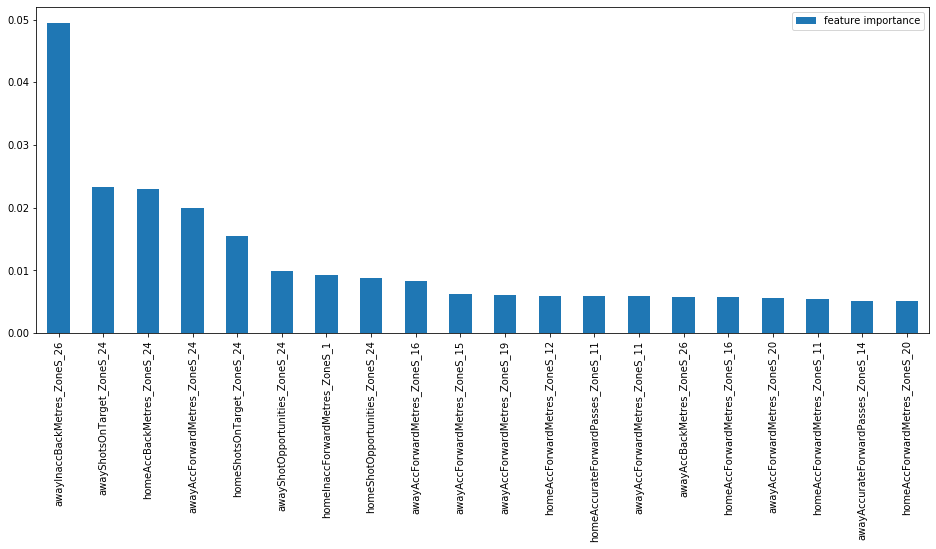

In [348]:
df_feature_importance[0:20].plot(kind='bar');


In [349]:
df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in clf.estimators_], columns=X_all.columns)
df_feature_long = pd.melt(df_feature_all,var_name='feature name', value_name='values')


In [350]:
df_feature_importance.index[:10]

Index(['awayInaccBackMetres_ZoneS_26', 'awayShotsOnTarget_ZoneS_24',
       'homeAccBackMetres_ZoneS_24', 'awayAccForwardMetres_ZoneS_24',
       'homeShotsOnTarget_ZoneS_24', 'awayShotOpportunities_ZoneS_24',
       'homeInaccForwardMetres_ZoneS_1', 'homeShotOpportunities_ZoneS_24',
       'awayAccForwardMetres_ZoneS_16', 'awayAccForwardMetres_ZoneS_15'],
      dtype='object')

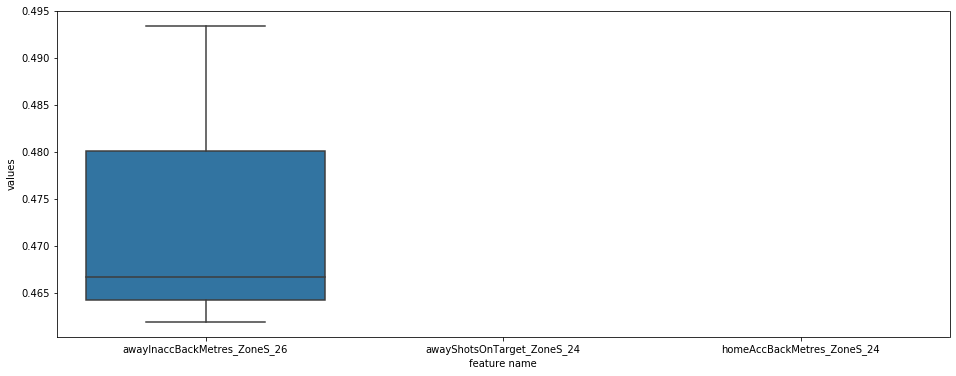

In [351]:
sns.boxplot(x="feature name", y="values", data=df_feature_long.sort_values('values',ascending=False)[:3], order=df_feature_importance.index[:3]);


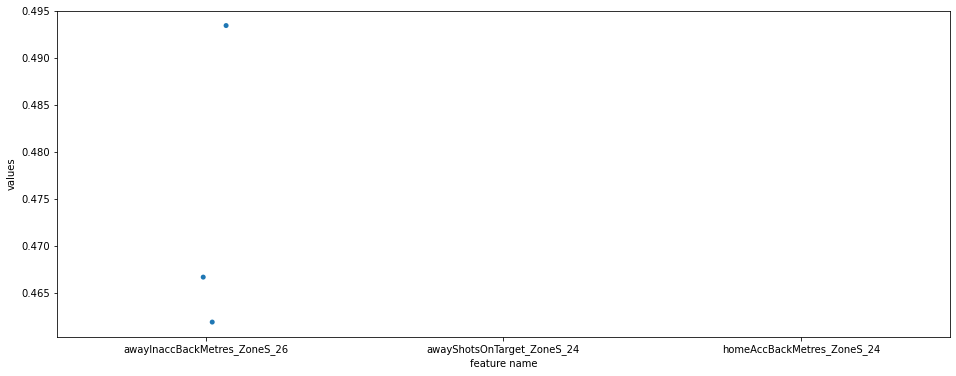

In [121]:
sns.stripplot(x="feature name", y="values", data=df_feature_long.sort_values('values',ascending=False)[:3], order=df_feature_importance.index[:3]);


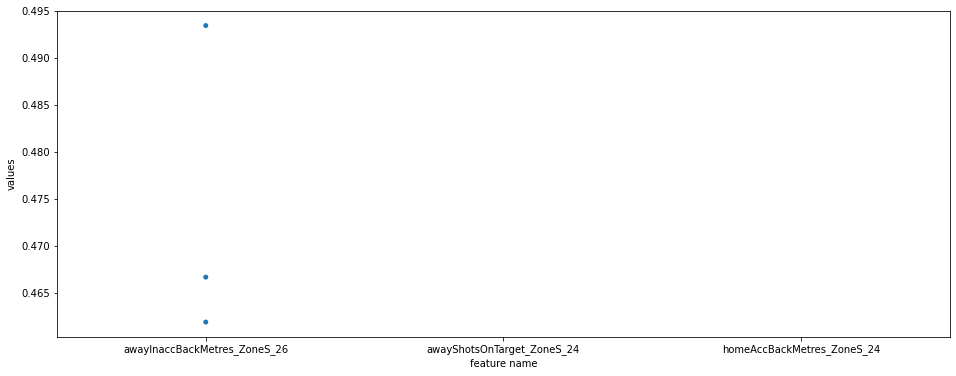

In [122]:
sns.swarmplot(x="feature name", y="values", data=df_feature_long.sort_values('values',ascending=False)[:3], order=df_feature_importance.index[:3]);


#### fdnn

In [352]:
X_test2 = [tree.predict(X_test) for tree in clf.estimators_]
X_test2 = np.transpose(X_test2)
X_train2 = [tree.predict(X_train) for tree in clf.estimators_]
X_train2 = np.transpose(X_train2)


In [124]:
# x_total = [tree.predict(result) for tree in clf.estimators_]
# x_total = np.transpose(x_total)

In [353]:
def X_transform(X):
    df = []  
    for sample in X:
        s = []
        for feature in sample:
            if feature == 2:
                s.append([0, 0, 1])
            elif feature == 1:
                s.append([0, 1, 0])
            else:
                s.append([1, 0, 0])
        df.append(s)
    df = np.array(df)
    return df

In [354]:
X_train2 = X_transform(X_train2)
X_test2 = X_transform(X_test2)

In [355]:
X_train2.shape
X_test2.shape

(366, 500, 3)

In [356]:
## one-hot encode the labels
def y_transform(Y):
    df = []
    for l in Y:
        if l == 1:
            df.append([0, 0, 1])
        elif l == 0:
            df.append([0, 1, 0])
        else:
            df.append([1, 0, 0])
    df = np.array(df,dtype=int)
    return df

In [357]:
y_train2 = y_transform(y_train)
y_test2 = y_transform(y_test)

In [358]:
print(y_train2.shape)
print(y_test2.shape)

(1460, 3)
(366, 3)


In [359]:
X_train2, X_test3, y_train2, y_test3 = train_test_split(X_train2, y_train2, test_size=0.2)


In [360]:
print(y_train2.shape)
print(X_train2.shape)


(1168, 3)
(1168, 500, 3)


##### Keras DNN

In [361]:
# Model

model = Sequential()
model.add(Flatten(input_shape=(500,3)))
model.add(Dense(256, activation='relu', kernel_initializer = 'he_normal' ,input_shape=(500*3,)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax',kernel_initializer = 'he_normal'))
#optim = keras.optimizers.SGD(lr=0.01, momentum=0.975, decay=2e-06, nesterov=True)
opt = keras.optimizers.Adam(learning_rate=0.000001)


model.compile(loss='categorical_crossentropy',
optimizer=opt, metrics=['accuracy'])


#history = model.fit(X_train2, y_train2,
#batch_size = 32, epochs = 1,  verbose = 2)#, validation_data= (x_valid, y_valid))

history = model.fit(X_train2, y_train2, validation_data = (X_test3, y_test3), epochs=2500, batch_size=32, verbose =2)

# batchsize 256
#lr 0.00001, 0.0001

print(model.summary())

# score = model.evaluate(X_test2, y_test2, verbose=0)
# print('Test loss:', score[0])
# print('Test top 1 accuracy:', score[1])


Epoch 1/2500
37/37 - 0s - loss: 1.7930 - accuracy: 0.3185 - val_loss: 1.2921 - val_accuracy: 0.2397
Epoch 2/2500
37/37 - 0s - loss: 1.7830 - accuracy: 0.3134 - val_loss: 1.2676 - val_accuracy: 0.2363
Epoch 3/2500
37/37 - 0s - loss: 1.7497 - accuracy: 0.2902 - val_loss: 1.2455 - val_accuracy: 0.2534
Epoch 4/2500
37/37 - 0s - loss: 1.6654 - accuracy: 0.3228 - val_loss: 1.2252 - val_accuracy: 0.2603
Epoch 5/2500
37/37 - 0s - loss: 1.6261 - accuracy: 0.3356 - val_loss: 1.2074 - val_accuracy: 0.2705
Epoch 6/2500
37/37 - 0s - loss: 1.7038 - accuracy: 0.3142 - val_loss: 1.1908 - val_accuracy: 0.2877
Epoch 7/2500
37/37 - 0s - loss: 1.6393 - accuracy: 0.3271 - val_loss: 1.1755 - val_accuracy: 0.3014
Epoch 8/2500
37/37 - 0s - loss: 1.5468 - accuracy: 0.3416 - val_loss: 1.1618 - val_accuracy: 0.3048
Epoch 9/2500
37/37 - 0s - loss: 1.5798 - accuracy: 0.3348 - val_loss: 1.1489 - val_accuracy: 0.3082
Epoch 10/2500
37/37 - 0s - loss: 1.5064 - accuracy: 0.3433 - val_loss: 1.1371 - val_accuracy: 0.3219

Epoch 83/2500
37/37 - 0s - loss: 1.0948 - accuracy: 0.4700 - val_loss: 0.9270 - val_accuracy: 0.6130
Epoch 84/2500
37/37 - 0s - loss: 1.0631 - accuracy: 0.4923 - val_loss: 0.9259 - val_accuracy: 0.6130
Epoch 85/2500
37/37 - 0s - loss: 1.0557 - accuracy: 0.5094 - val_loss: 0.9246 - val_accuracy: 0.6130
Epoch 86/2500
37/37 - 0s - loss: 1.0869 - accuracy: 0.4966 - val_loss: 0.9233 - val_accuracy: 0.6096
Epoch 87/2500
37/37 - 0s - loss: 1.1030 - accuracy: 0.4837 - val_loss: 0.9221 - val_accuracy: 0.6130
Epoch 88/2500
37/37 - 0s - loss: 1.1110 - accuracy: 0.4795 - val_loss: 0.9210 - val_accuracy: 0.6130
Epoch 89/2500
37/37 - 0s - loss: 1.0753 - accuracy: 0.4897 - val_loss: 0.9198 - val_accuracy: 0.6130
Epoch 90/2500
37/37 - 0s - loss: 1.0913 - accuracy: 0.4889 - val_loss: 0.9187 - val_accuracy: 0.6130
Epoch 91/2500
37/37 - 0s - loss: 1.0941 - accuracy: 0.4675 - val_loss: 0.9175 - val_accuracy: 0.6130
Epoch 92/2500
37/37 - 0s - loss: 1.1155 - accuracy: 0.4837 - val_loss: 0.9165 - val_accurac

Epoch 164/2500
37/37 - 0s - loss: 0.9691 - accuracy: 0.5531 - val_loss: 0.8490 - val_accuracy: 0.6507
Epoch 165/2500
37/37 - 0s - loss: 0.9653 - accuracy: 0.5557 - val_loss: 0.8484 - val_accuracy: 0.6507
Epoch 166/2500
37/37 - 0s - loss: 0.9672 - accuracy: 0.5668 - val_loss: 0.8477 - val_accuracy: 0.6507
Epoch 167/2500
37/37 - 0s - loss: 0.9539 - accuracy: 0.5522 - val_loss: 0.8468 - val_accuracy: 0.6507
Epoch 168/2500
37/37 - 0s - loss: 1.0091 - accuracy: 0.5317 - val_loss: 0.8460 - val_accuracy: 0.6507
Epoch 169/2500
37/37 - 0s - loss: 0.9885 - accuracy: 0.5248 - val_loss: 0.8453 - val_accuracy: 0.6507
Epoch 170/2500
37/37 - 0s - loss: 0.9702 - accuracy: 0.5514 - val_loss: 0.8445 - val_accuracy: 0.6507
Epoch 171/2500
37/37 - 0s - loss: 0.9933 - accuracy: 0.5479 - val_loss: 0.8439 - val_accuracy: 0.6507
Epoch 172/2500
37/37 - 0s - loss: 0.9843 - accuracy: 0.5402 - val_loss: 0.8431 - val_accuracy: 0.6507
Epoch 173/2500
37/37 - 0s - loss: 0.9948 - accuracy: 0.5334 - val_loss: 0.8425 - v

Epoch 245/2500
37/37 - 0s - loss: 0.9086 - accuracy: 0.5822 - val_loss: 0.7937 - val_accuracy: 0.6678
Epoch 246/2500
37/37 - 0s - loss: 0.8964 - accuracy: 0.6062 - val_loss: 0.7930 - val_accuracy: 0.6678
Epoch 247/2500
37/37 - 0s - loss: 0.8743 - accuracy: 0.6053 - val_loss: 0.7924 - val_accuracy: 0.6678
Epoch 248/2500
37/37 - 0s - loss: 0.9268 - accuracy: 0.5745 - val_loss: 0.7917 - val_accuracy: 0.6678
Epoch 249/2500
37/37 - 0s - loss: 0.9271 - accuracy: 0.5574 - val_loss: 0.7912 - val_accuracy: 0.6678
Epoch 250/2500
37/37 - 0s - loss: 0.8843 - accuracy: 0.6096 - val_loss: 0.7906 - val_accuracy: 0.6678
Epoch 251/2500
37/37 - 0s - loss: 0.8721 - accuracy: 0.5993 - val_loss: 0.7899 - val_accuracy: 0.6678
Epoch 252/2500
37/37 - 0s - loss: 0.9273 - accuracy: 0.5634 - val_loss: 0.7893 - val_accuracy: 0.6712
Epoch 253/2500
37/37 - 0s - loss: 0.8990 - accuracy: 0.5736 - val_loss: 0.7888 - val_accuracy: 0.6712
Epoch 254/2500
37/37 - 0s - loss: 0.8805 - accuracy: 0.5993 - val_loss: 0.7882 - v

Epoch 326/2500
37/37 - 0s - loss: 0.8597 - accuracy: 0.6113 - val_loss: 0.7527 - val_accuracy: 0.6815
Epoch 327/2500
37/37 - 0s - loss: 0.8191 - accuracy: 0.6284 - val_loss: 0.7521 - val_accuracy: 0.6815
Epoch 328/2500
37/37 - 0s - loss: 0.8518 - accuracy: 0.6233 - val_loss: 0.7518 - val_accuracy: 0.6815
Epoch 329/2500
37/37 - 0s - loss: 0.8332 - accuracy: 0.6190 - val_loss: 0.7513 - val_accuracy: 0.6781
Epoch 330/2500
37/37 - 0s - loss: 0.8182 - accuracy: 0.6387 - val_loss: 0.7508 - val_accuracy: 0.6781
Epoch 331/2500
37/37 - 0s - loss: 0.8476 - accuracy: 0.6216 - val_loss: 0.7504 - val_accuracy: 0.6781
Epoch 332/2500
37/37 - 0s - loss: 0.8526 - accuracy: 0.6122 - val_loss: 0.7499 - val_accuracy: 0.6781
Epoch 333/2500
37/37 - 0s - loss: 0.8303 - accuracy: 0.6301 - val_loss: 0.7494 - val_accuracy: 0.6781
Epoch 334/2500
37/37 - 0s - loss: 0.8386 - accuracy: 0.6250 - val_loss: 0.7489 - val_accuracy: 0.6781
Epoch 335/2500
37/37 - 0s - loss: 0.8511 - accuracy: 0.6156 - val_loss: 0.7484 - v

Epoch 407/2500
37/37 - 0s - loss: 0.7832 - accuracy: 0.6507 - val_loss: 0.7194 - val_accuracy: 0.6849
Epoch 408/2500
37/37 - 0s - loss: 0.8086 - accuracy: 0.6490 - val_loss: 0.7191 - val_accuracy: 0.6849
Epoch 409/2500
37/37 - 0s - loss: 0.8236 - accuracy: 0.6216 - val_loss: 0.7188 - val_accuracy: 0.6849
Epoch 410/2500
37/37 - 0s - loss: 0.7713 - accuracy: 0.6627 - val_loss: 0.7185 - val_accuracy: 0.6849
Epoch 411/2500
37/37 - 0s - loss: 0.7984 - accuracy: 0.6447 - val_loss: 0.7182 - val_accuracy: 0.6849
Epoch 412/2500
37/37 - 0s - loss: 0.7900 - accuracy: 0.6524 - val_loss: 0.7178 - val_accuracy: 0.6849
Epoch 413/2500
37/37 - 0s - loss: 0.8054 - accuracy: 0.6361 - val_loss: 0.7175 - val_accuracy: 0.6884
Epoch 414/2500
37/37 - 0s - loss: 0.8150 - accuracy: 0.6481 - val_loss: 0.7172 - val_accuracy: 0.6884
Epoch 415/2500
37/37 - 0s - loss: 0.8036 - accuracy: 0.6353 - val_loss: 0.7168 - val_accuracy: 0.6884
Epoch 416/2500
37/37 - 0s - loss: 0.7918 - accuracy: 0.6498 - val_loss: 0.7166 - v

Epoch 488/2500
37/37 - 0s - loss: 0.7768 - accuracy: 0.6618 - val_loss: 0.6939 - val_accuracy: 0.6918
Epoch 489/2500
37/37 - 0s - loss: 0.7520 - accuracy: 0.6541 - val_loss: 0.6937 - val_accuracy: 0.6918
Epoch 490/2500
37/37 - 0s - loss: 0.7566 - accuracy: 0.6601 - val_loss: 0.6934 - val_accuracy: 0.6918
Epoch 491/2500
37/37 - 0s - loss: 0.7632 - accuracy: 0.6490 - val_loss: 0.6930 - val_accuracy: 0.6918
Epoch 492/2500
37/37 - 0s - loss: 0.7698 - accuracy: 0.6618 - val_loss: 0.6927 - val_accuracy: 0.6918
Epoch 493/2500
37/37 - 0s - loss: 0.7654 - accuracy: 0.6550 - val_loss: 0.6924 - val_accuracy: 0.6952
Epoch 494/2500
37/37 - 0s - loss: 0.7564 - accuracy: 0.6575 - val_loss: 0.6921 - val_accuracy: 0.6952
Epoch 495/2500
37/37 - 0s - loss: 0.7628 - accuracy: 0.6550 - val_loss: 0.6919 - val_accuracy: 0.6952
Epoch 496/2500
37/37 - 0s - loss: 0.7589 - accuracy: 0.6755 - val_loss: 0.6914 - val_accuracy: 0.6952
Epoch 497/2500
37/37 - 0s - loss: 0.7536 - accuracy: 0.6687 - val_loss: 0.6911 - v

Epoch 569/2500
37/37 - 0s - loss: 0.7508 - accuracy: 0.6815 - val_loss: 0.6705 - val_accuracy: 0.7123
Epoch 570/2500
37/37 - 0s - loss: 0.7533 - accuracy: 0.6704 - val_loss: 0.6704 - val_accuracy: 0.7123
Epoch 571/2500
37/37 - 0s - loss: 0.7230 - accuracy: 0.6892 - val_loss: 0.6701 - val_accuracy: 0.7158
Epoch 572/2500
37/37 - 0s - loss: 0.7032 - accuracy: 0.6858 - val_loss: 0.6699 - val_accuracy: 0.7192
Epoch 573/2500
37/37 - 0s - loss: 0.7547 - accuracy: 0.6610 - val_loss: 0.6697 - val_accuracy: 0.7192
Epoch 574/2500
37/37 - 0s - loss: 0.7470 - accuracy: 0.6747 - val_loss: 0.6695 - val_accuracy: 0.7158
Epoch 575/2500
37/37 - 0s - loss: 0.7303 - accuracy: 0.6712 - val_loss: 0.6691 - val_accuracy: 0.7158
Epoch 576/2500
37/37 - 0s - loss: 0.7475 - accuracy: 0.6755 - val_loss: 0.6689 - val_accuracy: 0.7158
Epoch 577/2500
37/37 - 0s - loss: 0.7281 - accuracy: 0.6704 - val_loss: 0.6685 - val_accuracy: 0.7192
Epoch 578/2500
37/37 - 0s - loss: 0.7347 - accuracy: 0.6627 - val_loss: 0.6682 - v

Epoch 650/2500
37/37 - 0s - loss: 0.7164 - accuracy: 0.6807 - val_loss: 0.6481 - val_accuracy: 0.7295
Epoch 651/2500
37/37 - 0s - loss: 0.6758 - accuracy: 0.7089 - val_loss: 0.6476 - val_accuracy: 0.7295
Epoch 652/2500
37/37 - 0s - loss: 0.7067 - accuracy: 0.6841 - val_loss: 0.6472 - val_accuracy: 0.7295
Epoch 653/2500
37/37 - 0s - loss: 0.7157 - accuracy: 0.6926 - val_loss: 0.6470 - val_accuracy: 0.7295
Epoch 654/2500
37/37 - 0s - loss: 0.6863 - accuracy: 0.7192 - val_loss: 0.6466 - val_accuracy: 0.7295
Epoch 655/2500
37/37 - 0s - loss: 0.6841 - accuracy: 0.7046 - val_loss: 0.6461 - val_accuracy: 0.7295
Epoch 656/2500
37/37 - 0s - loss: 0.6935 - accuracy: 0.7106 - val_loss: 0.6458 - val_accuracy: 0.7295
Epoch 657/2500
37/37 - 0s - loss: 0.6864 - accuracy: 0.7149 - val_loss: 0.6456 - val_accuracy: 0.7295
Epoch 658/2500
37/37 - 0s - loss: 0.7178 - accuracy: 0.6815 - val_loss: 0.6454 - val_accuracy: 0.7295
Epoch 659/2500
37/37 - 0s - loss: 0.7041 - accuracy: 0.6978 - val_loss: 0.6450 - v

Epoch 731/2500
37/37 - 0s - loss: 0.6743 - accuracy: 0.7166 - val_loss: 0.6253 - val_accuracy: 0.7432
Epoch 732/2500
37/37 - 0s - loss: 0.6900 - accuracy: 0.6986 - val_loss: 0.6252 - val_accuracy: 0.7432
Epoch 733/2500
37/37 - 0s - loss: 0.6677 - accuracy: 0.7346 - val_loss: 0.6249 - val_accuracy: 0.7432
Epoch 734/2500
37/37 - 0s - loss: 0.6738 - accuracy: 0.7269 - val_loss: 0.6248 - val_accuracy: 0.7432
Epoch 735/2500
37/37 - 0s - loss: 0.6673 - accuracy: 0.7286 - val_loss: 0.6245 - val_accuracy: 0.7432
Epoch 736/2500
37/37 - 0s - loss: 0.6787 - accuracy: 0.6935 - val_loss: 0.6242 - val_accuracy: 0.7466
Epoch 737/2500
37/37 - 0s - loss: 0.6677 - accuracy: 0.7158 - val_loss: 0.6238 - val_accuracy: 0.7466
Epoch 738/2500
37/37 - 0s - loss: 0.6447 - accuracy: 0.7140 - val_loss: 0.6236 - val_accuracy: 0.7466
Epoch 739/2500
37/37 - 0s - loss: 0.7071 - accuracy: 0.6721 - val_loss: 0.6235 - val_accuracy: 0.7466
Epoch 740/2500
37/37 - 0s - loss: 0.6498 - accuracy: 0.7277 - val_loss: 0.6234 - v

Epoch 812/2500
37/37 - 0s - loss: 0.6383 - accuracy: 0.7372 - val_loss: 0.6027 - val_accuracy: 0.7637
Epoch 813/2500
37/37 - 0s - loss: 0.6252 - accuracy: 0.7295 - val_loss: 0.6024 - val_accuracy: 0.7637
Epoch 814/2500
37/37 - 0s - loss: 0.6219 - accuracy: 0.7526 - val_loss: 0.6020 - val_accuracy: 0.7637
Epoch 815/2500
37/37 - 0s - loss: 0.6450 - accuracy: 0.7295 - val_loss: 0.6018 - val_accuracy: 0.7637
Epoch 816/2500
37/37 - 0s - loss: 0.6314 - accuracy: 0.7526 - val_loss: 0.6015 - val_accuracy: 0.7637
Epoch 817/2500
37/37 - 0s - loss: 0.6624 - accuracy: 0.7200 - val_loss: 0.6013 - val_accuracy: 0.7637
Epoch 818/2500
37/37 - 0s - loss: 0.6608 - accuracy: 0.7209 - val_loss: 0.6008 - val_accuracy: 0.7637
Epoch 819/2500
37/37 - 0s - loss: 0.6340 - accuracy: 0.7509 - val_loss: 0.6006 - val_accuracy: 0.7671
Epoch 820/2500
37/37 - 0s - loss: 0.6171 - accuracy: 0.7466 - val_loss: 0.6002 - val_accuracy: 0.7637
Epoch 821/2500
37/37 - 0s - loss: 0.6182 - accuracy: 0.7517 - val_loss: 0.5999 - v

Epoch 893/2500
37/37 - 0s - loss: 0.6340 - accuracy: 0.7449 - val_loss: 0.5785 - val_accuracy: 0.7842
Epoch 894/2500
37/37 - 0s - loss: 0.6130 - accuracy: 0.7449 - val_loss: 0.5782 - val_accuracy: 0.7842
Epoch 895/2500
37/37 - 0s - loss: 0.5937 - accuracy: 0.7526 - val_loss: 0.5777 - val_accuracy: 0.7842
Epoch 896/2500
37/37 - 0s - loss: 0.5987 - accuracy: 0.7603 - val_loss: 0.5773 - val_accuracy: 0.7842
Epoch 897/2500
37/37 - 0s - loss: 0.6126 - accuracy: 0.7543 - val_loss: 0.5769 - val_accuracy: 0.7842
Epoch 898/2500
37/37 - 0s - loss: 0.6056 - accuracy: 0.7414 - val_loss: 0.5763 - val_accuracy: 0.7842
Epoch 899/2500
37/37 - 0s - loss: 0.6210 - accuracy: 0.7568 - val_loss: 0.5760 - val_accuracy: 0.7842
Epoch 900/2500
37/37 - 0s - loss: 0.5964 - accuracy: 0.7509 - val_loss: 0.5755 - val_accuracy: 0.7842
Epoch 901/2500
37/37 - 0s - loss: 0.6040 - accuracy: 0.7560 - val_loss: 0.5752 - val_accuracy: 0.7842
Epoch 902/2500
37/37 - 0s - loss: 0.5765 - accuracy: 0.7663 - val_loss: 0.5749 - v

Epoch 974/2500
37/37 - 0s - loss: 0.5631 - accuracy: 0.7791 - val_loss: 0.5533 - val_accuracy: 0.7945
Epoch 975/2500
37/37 - 0s - loss: 0.5562 - accuracy: 0.7731 - val_loss: 0.5530 - val_accuracy: 0.7911
Epoch 976/2500
37/37 - 0s - loss: 0.5967 - accuracy: 0.7543 - val_loss: 0.5528 - val_accuracy: 0.7945
Epoch 977/2500
37/37 - 0s - loss: 0.5621 - accuracy: 0.7748 - val_loss: 0.5526 - val_accuracy: 0.7945
Epoch 978/2500
37/37 - 0s - loss: 0.5767 - accuracy: 0.7748 - val_loss: 0.5523 - val_accuracy: 0.7945
Epoch 979/2500
37/37 - 0s - loss: 0.5853 - accuracy: 0.7654 - val_loss: 0.5519 - val_accuracy: 0.7945
Epoch 980/2500
37/37 - 0s - loss: 0.5673 - accuracy: 0.7723 - val_loss: 0.5516 - val_accuracy: 0.7979
Epoch 981/2500
37/37 - 0s - loss: 0.5710 - accuracy: 0.7637 - val_loss: 0.5513 - val_accuracy: 0.7979
Epoch 982/2500
37/37 - 0s - loss: 0.5833 - accuracy: 0.7723 - val_loss: 0.5509 - val_accuracy: 0.7979
Epoch 983/2500
37/37 - 0s - loss: 0.5599 - accuracy: 0.7748 - val_loss: 0.5505 - v

Epoch 1054/2500
37/37 - 0s - loss: 0.5214 - accuracy: 0.7885 - val_loss: 0.5284 - val_accuracy: 0.8185
Epoch 1055/2500
37/37 - 0s - loss: 0.5528 - accuracy: 0.7663 - val_loss: 0.5282 - val_accuracy: 0.8185
Epoch 1056/2500
37/37 - 0s - loss: 0.5238 - accuracy: 0.8005 - val_loss: 0.5277 - val_accuracy: 0.8185
Epoch 1057/2500
37/37 - 0s - loss: 0.5583 - accuracy: 0.7628 - val_loss: 0.5272 - val_accuracy: 0.8151
Epoch 1058/2500
37/37 - 0s - loss: 0.5373 - accuracy: 0.7714 - val_loss: 0.5267 - val_accuracy: 0.8185
Epoch 1059/2500
37/37 - 0s - loss: 0.5431 - accuracy: 0.7945 - val_loss: 0.5264 - val_accuracy: 0.8185
Epoch 1060/2500
37/37 - 0s - loss: 0.5496 - accuracy: 0.7783 - val_loss: 0.5262 - val_accuracy: 0.8185
Epoch 1061/2500
37/37 - 0s - loss: 0.5331 - accuracy: 0.7894 - val_loss: 0.5258 - val_accuracy: 0.8185
Epoch 1062/2500
37/37 - 0s - loss: 0.5565 - accuracy: 0.7791 - val_loss: 0.5255 - val_accuracy: 0.8185
Epoch 1063/2500
37/37 - 0s - loss: 0.5131 - accuracy: 0.7954 - val_loss: 

Epoch 1134/2500
37/37 - 0s - loss: 0.5192 - accuracy: 0.8057 - val_loss: 0.5009 - val_accuracy: 0.8253
Epoch 1135/2500
37/37 - 0s - loss: 0.5103 - accuracy: 0.7928 - val_loss: 0.5007 - val_accuracy: 0.8253
Epoch 1136/2500
37/37 - 0s - loss: 0.4892 - accuracy: 0.8108 - val_loss: 0.5000 - val_accuracy: 0.8253
Epoch 1137/2500
37/37 - 0s - loss: 0.5082 - accuracy: 0.7962 - val_loss: 0.4996 - val_accuracy: 0.8288
Epoch 1138/2500
37/37 - 0s - loss: 0.4981 - accuracy: 0.7885 - val_loss: 0.4994 - val_accuracy: 0.8288
Epoch 1139/2500
37/37 - 0s - loss: 0.5073 - accuracy: 0.7988 - val_loss: 0.4992 - val_accuracy: 0.8322
Epoch 1140/2500
37/37 - 0s - loss: 0.5248 - accuracy: 0.8005 - val_loss: 0.4988 - val_accuracy: 0.8322
Epoch 1141/2500
37/37 - 0s - loss: 0.4993 - accuracy: 0.8082 - val_loss: 0.4986 - val_accuracy: 0.8322
Epoch 1142/2500
37/37 - 0s - loss: 0.5135 - accuracy: 0.7842 - val_loss: 0.4986 - val_accuracy: 0.8322
Epoch 1143/2500
37/37 - 0s - loss: 0.4760 - accuracy: 0.8185 - val_loss: 

Epoch 1214/2500
37/37 - 0s - loss: 0.4820 - accuracy: 0.8134 - val_loss: 0.4762 - val_accuracy: 0.8322
Epoch 1215/2500
37/37 - 0s - loss: 0.4625 - accuracy: 0.8348 - val_loss: 0.4761 - val_accuracy: 0.8322
Epoch 1216/2500
37/37 - 0s - loss: 0.4672 - accuracy: 0.8211 - val_loss: 0.4755 - val_accuracy: 0.8356
Epoch 1217/2500
37/37 - 0s - loss: 0.4660 - accuracy: 0.8211 - val_loss: 0.4751 - val_accuracy: 0.8356
Epoch 1218/2500
37/37 - 0s - loss: 0.4551 - accuracy: 0.8373 - val_loss: 0.4748 - val_accuracy: 0.8356
Epoch 1219/2500
37/37 - 0s - loss: 0.4825 - accuracy: 0.8091 - val_loss: 0.4745 - val_accuracy: 0.8356
Epoch 1220/2500
37/37 - 0s - loss: 0.4703 - accuracy: 0.8193 - val_loss: 0.4744 - val_accuracy: 0.8356
Epoch 1221/2500
37/37 - 0s - loss: 0.4745 - accuracy: 0.8202 - val_loss: 0.4741 - val_accuracy: 0.8356
Epoch 1222/2500
37/37 - 0s - loss: 0.4807 - accuracy: 0.8288 - val_loss: 0.4736 - val_accuracy: 0.8356
Epoch 1223/2500
37/37 - 0s - loss: 0.4826 - accuracy: 0.8262 - val_loss: 

Epoch 1294/2500
37/37 - 0s - loss: 0.4323 - accuracy: 0.8450 - val_loss: 0.4512 - val_accuracy: 0.8356
Epoch 1295/2500
37/37 - 0s - loss: 0.4260 - accuracy: 0.8467 - val_loss: 0.4507 - val_accuracy: 0.8356
Epoch 1296/2500
37/37 - 0s - loss: 0.4461 - accuracy: 0.8288 - val_loss: 0.4509 - val_accuracy: 0.8356
Epoch 1297/2500
37/37 - 0s - loss: 0.4479 - accuracy: 0.8288 - val_loss: 0.4506 - val_accuracy: 0.8356
Epoch 1298/2500
37/37 - 0s - loss: 0.4479 - accuracy: 0.8305 - val_loss: 0.4504 - val_accuracy: 0.8356
Epoch 1299/2500
37/37 - 0s - loss: 0.4273 - accuracy: 0.8485 - val_loss: 0.4503 - val_accuracy: 0.8390
Epoch 1300/2500
37/37 - 0s - loss: 0.4342 - accuracy: 0.8433 - val_loss: 0.4506 - val_accuracy: 0.8390
Epoch 1301/2500
37/37 - 0s - loss: 0.4410 - accuracy: 0.8313 - val_loss: 0.4500 - val_accuracy: 0.8390
Epoch 1302/2500
37/37 - 0s - loss: 0.4319 - accuracy: 0.8493 - val_loss: 0.4495 - val_accuracy: 0.8356
Epoch 1303/2500
37/37 - 0s - loss: 0.4319 - accuracy: 0.8416 - val_loss: 

Epoch 1374/2500
37/37 - 0s - loss: 0.4078 - accuracy: 0.8579 - val_loss: 0.4292 - val_accuracy: 0.8459
Epoch 1375/2500
37/37 - 0s - loss: 0.4071 - accuracy: 0.8536 - val_loss: 0.4287 - val_accuracy: 0.8459
Epoch 1376/2500
37/37 - 0s - loss: 0.4177 - accuracy: 0.8433 - val_loss: 0.4284 - val_accuracy: 0.8459
Epoch 1377/2500
37/37 - 0s - loss: 0.3934 - accuracy: 0.8656 - val_loss: 0.4280 - val_accuracy: 0.8459
Epoch 1378/2500
37/37 - 0s - loss: 0.4255 - accuracy: 0.8467 - val_loss: 0.4277 - val_accuracy: 0.8459
Epoch 1379/2500
37/37 - 0s - loss: 0.4152 - accuracy: 0.8399 - val_loss: 0.4272 - val_accuracy: 0.8459
Epoch 1380/2500
37/37 - 0s - loss: 0.4133 - accuracy: 0.8493 - val_loss: 0.4270 - val_accuracy: 0.8425
Epoch 1381/2500
37/37 - 0s - loss: 0.4161 - accuracy: 0.8562 - val_loss: 0.4269 - val_accuracy: 0.8425
Epoch 1382/2500
37/37 - 0s - loss: 0.4249 - accuracy: 0.8442 - val_loss: 0.4266 - val_accuracy: 0.8425
Epoch 1383/2500
37/37 - 0s - loss: 0.4280 - accuracy: 0.8459 - val_loss: 

Epoch 1454/2500
37/37 - 0s - loss: 0.3799 - accuracy: 0.8776 - val_loss: 0.4056 - val_accuracy: 0.8493
Epoch 1455/2500
37/37 - 0s - loss: 0.3573 - accuracy: 0.8647 - val_loss: 0.4055 - val_accuracy: 0.8493
Epoch 1456/2500
37/37 - 0s - loss: 0.3805 - accuracy: 0.8596 - val_loss: 0.4052 - val_accuracy: 0.8493
Epoch 1457/2500
37/37 - 0s - loss: 0.3898 - accuracy: 0.8545 - val_loss: 0.4049 - val_accuracy: 0.8493
Epoch 1458/2500
37/37 - 0s - loss: 0.3719 - accuracy: 0.8716 - val_loss: 0.4045 - val_accuracy: 0.8527
Epoch 1459/2500
37/37 - 0s - loss: 0.4019 - accuracy: 0.8433 - val_loss: 0.4041 - val_accuracy: 0.8493
Epoch 1460/2500
37/37 - 0s - loss: 0.3981 - accuracy: 0.8630 - val_loss: 0.4041 - val_accuracy: 0.8493
Epoch 1461/2500
37/37 - 0s - loss: 0.3961 - accuracy: 0.8519 - val_loss: 0.4040 - val_accuracy: 0.8493
Epoch 1462/2500
37/37 - 0s - loss: 0.3972 - accuracy: 0.8553 - val_loss: 0.4037 - val_accuracy: 0.8493
Epoch 1463/2500
37/37 - 0s - loss: 0.4001 - accuracy: 0.8553 - val_loss: 

Epoch 1534/2500
37/37 - 0s - loss: 0.3952 - accuracy: 0.8553 - val_loss: 0.3864 - val_accuracy: 0.8630
Epoch 1535/2500
37/37 - 0s - loss: 0.3725 - accuracy: 0.8673 - val_loss: 0.3861 - val_accuracy: 0.8630
Epoch 1536/2500
37/37 - 0s - loss: 0.3624 - accuracy: 0.8656 - val_loss: 0.3860 - val_accuracy: 0.8596
Epoch 1537/2500
37/37 - 0s - loss: 0.3861 - accuracy: 0.8664 - val_loss: 0.3855 - val_accuracy: 0.8630
Epoch 1538/2500
37/37 - 0s - loss: 0.3382 - accuracy: 0.8793 - val_loss: 0.3849 - val_accuracy: 0.8596
Epoch 1539/2500
37/37 - 0s - loss: 0.3703 - accuracy: 0.8699 - val_loss: 0.3850 - val_accuracy: 0.8596
Epoch 1540/2500
37/37 - 0s - loss: 0.3512 - accuracy: 0.8724 - val_loss: 0.3848 - val_accuracy: 0.8596
Epoch 1541/2500
37/37 - 0s - loss: 0.3548 - accuracy: 0.8810 - val_loss: 0.3844 - val_accuracy: 0.8596
Epoch 1542/2500
37/37 - 0s - loss: 0.3529 - accuracy: 0.8750 - val_loss: 0.3841 - val_accuracy: 0.8630
Epoch 1543/2500
37/37 - 0s - loss: 0.3594 - accuracy: 0.8716 - val_loss: 

Epoch 1614/2500
37/37 - 0s - loss: 0.3495 - accuracy: 0.8604 - val_loss: 0.3672 - val_accuracy: 0.8664
Epoch 1615/2500
37/37 - 0s - loss: 0.3553 - accuracy: 0.8639 - val_loss: 0.3672 - val_accuracy: 0.8664
Epoch 1616/2500
37/37 - 0s - loss: 0.3151 - accuracy: 0.8981 - val_loss: 0.3672 - val_accuracy: 0.8664
Epoch 1617/2500
37/37 - 0s - loss: 0.3452 - accuracy: 0.8716 - val_loss: 0.3674 - val_accuracy: 0.8664
Epoch 1618/2500
37/37 - 0s - loss: 0.3331 - accuracy: 0.8784 - val_loss: 0.3674 - val_accuracy: 0.8664
Epoch 1619/2500
37/37 - 0s - loss: 0.3425 - accuracy: 0.8793 - val_loss: 0.3672 - val_accuracy: 0.8664
Epoch 1620/2500
37/37 - 0s - loss: 0.3102 - accuracy: 0.8981 - val_loss: 0.3671 - val_accuracy: 0.8664
Epoch 1621/2500
37/37 - 0s - loss: 0.3331 - accuracy: 0.8818 - val_loss: 0.3671 - val_accuracy: 0.8664
Epoch 1622/2500
37/37 - 0s - loss: 0.3288 - accuracy: 0.8853 - val_loss: 0.3666 - val_accuracy: 0.8664
Epoch 1623/2500
37/37 - 0s - loss: 0.3424 - accuracy: 0.8750 - val_loss: 

Epoch 1694/2500
37/37 - 0s - loss: 0.3281 - accuracy: 0.8870 - val_loss: 0.3525 - val_accuracy: 0.8733
Epoch 1695/2500
37/37 - 0s - loss: 0.3083 - accuracy: 0.8930 - val_loss: 0.3524 - val_accuracy: 0.8733
Epoch 1696/2500
37/37 - 0s - loss: 0.2984 - accuracy: 0.8904 - val_loss: 0.3525 - val_accuracy: 0.8733
Epoch 1697/2500
37/37 - 0s - loss: 0.3130 - accuracy: 0.8930 - val_loss: 0.3523 - val_accuracy: 0.8733
Epoch 1698/2500
37/37 - 0s - loss: 0.3138 - accuracy: 0.8904 - val_loss: 0.3521 - val_accuracy: 0.8733
Epoch 1699/2500
37/37 - 0s - loss: 0.3032 - accuracy: 0.8921 - val_loss: 0.3523 - val_accuracy: 0.8733
Epoch 1700/2500
37/37 - 0s - loss: 0.2848 - accuracy: 0.9075 - val_loss: 0.3519 - val_accuracy: 0.8733
Epoch 1701/2500
37/37 - 0s - loss: 0.3016 - accuracy: 0.9024 - val_loss: 0.3517 - val_accuracy: 0.8733
Epoch 1702/2500
37/37 - 0s - loss: 0.3157 - accuracy: 0.8818 - val_loss: 0.3511 - val_accuracy: 0.8733
Epoch 1703/2500
37/37 - 0s - loss: 0.3127 - accuracy: 0.8921 - val_loss: 

Epoch 1774/2500
37/37 - 0s - loss: 0.2801 - accuracy: 0.9092 - val_loss: 0.3387 - val_accuracy: 0.8836
Epoch 1775/2500
37/37 - 0s - loss: 0.2806 - accuracy: 0.9015 - val_loss: 0.3381 - val_accuracy: 0.8836
Epoch 1776/2500
37/37 - 0s - loss: 0.2837 - accuracy: 0.9084 - val_loss: 0.3378 - val_accuracy: 0.8836
Epoch 1777/2500
37/37 - 0s - loss: 0.3052 - accuracy: 0.8844 - val_loss: 0.3379 - val_accuracy: 0.8836
Epoch 1778/2500
37/37 - 0s - loss: 0.2960 - accuracy: 0.8973 - val_loss: 0.3377 - val_accuracy: 0.8836
Epoch 1779/2500
37/37 - 0s - loss: 0.3052 - accuracy: 0.8904 - val_loss: 0.3381 - val_accuracy: 0.8836
Epoch 1780/2500
37/37 - 1s - loss: 0.2674 - accuracy: 0.9101 - val_loss: 0.3383 - val_accuracy: 0.8836
Epoch 1781/2500
37/37 - 0s - loss: 0.2745 - accuracy: 0.9050 - val_loss: 0.3384 - val_accuracy: 0.8836
Epoch 1782/2500
37/37 - 0s - loss: 0.2693 - accuracy: 0.9101 - val_loss: 0.3384 - val_accuracy: 0.8836
Epoch 1783/2500
37/37 - 0s - loss: 0.2906 - accuracy: 0.8896 - val_loss: 

Epoch 1854/2500
37/37 - 0s - loss: 0.2721 - accuracy: 0.9058 - val_loss: 0.3261 - val_accuracy: 0.8836
Epoch 1855/2500
37/37 - 0s - loss: 0.2561 - accuracy: 0.9127 - val_loss: 0.3258 - val_accuracy: 0.8836
Epoch 1856/2500
37/37 - 0s - loss: 0.2764 - accuracy: 0.9050 - val_loss: 0.3255 - val_accuracy: 0.8836
Epoch 1857/2500
37/37 - 0s - loss: 0.2580 - accuracy: 0.9247 - val_loss: 0.3252 - val_accuracy: 0.8836
Epoch 1858/2500
37/37 - 0s - loss: 0.2561 - accuracy: 0.9161 - val_loss: 0.3248 - val_accuracy: 0.8836
Epoch 1859/2500
37/37 - 0s - loss: 0.2387 - accuracy: 0.9187 - val_loss: 0.3251 - val_accuracy: 0.8836
Epoch 1860/2500
37/37 - 0s - loss: 0.2553 - accuracy: 0.9118 - val_loss: 0.3253 - val_accuracy: 0.8836
Epoch 1861/2500
37/37 - 0s - loss: 0.2580 - accuracy: 0.9110 - val_loss: 0.3254 - val_accuracy: 0.8836
Epoch 1862/2500
37/37 - 0s - loss: 0.2614 - accuracy: 0.9033 - val_loss: 0.3253 - val_accuracy: 0.8836
Epoch 1863/2500
37/37 - 0s - loss: 0.2487 - accuracy: 0.9195 - val_loss: 

Epoch 1934/2500
37/37 - 0s - loss: 0.2701 - accuracy: 0.9058 - val_loss: 0.3159 - val_accuracy: 0.8870
Epoch 1935/2500
37/37 - 0s - loss: 0.2452 - accuracy: 0.9084 - val_loss: 0.3161 - val_accuracy: 0.8836
Epoch 1936/2500
37/37 - 0s - loss: 0.2264 - accuracy: 0.9264 - val_loss: 0.3160 - val_accuracy: 0.8836
Epoch 1937/2500
37/37 - 0s - loss: 0.2468 - accuracy: 0.9135 - val_loss: 0.3160 - val_accuracy: 0.8870
Epoch 1938/2500
37/37 - 0s - loss: 0.2552 - accuracy: 0.9084 - val_loss: 0.3157 - val_accuracy: 0.8870
Epoch 1939/2500
37/37 - 0s - loss: 0.2208 - accuracy: 0.9255 - val_loss: 0.3154 - val_accuracy: 0.8870
Epoch 1940/2500
37/37 - 0s - loss: 0.2346 - accuracy: 0.9204 - val_loss: 0.3156 - val_accuracy: 0.8870
Epoch 1941/2500
37/37 - 0s - loss: 0.2451 - accuracy: 0.9204 - val_loss: 0.3156 - val_accuracy: 0.8870
Epoch 1942/2500
37/37 - 0s - loss: 0.2583 - accuracy: 0.9084 - val_loss: 0.3159 - val_accuracy: 0.8870
Epoch 1943/2500
37/37 - 0s - loss: 0.2662 - accuracy: 0.9092 - val_loss: 

Epoch 2014/2500
37/37 - 0s - loss: 0.2054 - accuracy: 0.9392 - val_loss: 0.3063 - val_accuracy: 0.8870
Epoch 2015/2500
37/37 - 0s - loss: 0.2284 - accuracy: 0.9289 - val_loss: 0.3057 - val_accuracy: 0.8904
Epoch 2016/2500
37/37 - 0s - loss: 0.2351 - accuracy: 0.9144 - val_loss: 0.3057 - val_accuracy: 0.8904
Epoch 2017/2500
37/37 - 0s - loss: 0.2222 - accuracy: 0.9238 - val_loss: 0.3057 - val_accuracy: 0.8904
Epoch 2018/2500
37/37 - 0s - loss: 0.2262 - accuracy: 0.9247 - val_loss: 0.3058 - val_accuracy: 0.8904
Epoch 2019/2500
37/37 - 0s - loss: 0.2168 - accuracy: 0.9238 - val_loss: 0.3059 - val_accuracy: 0.8904
Epoch 2020/2500
37/37 - 0s - loss: 0.2040 - accuracy: 0.9341 - val_loss: 0.3058 - val_accuracy: 0.8904
Epoch 2021/2500
37/37 - 0s - loss: 0.2519 - accuracy: 0.9101 - val_loss: 0.3057 - val_accuracy: 0.8904
Epoch 2022/2500
37/37 - 0s - loss: 0.2255 - accuracy: 0.9264 - val_loss: 0.3055 - val_accuracy: 0.8904
Epoch 2023/2500
37/37 - 0s - loss: 0.2249 - accuracy: 0.9315 - val_loss: 

Epoch 2094/2500
37/37 - 0s - loss: 0.1928 - accuracy: 0.9418 - val_loss: 0.2983 - val_accuracy: 0.8904
Epoch 2095/2500
37/37 - 0s - loss: 0.2124 - accuracy: 0.9247 - val_loss: 0.2978 - val_accuracy: 0.8938
Epoch 2096/2500
37/37 - 0s - loss: 0.1967 - accuracy: 0.9366 - val_loss: 0.2978 - val_accuracy: 0.8938
Epoch 2097/2500
37/37 - 0s - loss: 0.2153 - accuracy: 0.9255 - val_loss: 0.2980 - val_accuracy: 0.8904
Epoch 2098/2500
37/37 - 0s - loss: 0.1953 - accuracy: 0.9332 - val_loss: 0.2983 - val_accuracy: 0.8904
Epoch 2099/2500
37/37 - 0s - loss: 0.1950 - accuracy: 0.9358 - val_loss: 0.2985 - val_accuracy: 0.8904
Epoch 2100/2500
37/37 - 0s - loss: 0.2083 - accuracy: 0.9375 - val_loss: 0.2985 - val_accuracy: 0.8904
Epoch 2101/2500
37/37 - 0s - loss: 0.2029 - accuracy: 0.9366 - val_loss: 0.2986 - val_accuracy: 0.8904
Epoch 2102/2500
37/37 - 0s - loss: 0.2140 - accuracy: 0.9349 - val_loss: 0.2982 - val_accuracy: 0.8904
Epoch 2103/2500
37/37 - 0s - loss: 0.2028 - accuracy: 0.9375 - val_loss: 

Epoch 2174/2500
37/37 - 0s - loss: 0.2072 - accuracy: 0.9332 - val_loss: 0.2923 - val_accuracy: 0.8973
Epoch 2175/2500
37/37 - 0s - loss: 0.1908 - accuracy: 0.9307 - val_loss: 0.2922 - val_accuracy: 0.8973
Epoch 2176/2500
37/37 - 0s - loss: 0.1702 - accuracy: 0.9478 - val_loss: 0.2920 - val_accuracy: 0.8973
Epoch 2177/2500
37/37 - 0s - loss: 0.1826 - accuracy: 0.9375 - val_loss: 0.2922 - val_accuracy: 0.8973
Epoch 2178/2500
37/37 - 0s - loss: 0.1684 - accuracy: 0.9529 - val_loss: 0.2927 - val_accuracy: 0.8973
Epoch 2179/2500
37/37 - 0s - loss: 0.1884 - accuracy: 0.9443 - val_loss: 0.2927 - val_accuracy: 0.8973
Epoch 2180/2500
37/37 - 0s - loss: 0.1820 - accuracy: 0.9366 - val_loss: 0.2923 - val_accuracy: 0.8973
Epoch 2181/2500
37/37 - 0s - loss: 0.1829 - accuracy: 0.9349 - val_loss: 0.2923 - val_accuracy: 0.8973
Epoch 2182/2500
37/37 - 0s - loss: 0.1919 - accuracy: 0.9358 - val_loss: 0.2922 - val_accuracy: 0.8973
Epoch 2183/2500
37/37 - 0s - loss: 0.1797 - accuracy: 0.9341 - val_loss: 

Epoch 2254/2500
37/37 - 0s - loss: 0.1742 - accuracy: 0.9452 - val_loss: 0.2851 - val_accuracy: 0.8973
Epoch 2255/2500
37/37 - 0s - loss: 0.1755 - accuracy: 0.9418 - val_loss: 0.2852 - val_accuracy: 0.8973
Epoch 2256/2500
37/37 - 0s - loss: 0.1777 - accuracy: 0.9401 - val_loss: 0.2849 - val_accuracy: 0.8973
Epoch 2257/2500
37/37 - 0s - loss: 0.1656 - accuracy: 0.9512 - val_loss: 0.2848 - val_accuracy: 0.8973
Epoch 2258/2500
37/37 - 0s - loss: 0.1734 - accuracy: 0.9503 - val_loss: 0.2844 - val_accuracy: 0.8973
Epoch 2259/2500
37/37 - 0s - loss: 0.1741 - accuracy: 0.9443 - val_loss: 0.2847 - val_accuracy: 0.8973
Epoch 2260/2500
37/37 - 0s - loss: 0.1754 - accuracy: 0.9469 - val_loss: 0.2848 - val_accuracy: 0.8973
Epoch 2261/2500
37/37 - 0s - loss: 0.1569 - accuracy: 0.9512 - val_loss: 0.2845 - val_accuracy: 0.8973
Epoch 2262/2500
37/37 - 0s - loss: 0.1579 - accuracy: 0.9521 - val_loss: 0.2843 - val_accuracy: 0.8973
Epoch 2263/2500
37/37 - 0s - loss: 0.1750 - accuracy: 0.9409 - val_loss: 

Epoch 2334/2500
37/37 - 0s - loss: 0.1695 - accuracy: 0.9418 - val_loss: 0.2827 - val_accuracy: 0.8973
Epoch 2335/2500
37/37 - 0s - loss: 0.1583 - accuracy: 0.9606 - val_loss: 0.2826 - val_accuracy: 0.9007
Epoch 2336/2500
37/37 - 0s - loss: 0.1602 - accuracy: 0.9495 - val_loss: 0.2822 - val_accuracy: 0.8973
Epoch 2337/2500
37/37 - 0s - loss: 0.1582 - accuracy: 0.9452 - val_loss: 0.2820 - val_accuracy: 0.8973
Epoch 2338/2500
37/37 - 0s - loss: 0.1740 - accuracy: 0.9332 - val_loss: 0.2819 - val_accuracy: 0.8973
Epoch 2339/2500
37/37 - 0s - loss: 0.1661 - accuracy: 0.9529 - val_loss: 0.2819 - val_accuracy: 0.8973
Epoch 2340/2500
37/37 - 0s - loss: 0.1657 - accuracy: 0.9469 - val_loss: 0.2816 - val_accuracy: 0.8973
Epoch 2341/2500
37/37 - 0s - loss: 0.1455 - accuracy: 0.9632 - val_loss: 0.2812 - val_accuracy: 0.8973
Epoch 2342/2500
37/37 - 0s - loss: 0.1582 - accuracy: 0.9461 - val_loss: 0.2809 - val_accuracy: 0.8973
Epoch 2343/2500
37/37 - 0s - loss: 0.1653 - accuracy: 0.9529 - val_loss: 

Epoch 2414/2500
37/37 - 0s - loss: 0.1293 - accuracy: 0.9606 - val_loss: 0.2778 - val_accuracy: 0.9041
Epoch 2415/2500
37/37 - 0s - loss: 0.1498 - accuracy: 0.9555 - val_loss: 0.2779 - val_accuracy: 0.9041
Epoch 2416/2500
37/37 - 0s - loss: 0.1389 - accuracy: 0.9572 - val_loss: 0.2779 - val_accuracy: 0.9041
Epoch 2417/2500
37/37 - 0s - loss: 0.1526 - accuracy: 0.9546 - val_loss: 0.2777 - val_accuracy: 0.9041
Epoch 2418/2500
37/37 - 0s - loss: 0.1475 - accuracy: 0.9512 - val_loss: 0.2773 - val_accuracy: 0.9041
Epoch 2419/2500
37/37 - 0s - loss: 0.1530 - accuracy: 0.9512 - val_loss: 0.2775 - val_accuracy: 0.9041
Epoch 2420/2500
37/37 - 0s - loss: 0.1533 - accuracy: 0.9486 - val_loss: 0.2776 - val_accuracy: 0.9041
Epoch 2421/2500
37/37 - 0s - loss: 0.1539 - accuracy: 0.9512 - val_loss: 0.2776 - val_accuracy: 0.9041
Epoch 2422/2500
37/37 - 0s - loss: 0.1565 - accuracy: 0.9503 - val_loss: 0.2772 - val_accuracy: 0.9041
Epoch 2423/2500
37/37 - 0s - loss: 0.1509 - accuracy: 0.9452 - val_loss: 

Epoch 2494/2500
37/37 - 0s - loss: 0.1322 - accuracy: 0.9563 - val_loss: 0.2758 - val_accuracy: 0.9041
Epoch 2495/2500
37/37 - 0s - loss: 0.1316 - accuracy: 0.9658 - val_loss: 0.2756 - val_accuracy: 0.9041
Epoch 2496/2500
37/37 - 0s - loss: 0.1338 - accuracy: 0.9563 - val_loss: 0.2755 - val_accuracy: 0.9041
Epoch 2497/2500
37/37 - 0s - loss: 0.1298 - accuracy: 0.9598 - val_loss: 0.2755 - val_accuracy: 0.9041
Epoch 2498/2500
37/37 - 0s - loss: 0.1385 - accuracy: 0.9538 - val_loss: 0.2753 - val_accuracy: 0.9041
Epoch 2499/2500
37/37 - 0s - loss: 0.1118 - accuracy: 0.9683 - val_loss: 0.2754 - val_accuracy: 0.9041
Epoch 2500/2500
37/37 - 0s - loss: 0.1467 - accuracy: 0.9555 - val_loss: 0.2753 - val_accuracy: 0.9041
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1500)              0         
___________________________________________________________

In [362]:
y_pred = model.predict(X_test2)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test2)):
    test.append(np.argmax(y_test2[i]))

In [363]:
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 58.7431693989071


In [364]:
for i in range(len(pred)):
    if pred[i]==2:
        pred[i] = 1
    elif pred[i]==0:
        pred[i]= -1
    else:
        pred[i]=0

In [365]:
for i in range(len(test)):
    if test[i]==2:
        test[i] = 1
    elif test[i]==0:
        test[i]= -1
    else:
        test[i]=0

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x13fbd0cb0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/weakref.py", line 358, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


AttributeError: 'Text' object has no property 'colors'

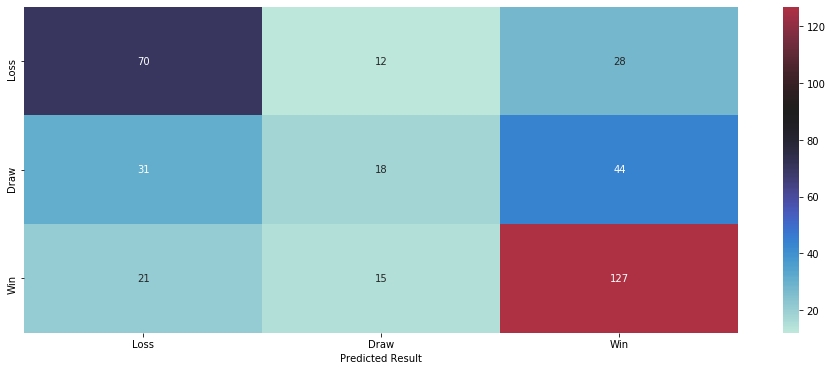

In [416]:
cf_matrix = confusion_matrix(y_test, pred)
import seaborn as sns
x_axis_labels,y_axis_labels = ["Loss", "Draw", "Win"], ["Loss", "Draw", "Win"]
sns.heatmap(cf_matrix, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels, center=90)
plt.xlabel("Predicted Result",  colors = "white")
plt.ylabel("Actual Result",  colors = "white")


In [370]:
labels = [-1,0,1]

print(classification_report(test, pred, labels = labels,target_names=['Loss', 'Draw', 'Win']))
print('accuracy score: {0:.4f}'.format(accuracy_score(test,pred)))

              precision    recall  f1-score   support

        Loss       0.57      0.64      0.60       110
        Draw       0.40      0.19      0.26        93
         Win       0.64      0.78      0.70       163

    accuracy                           0.59       366
   macro avg       0.54      0.54      0.52       366
weighted avg       0.56      0.59      0.56       366

accuracy score: 0.5874


In [371]:
print(pd.crosstab(np.array(test), np.array(pred), rownames=['Actual Result'], colnames=['Predicted Result']))
class_name = list(set(test))
print(class_name)

Predicted Result  -1   0    1
Actual Result                
-1                70  12   28
 0                31  18   44
 1                21  15  127
[0, 1, -1]


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

###### XGBoost DNN

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7, 8],
        'learning_rate': [0.0001,0.001, 0.01, 0.02,0.1, 0.2, 0.3],
        'n_estimators': [100,200,500,1000]
        }

In [ ]:
import datetime
from datetime import *

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# param_comb = 5
# folds = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X_train, y_train)
# timer(start_time) # timing ends here for "start_time" variable

# # xgb.fit(X_train, y_train)




In [147]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)

In [ ]:
##### CREATE XGB WITH OPTIMIZED PARAMS
# Best hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 1.5, 'colsample_bytree': 0.8}

xgb = XGBClassifier(features_names=X_all.columns, gamma=1.5, n_estimators =500, max_depth=7, min_child_weight=5)
xgb.fit(X_train, y_train)


In [ ]:
feat_imp = pd.Series(xgb.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


NameError: name 'fig' is not defined

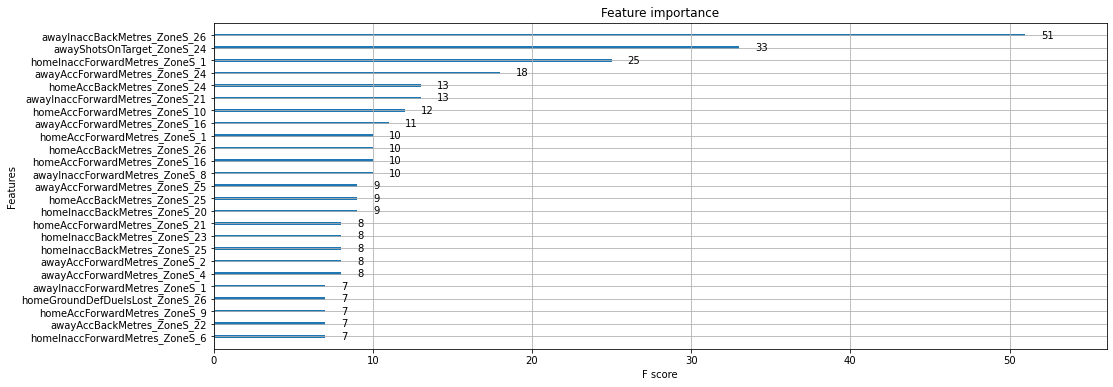

<Figure size 360x360 with 0 Axes>

In [151]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgb, max_num_features=25, ylabel="Features")
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)
plt.show()

In [ ]:
from xgboost import plot_tree
# plot single tree
plot_tree(xgb, num_trees=0, rankdir='LR')
#plt.rcParams['figure.figsize'] = [50, 20]
plt.show()

### Team Tactics and Automated Subs / Formation Shifts

In [11]:
from sklearn import preprocessing
from numpy import mean
from numpy import std

In [12]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [13]:
team_tactics = Player_Aggs_live60.groupby(['matchId', 'teamId']).sum().reset_index()
team_tactics.drop(["playerId", 'weight', 'height', 'xStart', 'yStart', 'homeTeamId', 'awayTeamId', 'gameTime (min)' ], axis = 1, inplace = True)


In [14]:
def team_result(team_df):
    
    df = pd.merge(team_df, Matches[["homeTeamId", "awayTeamId","matchId", "Result"]], how = "left", on = ["matchId"])
    
    # Classify Match W, L or D for a team
    conditions = [
        ((df['homeTeamId'] == df.teamId) &(df.Result==1)),
        ((df['homeTeamId'] == df.teamId)&(df.Result==0)),
        ((df['homeTeamId'] == df.teamId)&(df.Result==-1)),
        ((df['awayTeamId'] == df.teamId)&(df.Result==1)),
        ((df['awayTeamId'] == df.teamId)&(df.Result==0)),
        ((df['awayTeamId'] == df.teamId)&(df.Result==-1))
        ]

    # create a list of the values we want to assign for each condition
    values = [1,0,-1,-1,0,1]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['result'] = np.select(conditions, values)
    df.drop(["Result"], axis=1,inplace=True)
    return df

In [47]:
df = team_result(team_tactics)

df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

In [48]:
# df = pd.DataFrame(None, columns = team_tactics.columns)

# for team in teams:
#     test = team_tactics[team_tactics.teamId == team]
#     data = team_result(team, test)
#     df = df.append(data, ignore_index=True)

# df = df.replace([np.inf, -np.inf], np.nan)
# df = df.fillna(0)

In [49]:
df = df.loc[:, (df != 0).any(axis=0)]

In [50]:
df.drop(["homeTeamId", "awayTeamId"], inplace=True, axis=1)

In [51]:
X_all = df.iloc[:,2:-1]
y_all = df.result.values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, shuffle=True, test_size= 0.2, train_size=0.8, random_state=3)


In [53]:
rf = RandomForestClassifier(n_estimators = 500, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [57]:
### Determing player ratings for feature importance

df1 = Player_Aggs_live60.iloc[:,:15]
df2 = Player_Aggs_live60.iloc[:,15:]
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2.fillna(0)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df2.values)
df2 = pd.DataFrame(x_scaled, columns = df2.columns)

base_imp = imp_df(df2.columns, rf.feature_importances_)
xxx = base_imp.transpose()
xxx.columns = xxx.iloc[0]
xxx = xxx.drop(xxx.index[[0]])
xxx = xxx.reindex(sorted(xxx.columns), axis=1)
df2 = df2.reindex(sorted(df2.columns), axis=1)
df2 = df2.multiply(xxx.values)
negatives = df2.filter(regex='Inacc|Lost|Fouls|Fail|Not|Leaving').columns
df2[negatives] = df2[negatives].multiply(-1)
df2["sum"] = df2.iloc[:,:-1].sum(axis=1)
df2 = pd.concat([df1, df2], axis=1)
df2 = pd.merge(df2, df[["matchId", 'teamId', "result"]], on =['matchId', "teamId"], how = 'left' )
#df2 = df2.loc[:, (df2 != 0).any(axis=0)]
df2['playerRatings']=  np.where(df2['gameTime (min)'] ==0, 0, df2['sum'])
df2['playerRatings'] = df2['playerRatings'].multiply(94 / float(df2.playerRatings.nlargest(5)[-1:]))
df2['playerRatings'] = np.where(df2['playerRatings'] > 94.0, 94, df2['playerRatings'])
df2.drop(["sum"], axis=1, inplace=True)
collections.Counter(df2.sort_values("playerRatings", ascending=False).iloc[0:100,:].Position)

Counter({'DEF': 19, 'FWD': 28, 'MID': 49, nan: 4})

In [58]:
# inspecting player performance in a specific match for automated tactical sub recommendations (underperforming players)
df2[df2.matchId==2499725].sort_values("playerRatings", ascending=False)

,shortName,Position,playerId,weight,height,foot,matchId,xStart,yStart,teamId,...,dangerousOwnHalfBallLost_ZoneS_26,dangerousOwnHalfBallLost_ZoneS_3,dangerousOwnHalfBallLost_ZoneS_4,dangerousOwnHalfBallLost_ZoneS_5,dangerousOwnHalfBallLost_ZoneS_6,dangerousOwnHalfBallLost_ZoneS_7,dangerousOwnHalfBallLost_ZoneS_8,dangerousOwnHalfBallLost_ZoneS_9,result,playerRatings
8881,C. Eriksen,MID,54,76.0,180.0,right,2499725,67.434343,56.767677,1624,...,-0.0,-0.000000,-0.000000,-0.000234,-0.000000,-0.000000,-0.000000,-0.000000,1,55.323833
8892,M. Demb\u00e9l\u00e9,MID,11152,88.0,185.0,left,2499725,51.279661,48.533898,1624,...,-0.0,-0.000274,-0.000000,-0.000000,-0.000000,-0.000000,-0.000336,-0.000211,1,36.797666
8880,J. Vertonghen,DEF,48,88.0,189.0,left,2499725,35.840426,29.180851,1624,...,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,34.789720
8893,T. Alderweireld,DEF,36,91.0,187.0,right,2499725,43.151261,66.655462,1624,...,-0.0,-0.000000,-0.000213,-0.000000,-0.000000,-0.000000,-0.000336,-0.000000,1,32.350311
8885,K. Walker-Peters,DEF,402884,64.0,174.0,right,2499725,54.685393,88.325843,1624,...,-0.0,-0.000274,-0.000213,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,30.467830
8883,E. Dier,MID,210044,90.0,188.0,right,2499725,47.954128,52.376147,1624,...,-0.0,-0.000000,-0.000000,-0.000000,-0.000309,-0.000000,-0.000000,-0.000000,1,29.646153
8887,H. Kane,FWD,8717,86.0,188.0,right,2499725,66.936170,43.553191,1624,...,-0.0,-0.000274,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1,28.782485
8884,B. Davies,DEF,136441,76.0,182.0,left,2499725,52.514019,16.943925,1624,...,-0.0,-0.000548,-0.000000,-0.000000,-0.000617,-0.000000,-0.000000,-0.000000,1,28.305229
8888,M. Sissoko,MID,25804,91.0,187.0,right,2499725,62.636364,39.618182,1624,...,-0.0,-0.000000,-0.000213,-0.000000,-0.000309,-0.000000,-0.000000,-0.000000,1,25.296565
8872,R. Elliot,GKP,7974,93.0,188.0,left,2499725,8.888889,37.638889,1613,...,-0.0,-0.000274,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1,21.603472


In [59]:
player_values = df2.sort_values("playerRatings", ascending=False)

In [290]:
test = player_values.groupby(["shortName", 'playerId', "teamId"]).sum().reset_index().sort_values("playerRatings", ascending=False)



In [61]:
test["PR_perMatch"] = 100*test["playerRatings"] / test["gameTime (min)"] 

In [62]:



test.iloc[3:4,0:1] =  "M.Hamsik"


In [291]:
test.head(10)

,shortName,playerId,teamId,weight,height,matchId,xStart,yStart,homeTeamId,awayTeamId,...,dangerousOwnHalfBallLost_ZoneS_26,dangerousOwnHalfBallLost_ZoneS_3,dangerousOwnHalfBallLost_ZoneS_4,dangerousOwnHalfBallLost_ZoneS_5,dangerousOwnHalfBallLost_ZoneS_6,dangerousOwnHalfBallLost_ZoneS_7,dangerousOwnHalfBallLost_ZoneS_8,dangerousOwnHalfBallLost_ZoneS_9,result,playerRatings
1323,L. Messi,3359,676,2592.0,6120.0,92366299,2429.790331,2033.428708,24620,24646,...,0.000000,0.000000,0.000000,0.000000,-0.000309,0.000000,-0.000671,-0.000421,27,1644.413454
1310,L. Insigne,21385,3187,2183.0,6031.0,95317567,2412.025891,748.516398,117849,117860,...,0.000000,0.000000,0.000000,-0.000234,-0.003086,-0.000318,-0.000336,-0.000211,25,1541.718990
1201,K. De Bruyne,38021,1625,2516.0,6697.0,92496510,2304.140912,2076.096115,69133,69107,...,0.000000,-0.000548,0.000000,0.000000,-0.000926,-0.001273,-0.002014,-0.001053,29,1493.721764
1463,M. Ham\u0161\u00edk,21171,3187,3002.0,6954.0,97893682,2176.958543,1097.482212,121036,121036,...,0.000000,-0.000548,0.000000,0.000000,-0.001543,-0.001591,-0.001007,0.000000,25,1486.636515
1161,Jorginho,21315,3187,2145.0,5940.0,85013098,1698.772080,1493.491060,105071,105147,...,0.000000,-0.001919,-0.000213,-0.000234,-0.000309,-0.002227,-0.002686,-0.001263,20,1480.132534
1216,K. Koulibaly,25726,3187,3115.0,6825.0,90165013,1336.918776,1112.384444,111475,111373,...,0.000000,-0.005756,0.000000,0.000000,-0.005247,-0.001909,-0.002014,0.000000,23,1472.826307
1674,N. Otamendi,70086,1625,2754.0,6222.0,84996516,1348.684948,1462.294351,64258,55326,...,0.000000,-0.004659,-0.000426,-0.000701,-0.004012,-0.002227,-0.001007,-0.000842,26,1434.849631
843,G. Xhaka,49876,1609,3116.0,7030.0,94996431,1923.340863,1824.118675,70470,70470,...,0.000000,-0.006304,-0.000213,0.000000,-0.001543,-0.005091,-0.003021,-0.000842,6,1424.547204
940,Illarramendi,3676,687,2700.0,6444.0,92366533,1684.320948,1974.571645,24811,24753,...,0.000000,-0.001919,-0.000426,-0.000467,-0.001234,-0.001591,-0.003357,-0.002526,-3,1390.820164
765,Fernandinho,105339,1625,2278.0,6086.0,84996418,1659.907702,1673.536252,64275,55367,...,-0.000078,-0.002467,-0.000851,-0.000234,-0.004012,-0.004136,-0.003021,-0.000632,26,1390.143751


In [65]:
test.sort_values("PR_perMatch", ascending=False).head(40)

,shortName,playerId,weight,height,matchId,xStart,yStart,teamId,homeTeamId,awayTeamId,...,dangerousOwnHalfBallLost_ZoneS_3,dangerousOwnHalfBallLost_ZoneS_4,dangerousOwnHalfBallLost_ZoneS_5,dangerousOwnHalfBallLost_ZoneS_6,dangerousOwnHalfBallLost_ZoneS_7,dangerousOwnHalfBallLost_ZoneS_8,dangerousOwnHalfBallLost_ZoneS_9,result,playerRatings,PR_perMatch
1656,O. Zinchenko,241564,512.0,1400.0,19999817,406.437697,139.069875,13000,21904,13007,...,0.000000,0.000000,0.000000,-0.001852,0.000000,0.000000,0.000000,8,322.144704,89.484640
2076,T. Kroos,14723,2052.0,4941.0,69274745,1471.761032,933.147453,18225,18408,18485,...,-0.000548,-0.000426,0.000000,-0.000617,-0.001591,0.000000,0.000000,9,1373.601164,88.051357
1805,R. Maz\u00e1\u0148,786,150.0,360.0,5131676,106.626462,34.980994,1384,1388,1387,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,50.504371,84.173951
891,Isco,3563,2370.0,5280.0,76971528,1861.409574,1170.457594,20250,20536,20519,...,-0.000274,0.000000,0.000000,-0.000617,-0.000318,-0.001343,-0.000421,13,1036.305074,82.246434
526,Dani Ceballos,326523,770.0,1969.0,28223010,626.723860,467.500865,7425,7487,7569,...,0.000000,0.000000,-0.000234,0.000000,0.000000,-0.000671,-0.000211,7,195.540884,81.475368
1257,L. Messi,3359,2592.0,6120.0,92366299,2429.790331,2033.428708,24336,24620,24646,...,0.000000,0.000000,0.000000,-0.000309,0.000000,-0.000671,-0.000421,27,1644.413454,80.608503
1504,M. Verratti,21383,1320.0,3630.0,55018485,1090.155405,1253.267495,82874,99062,83041,...,0.000000,-0.000213,-0.000467,-0.000617,-0.001273,-0.000671,-0.001053,16,953.357170,79.446431
544,David Silva,8317,1943.0,5017.0,72496709,1792.246161,1218.558618,47125,56132,56102,...,-0.001096,0.000000,0.000000,-0.001852,-0.000636,-0.001343,-0.000421,25,1324.864935,78.861008
2098,Thiago Alc\u00e2ntara,3345,1330.0,3306.0,47821009,1031.724998,803.002991,46436,46546,47043,...,0.000000,0.000000,-0.000234,0.000000,-0.000318,-0.000336,-0.000421,13,708.109335,78.678815
1389,M.Hamsik,21171,3002.0,6954.0,97893682,2176.958543,1097.482212,121106,121036,121036,...,-0.000548,0.000000,0.000000,-0.001543,-0.001591,-0.001007,0.000000,25,1486.636515,77.428985


##### Feature Importance

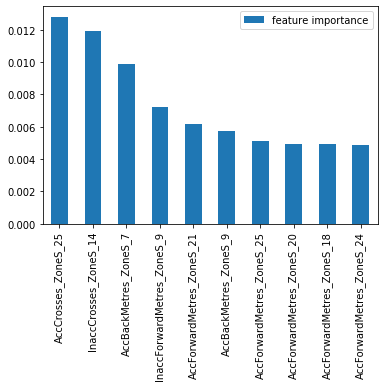

In [72]:
# inspecting feature importance from random forest
df_feature_importance = pd.DataFrame(rf.feature_importances_, index=df2.iloc[:,15:-2].columns, columns=['feature importance']).sort_values('feature importance', ascending=False)



Text(0, 0.5, 'Feature Importance')

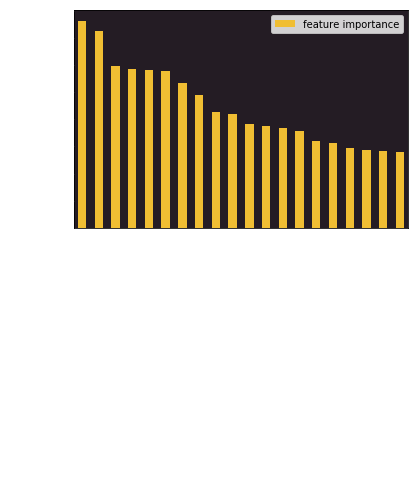

In [330]:
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.7)

#ax = fig.add_subplot(111)

t = df_feature_importance[0:10].index
s = df_feature_importance[0:10].values
#plt.plot(t, s)
ax = df_feature_importance[0:20].plot(kind='bar', color="#F0BE33")
ax.patch.set_facecolor('#241C24')
ax.tick_params(axis='x', colors='white',size =14 )
ax.tick_params(axis='y', colors='white', size=14)
plt.ylabel("Feature Importance", color = "white")
#ax.patch.set_facecolor('red')

#ax.plot(t, s) #plot(range(10))

#.patch.set_alpha(0)


#plt.show()

<Figure size 432x288 with 0 Axes>

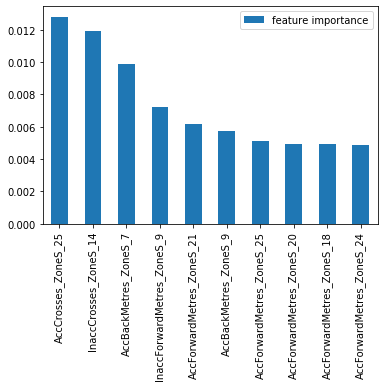

In [92]:
fig = plt.figure()
df_feature_importance[0:10].plot(kind='bar');
fig.savefig('temp.png', transparent=True)
plt.show()
       

In [68]:
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X_all.values)
# df = pd.DataFrame(x_scaled, columns = X_all.columns)


In [69]:
a, b =X_train.columns, df2.columns
(a | b).difference(a & b)

Index(['Position', 'awayTeamId', 'foot', 'gameTime (min)', 'height',
       'homeAway', 'homeTeamId', 'matchId', 'name', 'playerId',
       'playerRatings', 'result', 'shortName', 'teamId', 'weight', 'xStart',
       'yStart'],
      dtype='object')

##### Tactical sub in

In [70]:
##### univariate regression
##### Identify opposition weakness in a match
##### Identify optimal player for tactical sub to replace our weak player and exploit their weakness
##### Identify formation that gives opposition toughest time (label formations below)

In [198]:
# identify our weakest player
df2[(df2.matchId==2499719) & (df2.teamId==1631	) &(df2.Position!="GKP") &(df2.playerRatings!=0)].sort_values("playerRatings", ascending=False).iloc[-1:,:]

# identify opposition weakness in style and tactics


# replace with most similar player or exploitative player



,shortName,Position,playerId,weight,height,foot,matchId,xStart,yStart,teamId,...,dangerousOwnHalfBallLost_ZoneS_26,dangerousOwnHalfBallLost_ZoneS_3,dangerousOwnHalfBallLost_ZoneS_4,dangerousOwnHalfBallLost_ZoneS_5,dangerousOwnHalfBallLost_ZoneS_6,dangerousOwnHalfBallLost_ZoneS_7,dangerousOwnHalfBallLost_ZoneS_8,dangerousOwnHalfBallLost_ZoneS_9,result,playerRatings
18,M. James,MID,192748,86.0,181.0,right,2499719,38.02439,67.560976,1631,...,-0.0,-0.000274,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000211,-1,5.569319


In [ ]:
df2.groupby(['matchId', 'teamId', "result"]).sum().reset_index().head(20)

In [ ]:
# calcualte team performance ratings 
# df2['teamRatings'] = df2['playerRatings'].multiply(df2['gameTime (min)'])
# team_perf = df2.groupby(['matchId', 'teamId']).sum().reset_index()
# team_perf.drop(["Result","playerRatings","playerId", 'weight', 'height', 'xStart', 'yStart', 'homeTeamId', 'awayTeamId', 'gameTime (min)' ], axis = 1, inplace = True)
# pd.merge(team_perf, 

In [ ]:
# sns.boxplot(x="Result", y="teamRatings", data=team_perf);


In [333]:
df.sample(n=10,axis='columns',replace=True).head()

,InaccCrossesIntoBox_ZoneS_26,PassLostDangerous_ZoneS_1,dangerousOwnHalfBallLost_ZoneS_23,InaccPassesIntoFinalThird_ZoneS_3,AerialDuelsWon_ZoneS_5,InaccLaunchMetres_ZoneS_20,AccThroughsIntoFinalThird_ZoneS_10,AccurateThroughPasses_ZoneS_13,CumAccelerationDist_ZoneS_26,AccurateKeyPasses_ZoneS_14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0
2,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
##### WEAKNESSES (when they don't win)
X_all = df[(df.teamId ==1609) &(df.result!=1) ]
y_all = df[(df.teamId ==1609) &(df.result!=1)].iloc[:,-1:]

In [212]:
X_all = X_all.iloc[:,2:-1]


In [213]:
rf = RandomForestClassifier(n_estimators = 500, random_state=123)
rf.fit(X_all, y_all)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [214]:
df_feature_importance = pd.DataFrame(rf.feature_importances_, index=df.iloc[:,2:-1].columns, columns=['feature importance']).sort_values('feature importance', ascending=False)


<Figure size 432x288 with 0 Axes>

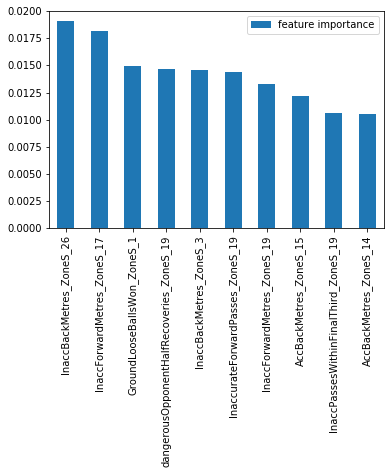

In [215]:
fig = plt.figure()
df_feature_importance[0:10].plot(kind='bar');
fig.savefig('temp.png', transparent=True)
plt.show()

In [ ]:
# Player_Aggs3 = Player_Aggs_live50[Player_Aggs_live50.Position!="GKP"]
# Player_Aggs3 = Player_Aggs3.loc[:, ~Player_Aggs3.columns.isin(["xStart","height","homeAway","yStart", "weight", "name","Result", 'matchId', 'homeTeamId', 'awayTeamId'])]

# Player_Aggs3 = Player_Aggs3.groupby(['playerId' ,'teamId',]).sum().reset_index()

# PV = Player_Aggs3.playerId
# TV = Player_Aggs3.teamId

# Player_Aggs3 = Player_Aggs3.iloc[:,2:].div(Player_Aggs3["gameTime (min)"], axis=0) *90
# Player_Aggs3 = pd.concat([PV, TV, Player_Aggs3], axis =1)

# # Player_Aggs3  = pd.merge(Player_Aggs2[["playerId","teamId"]], Player_Aggs3, how = 'left', on= 'playerId')
# # Player_Aggs3 = Player_Aggs3.drop_duplicates()

# Player_Aggs3.drop(["gameTime (min)"], inplace = True, axis =1)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


In [309]:
# fix diabates last name for visual
test[test.teamId==1631].iloc[-7:-6,0:1] = "F.Diabate"
# test.iloc[3:4,0:1] =  "M.Hamsik"

In [310]:
df3 = test[test.teamId==1631].iloc[:,:-2]
df3 = df3.fillna(0)
# df = Player_Aggs3.loc[:, ~Player_Aggs3.columns.isin(["homeAway","shortName", "name","Result", 'matchId', 'homeTeamId', 'awayTeamId', 'gameTime (min)'])]
# df = df[df.teamId==1609]
df3.drop(['teamId'], axis=1, inplace=True)
df3 = df3.replace([np.inf, -np.inf], np.nan).fillna(mean)

df_y  = pd.merge(df3['playerId'], Players[["shortName", "playerId", "teamId"]], how = 'left', on='playerId')[["shortName"]]
df_y = df_y.fillna("none")
y = df_y.values
X  = df3.iloc[:,11:].values



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify=y)
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# print(knn.score(X_test, y_test)) # prints 0.87 - i.e. 87% accurate
# walcott = df[df.playerId==7879].drop('playerId', axis=1).values
# salah = df[df.playerId==120353].drop('playerId', axis=1).values
# print(knn.predict(walcott)) # prints ['midfield']
# print(knn.predict(salah))   # prints ['defence']




In [ ]:
# juicewrld

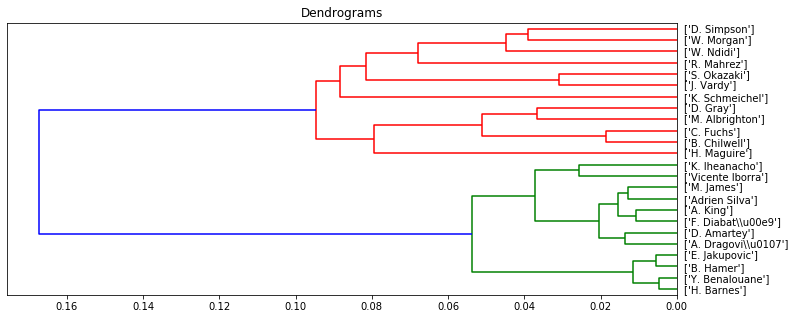

In [380]:
import scipy.cluster.hierarchy as shc

ax = plt.figure(figsize=(12, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'),labels=y, leaf_rotation=0, orientation="left")


#ax = df_feature_importance[0:10].plot(kind='bar', color="#F0BE33")


# ax.patch.set_facecolor('#241C24')
# plt.y_ticks( color = "white")
#ax.tick_params(axis='x', colors='white',size =14 )
#.tick_params(axis='y', colors='white', size=14)
#plt.ylabel("Feature Importance", color = "white")

#         fig, ax = plt.subplots(figsize=(15, 7))  # set size
#         ax = dendrogram(linkage_matrix, **kwargs)
#         plt.tick_params(axis='x', bottom='off', top='off', labelbottom='off')
#         plt.tight_layout()
#         plt.show()

In [ ]:
os.getcwd()

In [ ]:
try:
    os.chdir()
except:
    pass

In [259]:
from sklearn.cluster import AgglomerativeClustering

23


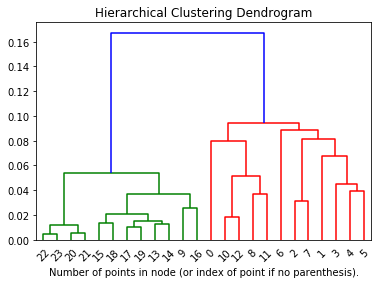

In [328]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                    counts]).astype(float)
    print(len(counts))
    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
Player_Aggs3[Player_Aggs3.playerId==7879] # walcott
Player_Aggs3[Player_Aggs3.playerId==120353] # salah

##### Own Team

In [ ]:
teamTest.loc[:, ~teamTest.columns.isin(["name","Result",'teamId', 'matchId', 'homeTeamId', 'awayTeamId', 'gameTime (min)'])]


In [ ]:
Events_England.drop[("subEventId",), ]


tentacion

In [ ]:
# import datetime
# while datetime.datetime.now().hour < 13:
#     x = 1+1

In [ ]:
# fig, ax = plt.subplots()
# fig.set_size_inches(14,4)
# plt.subplot(121)
# sns.kdeplot(Events_England["xStart"], Events_England['yStart'], shade = True)
# plt.show()

In [ ]:
# # Function to transform match events into meaningul player performance profiles for machine learning
# def match_agg(eT, event_df):

#     df1 = pd.DataFrame(event_df[event_df["subEventName"]== eT ][['matchId', "teamId", "subEventName"]])
#     df1 = df1.groupby(['matchId','teamId']).size().to_frame(eT).reset_index()
#     df2 = df1.groupby('matchId').agg(['unique']).reset_index()
#     df3 = pd.DataFrame(None, columns = ['matchId', 'teamId', eT])
#     df3['matchId'], df3['teamId'], df3[eT] = df2.iloc[:, 0], df2.iloc[:,1], df2.iloc[:,2]
#     df4 = pd.concat([df3, pd.DataFrame(df3['teamId'].to_list(), columns=['team1','team2'])], axis=1, sort = False)
#     result = pd.merge(df4, Matches[['matchId', "homeTeamId", "awayTeamId"]], on='matchId', how='inner')
#     result = pd.concat([result, pd.DataFrame(df3[eT].to_list(), columns=[eT+"1",eT+"2"])], axis=1, sort = False)
#     result = result.fillna(0) # handle na values where teams had no corners in a match

#     # fill in zeros to teams where there were no corners for a team
#     result[eT] = result[eT].apply(lambda row: list(row)+[0] if len(row)==1 else row)

#     # Correctly apply allocate home and away aggregate statistics to correct teams
#     result['home'+eT] = (
#         np.select(
#             condlist=[result['team1'] == result['homeTeamId'], result['team2'] == result['homeTeamId']], 
#             choicelist=[result[eT+"1"], result[eT+"2"]]))

#     result['away'+eT] = (
#         np.select(
#             condlist=[result['team1'] == result['awayTeamId'], result['team2'] == result['awayTeamId']], 
#             choicelist=[result[eT+"1"], result[eT+"2"]]))
    
#     # Create a column to recognize when a goal is scored
#     conditions = [
#         (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Success"))),
#         (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Failure") & (result['subEventName'] == "Shot"))),
#         (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Failure") & (result['subEventName'] != "Shot")))
#         ]

#     # create a list of the values we want to assign for each condition
#     values = [1, 1, -1]

#     # create a new column and use np.select to assign values to it using our lists as arguments
#     result['Goal_Value'] = np.select(conditions, values, default = 0)
    
#     #result = result[result['playerId']!= 0]

#     # # drop useless columns that have been replaced
#     result.drop(['teamId', eT, "team1", "team2", eT+"1", eT+"2"], inplace = True, axis = 1 )
    
#     return result

In [ ]:
### Successful Vertical Yards Now Merge

# df = Events_England.loc[Events_England.Result == "Success" ].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index()
# df2 = Events_England.loc[Events_England.Result == "Failure" ].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index()

# with names, positions and clubs for reference
#df = pd.merge(Events_England.loc[Events_England.Result == "Success" ].groupby(['matchId','playerId'])['attackYards'].sum().reset_index(), Players[['playerId', 'shortName', "Position", 'clubName']], on = 'playerId').sort_values(by ='attackYards', ascending = False)
#df2 = pd.merge(Events_England.loc[Events_England.Result == "Failure" ].groupby(['matchId','playerId'])['attackYards'].sum().reset_index(), Players[['playerId', 'shortName', "Position", 'clubName']], on = 'playerId').sort_values(by ='attackYards', ascending = False)

# .sort_values(by ='attackYards', ascending = False)



In [ ]:
# dataframes of brute sum of attacking yard attempts without success or failure measures

#df  = pd.merge(Events_England.groupby(['matchId','playerId'])['attackYards'].agg(['sum']).reset_index(), Players[['playerId', 'shortName', "Position", 'clubName']], on ='playerId').sort_values(by ='sum', ascending = False).rename(columns={'sum':'attackYards'})
# df = Events_England.groupby(['matchId','playerId'])['attackYards'].agg(['sum']).reset_index().sort_values(by ='sum', ascending = False).rename(columns={'sum':'attackYards'})


In [ ]:
Player_Aggs = pd.merge(Player_Aggs, Matches[['matchId', "Result"]], how = 'left', on = 'matchId' )

#### Live match testing

##### Team Aggregates and Clustering Tactics

In [ ]:
dropcols = ['playerId',
'weight','height','xStart','yStart','homeTeamId','awayTeamId','gameTime (min)','FKCrossAccuracy','penaltiesConversion',
'low_left_save_efficiency','mid_left_save_efficiency','high_left_save_efficiency','low_center_save_efficiency',
'mid_center_save_efficiency','high_center_save_efficiency','low_right_save_efficiency','mid_right_save_efficiency',
'high_right_save_efficiency','shotAccuracy','shortPassAccuracy','longPassAccuracy','shortLongPassRatio',
'Result']

dropcols_live = dropcols[0:9]


In [ ]:
Team_Aggs_Matches = Player_Aggs.groupby(['matchId', 'teamId' ]).sum().reset_index()
Team_Aggs_Matches.drop(columns = dropcols, inplace=True, axis=1)
Team_Aggs_Matches = pd.merge(Team_Aggs_Matches, Matches[['matchId', "Country"]], on='matchId', how = 'left')
Teams['Country'] = [row['name'] for row in Teams.area]
Team_Aggs = Team_Aggs_Matches.groupby(['teamId']).sum().reset_index()
Team_Aggs.drop(columns = 'matchId', inplace=True, axis=1)
Team_Aggs = pd.merge(Team_Aggs, Teams[['teamId', 'Country']], how = 'left', on = 'teamId')

In [ ]:
Team_Aggs_Matches_live = Player_Aggs_live.groupby(['matchId', 'teamId' ]).sum().reset_index()
Team_Aggs_Matches_live.drop(columns = dropcols_live, inplace=True, axis=1)
Team_Aggs_Matches_live = pd.merge(Team_Aggs_Matches_live, Matches[['matchId', "Country"]], on='matchId', how = 'left')
Teams['Country'] = [row['name'] for row in Teams.area]
Team_Aggs_live = Team_Aggs_Matches_live.groupby(['teamId']).sum().reset_index()
Team_Aggs_live.drop(columns = 'matchId', inplace=True, axis=1)
Team_Aggs_live = pd.merge(Team_Aggs_live, Teams[['teamId', 'Country']], how = 'left', on = 'teamId')

In [ ]:
result = Matches_df(Team_Aggs_Matches, Team_Aggs)
result_live = Matches_df(Team_Aggs_Matches_live, Team_Aggs_live)
y_all = result["Result"].values

In [ ]:
X_all_live = result_live.loc[:, ~result_live.columns.isin(["awayCounterAttackGoal", 
                                                           "Result",'teamId', 'matchId', 'homeTeamId', 
                                                           'awayTeamId', 'homeGoal_Value','awayGoal_Value', 
                                                           'awayCornerAssists', 'awayPenaltyNotScored', 'homeCornerAssists'])]
    

In [ ]:
X_all = result.loc[:, ~result.columns.isin(['teamId', 'matchId', 'homeTeamId', 'awayTeamId', 'awayGoal_Value','homegoalsAllowed', 'awaygoalsAllowed'
                                           ,'homeGoal_low_left', 'homeGoal_mid_left', 'awayGoal_mid_right',
                                           'homeGoal_Value', 'homeCrossAssists', 'homeCornerAssists',
                                           'homeGoal_low_center', 'homeTotalAssists','homeRightFootGoal', 'awayRightFootGoal'
                                           ,'homeRightFootGoal', 'awayRightFootGoal',
       'homeLeftFootGoal', 'awayLeftFootGoal', 'homeTotalAssists',
       'awayTotalAssists',"Result", 'awayGoal_low_left', 'awayGoal_low_center',
       'homeGoal_low_right', 'awayGoal_low_right','homeHeader/Body_Goal', 'awayHeader/Body_Goal','awayCrossAssists',
                                           'awayCrossAssists','awayInterceptionGoal',
 'homeInterceptionGoal','awayOwnGoals','homeFKCrossAssists', 'homeGoal_high_left','awayFKCrossAssists',
 'homeOwnGoals','homeGoal_high_right','awayGoal_high_center',
 'awayGoal_high_left','awayInterceptionGoal','homeInterceptionGoal','awayOwnGoals','awayPenaltyNotScored',
 'homeFKCrossAssists','homeGoal_high_left','awayFKCrossAssists',
'awayGoal_mid_left', 'homeGoal_mid_right','homeGoal_mid_center','awayGoal_high_right','awayGoal_mid_center',
 'homeGoal_high_center','awayCornerAssists','homeOwnGoals', 'homeGoal_high_right','awayGoal_high_center'                                      
 'awayGoal_high_left', 'homeCounterAttackGoal', 'awayCounterAttackGoal'])]


In [ ]:
X_all_live = X_all_live.replace([np.inf, -np.inf], np.nan)
X_all_live = X_all_live.fillna(X_all_live.mean())
X_train_live, X_test_live, y_train_live, y_test_live = train_test_split(X_all_live, y_all, shuffle=True, test_size= 0.2, train_size=0.8, random_state=3)


### Experiment: Extracting features of team playing style using Random Forests

In [ ]:
# param_grid = {
#     'n_estimators': [200,400,500, 700,1000,2000]
# }

#### Subset AKA live match trials

In [ ]:
X_all = X_all.replace([np.inf, -np.inf], np.nan)
X_all = X_all.fillna(X_all.mean())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, shuffle=True, test_size= 0.2, train_size=0.8, random_state=3)


In [ ]:
clf = RandomForestClassifier(n_estimators = 1000, random_state=3)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
# CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

In [ ]:
# CV_rfc.fit(X_train, y_train)

In [ ]:
# CV_rfc.best_estimator_

In [ ]:
labels = [-1,0,1]
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, labels = labels))
print('accuracy score: {0:.4f}'.format(accuracy_score(y_test,y_pred)))

In [ ]:
idx = list(clf.feature_importances_.argsort()[0:25])
col = list(X_train.columns[idx])
# modelname.feature_importance_
y = clf.feature_importances_[0:25]
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']))
class_name = list(set(y_test))
print(class_name)

In [ ]:


# estimator_nonlimited = clf.estimators_[5]
# fn = list(X_train.columns)
# # from sklearn.tree import export_graphviz
# # export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = iris.feature_names,
# #                 class_names = iris.target_names,
# #                 rounded = True, proportion = False, precision = 2, filled = True)

# export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = fn,
#                 class_names = ["W", "L", 'D'],
#                 rounded = True, proportion = False, precision = 2, filled = True)


# import pydot

# (graph,) = pydot.graph_from_dot_file('tree_nonlimited.dot')
# graph.write_png('tree_nonlimited.png')
# graph.draw('tree_nonlimited.png')


# # !dot -Tpng tree_limited.dot -o tree_nonlimited.png -Gdpi=600
# # from IPython.display import Image
# # Image(filename = 'tree_nonlimited.png')



In [ ]:
from dtreeviz.trees import *
import dtreeviz
from IPython.core.display import display, HTML
from dtreeviz.trees import dtreeviz

fn = list(X_train.columns)
cn = [-1,0,1]

dtree = tree.DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(X_train, y_train)
viz = dtreeviz(dtree,
               X_train,
               y_train,
               feature_names=fn, 
               class_names=cn,
               fancy=False)

display(HTML(viz.svg()))

In [ ]:
y_predict_proba = clf.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
all_y_test_i = np.array([])
all_y_predict_proba = np.array([])
for i in [-1,0,1]:
    y_test_i = list(map(lambda x: 1 if x == i else 0, list(y_test)))
    if len(all_y_test_i) >0:
        all_y_test_i = np.concatenate([all_y_test_i, y_test_i])
    else:
        all_y_test_i = y_test_i
    all_y_predict_proba = np.concatenate([all_y_predict_proba, y_predict_proba[:, i]])
    fpr[i], tpr[i], _ = roc_curve(y_test_i, y_predict_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["average"], tpr["average"], _ = roc_curve(all_y_test_i, all_y_predict_proba)
roc_auc["average"] = auc(fpr["average"], tpr["average"])


# Plot average ROC Curve
plt.figure()
plt.plot(fpr["average"], tpr["average"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["average"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot each individual ROC curve
for i in [-1,0,1]:
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# generate a no skill prediction (majority class)
# ns_probs = [0 for _ in range(len(y_test))]
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

# #Now calculate the AUC for each class separately

y_predict_proba = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
all_y_test_i = np.array([])
all_y_predict_proba = np.array([])

WDL = ["Draw","Home Win", "Home Loss"]

for pp in [-1,0,1]:
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  
                     clf.predict_proba(X_test)[:,pp], pos_label = pp)
    plt.plot(fpr, tpr,  marker='.', label= WDL[pp])
    auroc = round(metrics.auc(fpr, tpr),2)
    print('RF',WDL[pp],'--AUC--->',auroc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



In [ ]:
n_matches = Matches.shape[0]
n_features = Matches.shape[1] -1
n_homewins =  len(Matches[Matches.Result==1])
win_rate = (float(n_homewins) / (n_matches)) * 100
n_homeloss =  len(Matches[Matches.Result==-1])
loss_rate = (float(n_homeloss) / (n_matches)) * 100
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print('Number of matches won by home side: {}'.format(n_homewins))
print('Win rate of home team {:2f}%'.format(win_rate))
print('Loss rate of home team {:2f}%'.format(loss_rate))
print(collections.Counter(Matches.Result))

In [ ]:
dropcols = [
 'playerId',
 'weight',
 'height',
 'xStart',
 'yStart',
 'homeTeamId',
 'awayTeamId',
 'gameTime (min)',
#  'AccurateAttackMetres',
#  'InaccurateAttackMetres',
#  'Goal_Value',
#  'SimulationFouls',
#  'FoulsCommited',
#  'Clearances',
#  'AccLaunchMetres',
#  'InaccLaunchMetres',
#  'FKKeyCross',
#  'FKCrossAssists',
 'FKCrossAccuracy',
 'penaltiesConversion',
#  'dangerousOpponentHalfRecoveries',
#  'dangerousOwnHalfBallLost',
#  'dangerousDefDuelsLost',
 'low_left_save_efficiency',
 'mid_left_save_efficiency',
 'high_left_save_efficiency',
 'low_center_save_efficiency',
 'mid_center_save_efficiency',
 'high_center_save_efficiency',
 'low_right_save_efficiency',
 'mid_right_save_efficiency',
 'high_right_save_efficiency',
#  'goalsAllowed',
#  'GkSaves',
#  'AccurateHandPass',
#  'InaccurateHandPass',
#  'GKLeavingLineInstance',
#  'SuccessfulAccels',
#  'FailedAccels',
#  'CumAccelerationDist',
#  'AccelsDistIntoFinal3rd',
#  'AccelsDistWithinFinal3rd',
#  'CrossAssists',
#  'RightFootCross',
#  'LeftFootCross',
#  'CrossKeyPass',
#  'AccCrosses',
#  'InaccCrosses',
#  'AccCrossesIntoBox',
#  'InaccCrossesIntoBox',
#  'SlidingTacklesWon',
#  'SlidingTacklesLost',
#  'GroundDefDuelsWon',
#  'GroundDefDuelsLost',
#  'DefensiveAnticipations',
#  'GroundLooseBallsWon',
#  'GroundLooseBallsLost',
#  'GroundAttackDuelsWon',
#  'GroundAttackDuelsLost',
#  'OffensiveTouchesBox',
#  'Goal_low_left',
#  'Goal_mid_left',
#  'Goal_high_left',
#  'Goal_low_center',
#  'Goal_mid_center',
#  'Goal_high_center',
#  'Goal_low_right',
#  'Goal_mid_right',
#  'Goal_high_right',
 'shotAccuracy',
#  'ShotsOnTarget',
#  'ShotsOffTarget',
#  'ShotOpportunities',
#  'FreeKickShotAcc',
#  'FreeKickShotInacc',
#  'PenaltyNotScored',
#  'Header/Body_Goal',
#  'RightFootGoal',
#  'LeftFootGoal',
#  'CounterAttackGoal',
#  'InterceptionGoal',
#  'OwnGoals',
#  'AerialDuelsWon',
#  'AerialDuelsLost',
 'shortPassAccuracy',
 'longPassAccuracy',
 'shortLongPassRatio',
#  'InaccPassesWithinFinalThird',
#  'AccPassesWithinFinalThird',
#  'AccPassesIntoFinalThird',
#  'InaccPassesIntoFinalThird',
#  'AccThroughsIntoFinalThird',
#  'InaccurateSmartPasses',
#  'AccurateSmartPasses',
#  'InaccurateThroughPasses',
#  'AccurateThroughPasses',
#  'AccurateKeyPasses',
#  'InaccurateKeyPasses',
#  'TotalAssists',
#  'CounterAttackInvolvements',
#  'PassLostDangerous',
#  'CounterAttackIntercept',
#  'SuccessfulInterceptions',
#  'InaccurateForwardPasses',
#  'AccurateForwardPasses',
#  'CornerAssists',
#  'CornerOpportunitiesCreated',
#  'SuccessfulCorners',
#  'FailedCorners',
 'Result']

##### KMeans for detecting and visualizing team formations

In [147]:
# live adaptable formation
def team_formation(event_df, teamId, matchId):
    event_df = event_df[(event_df.teamId==teamId)&(event_df.matchId==matchId)]
    maxtime = event_df.eventSec.max()
    if maxtime > 1200:
        mintime = maxtime - 1200 # last 20mins of match data for formation revelation
    else:
        mintime = 0
    x1 = np.array(event_df[(event_df.eventSec > mintime)].xStart) 
    x2 = np.array(event_df[(event_df.eventSec > mintime)].yStart)
    X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 
    return x1, x2, X

In [148]:
#Creating the data 
x1, x2, X = team_formation(Events_England, 1609, 2499719)


AttributeError: 'DataFrame' object has no attribute 'xStart'

In [ ]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=11, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

(0, 100)

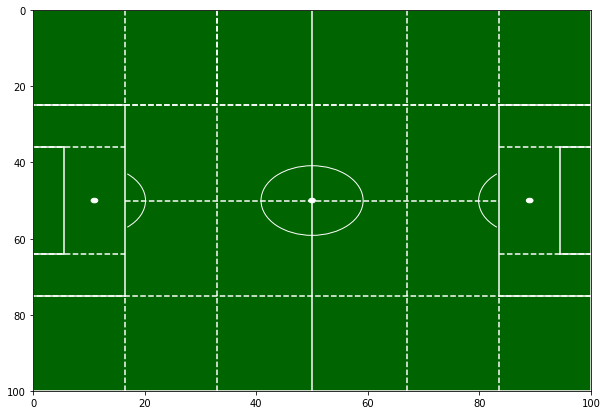

In [151]:
fig = plt.figure()
fig.set_size_inches(10, 7)
ax=fig.add_subplot(1,1,1)

# pitch borderline and centrer line
plt.plot([0,0],[0,100], color="white")
plt.plot([0,100],[100,100], color="white")
plt.plot([100,100],[100,0], color="white")
plt.plot([100,0],[0,0], color="white")
plt.plot([50,50],[0,100], color="white") # center line

# left penalty area
plt.plot([16.5,16.5],[75,25],color="white")
plt.plot([0,16.5],[75,75],color="white")
plt.plot([16.5,0],[25,25],color="white")

#Right Penalty Area
plt.plot([83.5,100],[75,75],color="white")
plt.plot([83.5,83.5],[75,25],color="white")
plt.plot([83.5,100],[25,25],color="white")

#Left 6-yard Box
plt.plot([0,5.5],[64,64],color="white")
plt.plot([5.5,5.5],[64,36],color="white")
plt.plot([5.5,0.5],[36,36],color="white")

#Right 6-yard Box
plt.plot([100,94.5],[64,64],color="white")
plt.plot([94.5,94.5],[64,36],color="white")
plt.plot([94.5,100],[36,36],color="white")

#Prepare Circles
centreCircle = plt.Circle((50,50),9.15,color="white",fill=False)
centreSpot = plt.Circle((50,50),0.6,color="white")
leftPenSpot = plt.Circle((11,50),0.6,color="white")
rightPenSpot = plt.Circle((89,50),0.6,color="white")

# zones
plt.plot([100,0],[25,25],color="white", linestyle='--') 
plt.plot([100,0],[75,75],color="white", linestyle='--') 
plt.plot([100,0],[25,25],color="white", linestyle='--') 
plt.plot([33,33],[75,25],color="white", linestyle='--')
plt.plot([67,67],[75,25],color="white", linestyle='--')
plt.plot([33,33],[100,75],color="white", linestyle='--')
plt.plot([16.5,16.5],[100,75],color="white", linestyle='--')
plt.plot([67,67],[100,75],color="white", linestyle='--')
plt.plot([83.5,83.5],[100,75],color="white", linestyle='--')
plt.plot([33,33],[0,25],color="white", linestyle='--')
plt.plot([16.5,16.5],[0,25],color="white", linestyle='--')
plt.plot([67,67],[0,25],color="white", linestyle='--')
plt.plot([83.5,83.5],[0,25],color="white", linestyle='--')
plt.plot([16.5,83.5],[50,50],color="white", linestyle='--')
plt.plot([33,33],[0,25],color="white", linestyle='--')
plt.plot([0,16.5],[64,64],color="white", linestyle='--')
plt.plot([0,16.5],[36,36],color="white", linestyle='--')
plt.plot([83.5,100],[64,64],color="white", linestyle='--')
plt.plot([83.5,100],[36,36],color="white", linestyle='--')

# Fill with green
green = patches.Rectangle((0, 0), 100, 100, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0, alpha = 1)
ax.add_patch(green)

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,50),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="white")
rightArc = Arc((89,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="white")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# #Tidy Axes
# plt.axis('off')

#K-Means Live formation
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=600, alpha=0.5)

#Heat Map of Player and Action Type
# team = Events_Spain[(Events_Spain.playerId == 3359) & (Events_Spain.matchId == 2565907)  & (Events_Spain.subEventName=="Shot") ]
# sns.kdeplot(team["xStart"],team["yStart"], shade=True)
# team2 = Events_Spain[(Events_Spain.playerId == 3322) & (Events_Spain.matchId == 2565907)  & (Events_Spain.subEventName=="Shot") ]
# sns.kdeplot(team2["xStart"],team2["yStart"], shade=True, color="Red")

plt.ylim(100, 0)
plt.xlim(0, 100)





In [ ]:
Players[Players.shortName.str.contains("Ronaldo")]

In [ ]:
Matches[(Matches.homeTeamId==676)& (Matches.awayTeamId ==675)]

In [ ]:
#Creating the data 
x1 = np.array(Player_Aggs[Player_Aggs['gameTime (min)']>45].xStart) 
x2 = np.array(Player_Aggs[Player_Aggs['gameTime (min)']>45].yStart)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
# This is what four pitch area location clusters look like

In [ ]:

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
#### Traditional 11 pitch positions

In [ ]:
# Liverpool formation last twenty minutes versus Man Utd at Anfield
np.array(Events_England[(Events_England.teamId == 1612) (Events_England.matchId==2499793) & (Events_England.eventSec <3700) * (Events_England.eventSec > 2400)].xStart)

In [ ]:
# Creating the data for Liverpool live formation at 60mins

x1 = np.array(Events_England[(Events_England.teamId == 1612) &(Events_England.matchId==2499793) & (Events_England.eventSec <3700) & (Events_England.eventSec > 1900)].xStart)
x2 = np.array(Events_England[(Events_England.teamId == 1612) &(Events_England.matchId==2499793) & (Events_England.eventSec <3700) & (Events_England.eventSec > 1900)].yStart)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

In [ ]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=800, alpha=0.5)

In [ ]:
kmeans = KMeans(n_clusters=22)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Comparing Two Teams in a head to head

In [ ]:
Teams[Teams["name"].str.contains('Barcelona')]

In [ ]:
#Creating the data
manUtdBad = Player_Aggs[(Player_Aggs['gameTime (min)']>45) & (Player_Aggs.teamId ==1611) &(((Player_Aggs.homeAway=="home") & (Player_Aggs.Result==-1)) | ((Player_Aggs.homeAway=="away") & (Player_Aggs.Result==1)))]
manUtdGood = Player_Aggs[(Player_Aggs['gameTime (min)']>45) & (Player_Aggs.teamId ==1611) &(((Player_Aggs.homeAway=="home") & (Player_Aggs.Result==1)) | ((Player_Aggs.homeAway=="away") & (Player_Aggs.Result==-1)))]
liverpoolGood = Player_Aggs[(Player_Aggs['gameTime (min)']>45) & (Player_Aggs.teamId ==1612) &(((Player_Aggs.homeAway=="home") & (Player_Aggs.Result==1)) | ((Player_Aggs.homeAway=="away") & (Player_Aggs.Result==-1)))]
liverpoolBad = Player_Aggs[(Player_Aggs['gameTime (min)']>45) & (Player_Aggs.teamId ==1612) &(((Player_Aggs.homeAway=="home") & (Player_Aggs.Result==-1)) | ((Player_Aggs.homeAway=="away") & (Player_Aggs.Result==1)))]
barcelonaBad = Player_Aggs[(Player_Aggs['gameTime (min)']>45) & (Player_Aggs.teamId ==676) &(((Player_Aggs.homeAway=="home") & (Player_Aggs.Result==-1)) | ((Player_Aggs.homeAway=="away") & (Player_Aggs.Result==1)))]
barcelonaGood = Player_Aggs[(Player_Aggs['gameTime (min)']>45) & (Player_Aggs.teamId ==676) &(((Player_Aggs.homeAway=="home") & (Player_Aggs.Result==1)) | ((Player_Aggs.homeAway=="away") & (Player_Aggs.Result==-1)))]


x1 = np.array(manUtdBad.xStart) 
x2 = np.array(manUtdBad.yStart)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

In [ ]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers2 = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
x1 = np.array(manUtdGood.xStart) 
x2 = np.array(manUtdGood.yStart)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 


In [ ]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# plt.scatter(centers2[:, 0], centers2[:, 1], c='red', s=200, alpha=0.5)


In [ ]:
manUtd = Player_Aggs[(Player_Aggs['gameTime (min)']>45) & (Player_Aggs.teamId ==1611)]
barca = Player_Aggs[(Player_Aggs['gameTime (min)']>45) & (Player_Aggs.teamId ==676)]       

In [ ]:
## Man Utd
x1 = np.array(manUtd.xStart) 
x2 = np.array(manUtd.yStart)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
## Barcelona
x1 = np.array(barca.xStart) 
x2 = np.array(barca.yStart)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
# Events_England = pd.read_csv('eventsEvents_England_processed')

In [ ]:
# Player_Aggs_live = pd.read_csv('eventsPlayer_Aggs_live.csv')
# Player_Aggs = pd.read_csv('eventsPlayer_Aggs.csv')

In [ ]:
# Player_Aggs_live.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# def Matches_df_fDNN(TAM, TA):
    
#     df2 = TAM.groupby('matchId').agg(list).reset_index()
#     df2.drop(["homeTeamId", "awayTeamId"], inplace=True, axis=1)
#     df3 = pd.DataFrame(None, columns = list(TA.columns))

#     for index, col in enumerate(list(TAM.columns)):
#         df3[col] = df2.iloc[:,index]

#     df4 = pd.concat([df3, pd.DataFrame(df3['teamId'].to_list(), columns=['team1','team2'])], axis=1, sort = False)
#     result = pd.merge(df4, Matches[['matchId', "homeTeamId", "awayTeamId"]], on='matchId', how='inner')
#     #df4.drop(["Country"], axis=1, inplace=True)

#     for var in list(result.columns)[2:-5]:
#         result = pd.concat([result, pd.DataFrame(df3[var].to_list(), columns=["1_" + var, "2_" + var])], axis=1, sort = False)

#         # Correctly apply allocate home and away aggregate statistics to correct teams
#         result['home'+var] = (
#             np.select(
#                 condlist=[result['team1'] == result['homeTeamId'], result['team2'] == result['homeTeamId']], 
#                 choicelist=[result["1_" + var], result["2_" + var]]))

#         result['away'+var] = (
#             np.select(
#                 condlist=[result['team1'] == result['awayTeamId'], result['team2'] == result['awayTeamId']], 
#                 choicelist=[result["1_" + var], result["2_" + var]]))

#         # # drop useless columns that have been replaced
#         result.drop([ var, "1_" + var, "2_" + var], inplace = True, axis = 1 )

#     # # drop useless columns that have been replaced
#     result.drop(['teamId',"team1", "team2"], inplace = True, axis = 1 )
#     result = pd.merge(result, Matches[['matchId', "Result"]], on='matchId', how = 'left')
#     return result

In [ ]:
# def Matches_df(TAM, TA):
    
#     df2 = TAM.groupby('matchId').agg(list).reset_index()
#     df2.drop(["homeTeamId", "awayTeamId"], inplace=True, axis=1)
#     df3 = pd.DataFrame(None, columns = list(TA.columns))

#     for index, col in enumerate(list(TAM.columns)):
#         df3[col] = df2.iloc[:,index]

#     df4 = pd.concat([df3, pd.DataFrame(df3['teamId'].to_list(), columns=['team1','team2'])], axis=1, sort = False)
#     result = pd.merge(df4, Matches[['matchId', "homeTeamId", "awayTeamId"]], on='matchId', how='inner')
#     #df4.drop(["Country"], axis=1, inplace=True)

#     for var in list(result.columns)[1:-6]:
#         result = pd.concat([result, pd.DataFrame(df3[var].to_list(), columns=[var+"1",var+"2"])], axis=1, sort = False)

#         # Correctly apply allocate home and away aggregate statistics to correct teams
#         result['home'+var] = (
#             np.select(
#                 condlist=[result['team1'] == result['homeTeamId'], result['team2'] == result['homeTeamId']], 
#                 choicelist=[result[var+"1"], result[var+"2"]]))

#         result['away'+var] = (
#             np.select(
#                 condlist=[result['team1'] == result['awayTeamId'], result['team2'] == result['awayTeamId']], 
#                 choicelist=[result[var+"1"], result[var+"2"]]))

#         # # drop useless columns that have been replaced
#         result.drop([ var, var+"1", var+"2"], inplace = True, axis = 1 )

#     # # drop useless columns that have been replaced
#     result.drop(['teamId',"team1", "team2"], inplace = True, axis = 1 )
#     result = pd.merge(result, Matches[['matchId', "Result"]], on='matchId', how = 'left')
#     return result

In [ ]:
# #### ORIGINAL

# dropcols = ['playerId',
# 'weight','height','xStart','yStart','homeTeamId','awayTeamId','gameTime (min)','penaltiesConversion',
# 'low_left_save_efficiency','mid_left_save_efficiency','high_left_save_efficiency','low_center_save_efficiency',
# 'mid_center_save_efficiency','high_center_save_efficiency','low_right_save_efficiency','mid_right_save_efficiency',
# 'high_right_save_efficiency','shotAccuracy','shortPassAccuracy','longPassAccuracy','shortLongPassRatio',
# 'Result'][0:7]

# dropcols_live =  dropcols[0:7]

# Team_Aggs_Matches = Player_Aggs2.groupby(['matchId', 'teamId' ]).sum().reset_index()
# Team_Aggs_Matches.drop(columns = dropcols, inplace=True, axis=1)

# Team_Aggs = Team_Aggs_Matches.groupby(['teamId']).sum().reset_index()
# Team_Aggs.drop(columns = ['matchId'], inplace=True, axis=1)


In [ ]:
# We performed this and found our best params which are used in the model above

In [ ]:
##### RANDOM FORESTS WITh GRIDSEARCH

from sklearn.model_selection import StratifiedKFold

In [ ]:
# # summarize results

# print("best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
idx = list(clf.feature_importances_.argsort()[0:25])
col = list(X_train.columns[idx])

# modelname.feature_importance_

y = clf.feature_importances_[0:25]

# plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [ ]:
df1 = Player_Aggs_live30.iloc[:,:15]
df2 = Player_Aggs_live30.iloc[:,15:]
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2.fillna(0)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df2.values)
df2 = pd.DataFrame(x_scaled, columns = df2.columns)

base_imp = imp_df(df2.columns, rf.feature_importances_)
xxx = base_imp.transpose()
xxx.columns = xxx.iloc[0]
xxx = xxx.drop(xxx.index[[0]])
xxx = xxx.reindex(sorted(xxx.columns), axis=1)
df2 = df2.reindex(sorted(df2.columns), axis=1)
df2 = df2.multiply(xxx.values)
df2[negatives] = df2[negatives].multiply(-1)
df2["sum"] = df2.sum(axis=1)
df2 = pd.concat([df1, df2], axis=1)
df2 = pd.merge(df2, df[["matchId", 'teamId', "Result"]], on =['matchId', "teamId"], how = 'left' )
#df2 = df2.loc[:, (df2 != 0).any(axis=0)]
df2['playerRatings']=  np.where(df2['gameTime (min)'] ==0, 0, df2['sum'])
df2['playerRatings'] = df2['playerRatings'].multiply(94 / df2.playerRatings.max())
df2.drop(["sum"], axis=1, inplace=True)
collections.Counter(df2.sort_values("playerRatings", ascending=False).iloc[0:100,:].Position)

In [ ]:
from dtreeviz.trees import *
import dtreeviz
from IPython.core.display import display, HTML
from dtreeviz.trees import dtreeviz

fn = list(X_all.columns)
cn = [-1,0,1]

_ = tree.plot_tree(clf.estimators_[0], feature_names=X_all.columns, filled=True, max_depth=10)
